In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
student_data = pd.read_csv('Projectdata.csv')

# Dataset Exploration

In [3]:
student_data

Age  Gender                            Course           Year  \
0     54    Male                  Construction mgt  Post Graduate   
1     18    Male                 Computer sciences    Second Year   
2     25  Female            Agriculture Economics   Post Graduate   
3     19  Female       Genetics and Biotechnology     Second Year   
4     25    Male  Mathematics and Computer Science    Fourth Year   
..   ...     ...                               ...            ...   
347   26  Female                       Psychology      Fifth Year   
348   16  Female          Artificial Intelligence     Second Year   
349   24    Male                      Engineering     Fourth Year   
350   19    Male                 Computer sciences     Third Year   
351   25  Female                               Law     Third Year   

    Marital Status               Grade  \
0          Married         First Class   
1           Single         First Class   
2           Single  Second Class Lower   
3           Single         First Class   
4           Single  Second Class Upper   
..             ...                 ...   
347         Single  Second Class Upper   
348         Single  Second Class Lower   
349        Married  Second Class Upper   
350         Single  Second Class Lower   
351         Single  Second Class Lower   

    How often have you felt down or hopeless?  \
0                                Occasionally   
1                                  Not at all   
2                                Occasionally   
3                           Almost constantly   
4                                  Frequently   
..                                        ...   
347                              Occasionally   
348                              Occasionally   
349                                Frequently   
350                         Almost constantly   
351                              Occasionally   

    How often have you had trouble falling or staying asleep, or slept too much?  \
0                                         Occasionally                             
1                                         Occasionally                             
2                                         Occasionally                             
3                                           Frequently                             
4                                           Frequently                             
..                                                 ...                             
347                                         Frequently                             
348                                       Occasionally                             
349                                       Occasionally                             
350                                        Not at all?                             
351                                         Frequently                             

    How often have you felt tired or had little energy?  \
0                                         Occasionally    
1                                         Occasionally    
2                                         Occasionally    
3                                         Occasionally    
4                                         Occasionally    
..                                                 ...    
347                                         Not at all    
348                                       Occasionally    
349                                       Occasionally    
350                                  Almost constantly    
351                                  Almost constantly    

    How often have you felt nervous, anxious, or on edge?  \
0                                         Occasionally      
1                                           Frequently      
2                                         Occasionally      
3                                         Occasionally      
4                                           Frequently     

In [4]:
print(f"Shape of the dataset: {student_data.shape}")

Shape of the dataset: (352, 16)


In [5]:
print(f"Informations About The Dataset :\n")
print(student_data.info())

#this contains information such as variable types, memory usage, etc.

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 16 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Age                                                                           352 non-null    int64 
 1   Gender                                                                        352 non-null    object
 2   Course                                                                        352 non-null    object
 3   Year                                                                          350 non-null    object
 4   Marital Status                                                                350 non-null    object
 5   Grade                                                                         352 non-null    object
 6   How ofte

In [6]:
print(f"Shape of the dataset: {student_data}")

Shape of the dataset:      Age  Gender                            Course           Year  \
0     54    Male                  Construction mgt  Post Graduate   
1     18    Male                 Computer sciences    Second Year   
2     25  Female            Agriculture Economics   Post Graduate   
3     19  Female       Genetics and Biotechnology     Second Year   
4     25    Male  Mathematics and Computer Science    Fourth Year   
..   ...     ...                               ...            ...   
347   26  Female                       Psychology      Fifth Year   
348   16  Female          Artificial Intelligence     Second Year   
349   24    Male                      Engineering     Fourth Year   
350   19    Male                 Computer sciences     Third Year   
351   25  Female                               Law     Third Year   

    Marital Status               Grade  \
0          Married         First Class   
1           Single         First Class   
2           Single  Sec

In [7]:
student_data.describe(include=object).T.style.set_properties(**{"color":"blue","border": "1.2px  solid black"})

In [8]:
student_data.describe(include=int).T.style.set_properties(**{"color":"blue","border": "1.2px  solid black"})

# Cleaning The Dataset

In [9]:
column_name = 'Course'  


unique_values = student_data[column_name].unique()

# Print the list of unique values
print("Unique values under the column '{}':".format(column_name))
for value in unique_values:
    print(value)

Unique values under the column 'Course':
Construction mgt
Computer sciences
Agriculture Economics 
Genetics and Biotechnology 
Mathematics and Computer Science
Computer Engineering 
Computer Science 
Computer science 
Fine arts and design 
Psychology
Accounting 
Science Education 
Microbiology 
Law
Nursing Science 
Computer science
Nursing 
Computer Science
Economics 
Biology 
Medical laboratory science 
Medical laboratory science
Medical Laboratory Science
Nursing science 
Masters
Q
Fine Arts and Design 
Chemistry 
International Law
Architecture 
Psychology 
Medicine and Surgery 
International relations and diplomacy 
Health science 
Banking and Finance 
Criminology 
Engineering 
Human nutrition and dietetics 
Mechanical engineering 
Electrical and electronics engineering 
EEE
Electrical and Electronics Engineering 
Medicine
Artificial Intelligence 
Library and Information Science 
EER
Statistics 
Material sci engineering 
Computer engineering 
Pharmacy 
Mechanical Engineering
Film St

In [10]:
# Let's replace redundant course name with the standard course name
student_data['Course'].replace({
    'Computer sciences' : 'Computer Science',
    'Computer science' : 'Computer Science',
    'MATHEMATICS AND COMPUTER SCIENCE' : 'Computer Science',
    'Mathematics and Computer Science' : 'Computer Science',
    'BSc Computer Science' : 'Computer Science',
    'Computer engineering??': 'Computer Engineering',
    'Computer engineering': 'Computer Engineering',
    "Last year of my PhD in engineering, 100% remotely because my university campus doesn't allow me access (I carry my firearm 24/7, and the campus is an anticonstitutional 'gun free' zone).": 'Computer Engineering',
    'psychology' : 'Psychology',
    'business' : 'Business',
    'film studies' : 'Film Studies',
    'Med' : 'Medicine',
    'Env sci' : 'Environmental Science',
    'Chatered accountant' : 'Accounting',
    'I-O Psychology' : 'Psychology',
    'Information and communication engineering ' : 'Information and Communication Engineering ',
    'Material sci engineering' : 'Material Science Engineering',
    'EEE' : 'Electrical and Electronics Engineering',
    'Electrical and electronics engineering ' : 'Electrical and Electronics Engineering',
    'Human nutrition and dietetics' : 'Nutrition and Dietetics',
    'Nutrition and dietetics ' : 'Nutrition and Dietetics ',
    'EER' : 'Electrical and Electronics Engineering',
    'Q' : 'Accounting',
    'Nursing Science' : 'Nursing',
    'Nursing science' : 'Nursing',
    'Fine arts and design ' : 'Fine Arts and Design', 'Construction mgt' : 'Construction Management', 'Computer science' : 'Computer Science'
}, inplace=True)

# Check the number of unique values after replacement
print(len(student_data['Course'].unique()))

65


In [11]:
column_name = 'Course'  


unique_values = student_data[column_name].unique()

# Print the list of unique values
print("Unique values under the column '{}':".format(column_name))
for value in unique_values:
    print(value)

Unique values under the column 'Course':
Construction Management
Computer Science
Agriculture Economics 
Genetics and Biotechnology 
Computer Engineering 
Computer Science 
Computer science 
Fine Arts and Design
Psychology
Accounting 
Science Education 
Microbiology 
Law
Nursing Science 
Nursing 
Economics 
Biology 
Medical laboratory science 
Medical laboratory science
Medical Laboratory Science
Nursing science 
Masters
Accounting
Fine Arts and Design 
Chemistry 
International Law
Architecture 
Psychology 
Medicine and Surgery 
International relations and diplomacy 
Health science 
Banking and Finance 
Criminology 
Engineering 
Human nutrition and dietetics 
Mechanical engineering 
Electrical and Electronics Engineering
Electrical and Electronics Engineering 
Medicine
Artificial Intelligence 
Library and Information Science 
Statistics 
Material sci engineering 
Computer engineering 
Pharmacy 
Mechanical Engineering
Film Studies
Computer Engineering
Information and Communication Engin

# Data Visualization


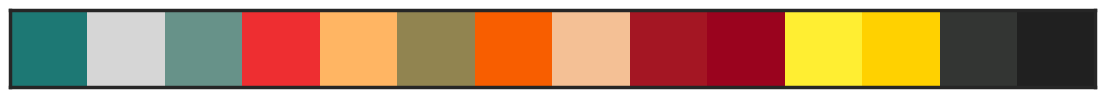

In [12]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#d6d6d6","#679289","#ee2e31","#ffb563","#918450","#f85e00","#f4c095","#a41623","#9a031e","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

# Gender Visualization

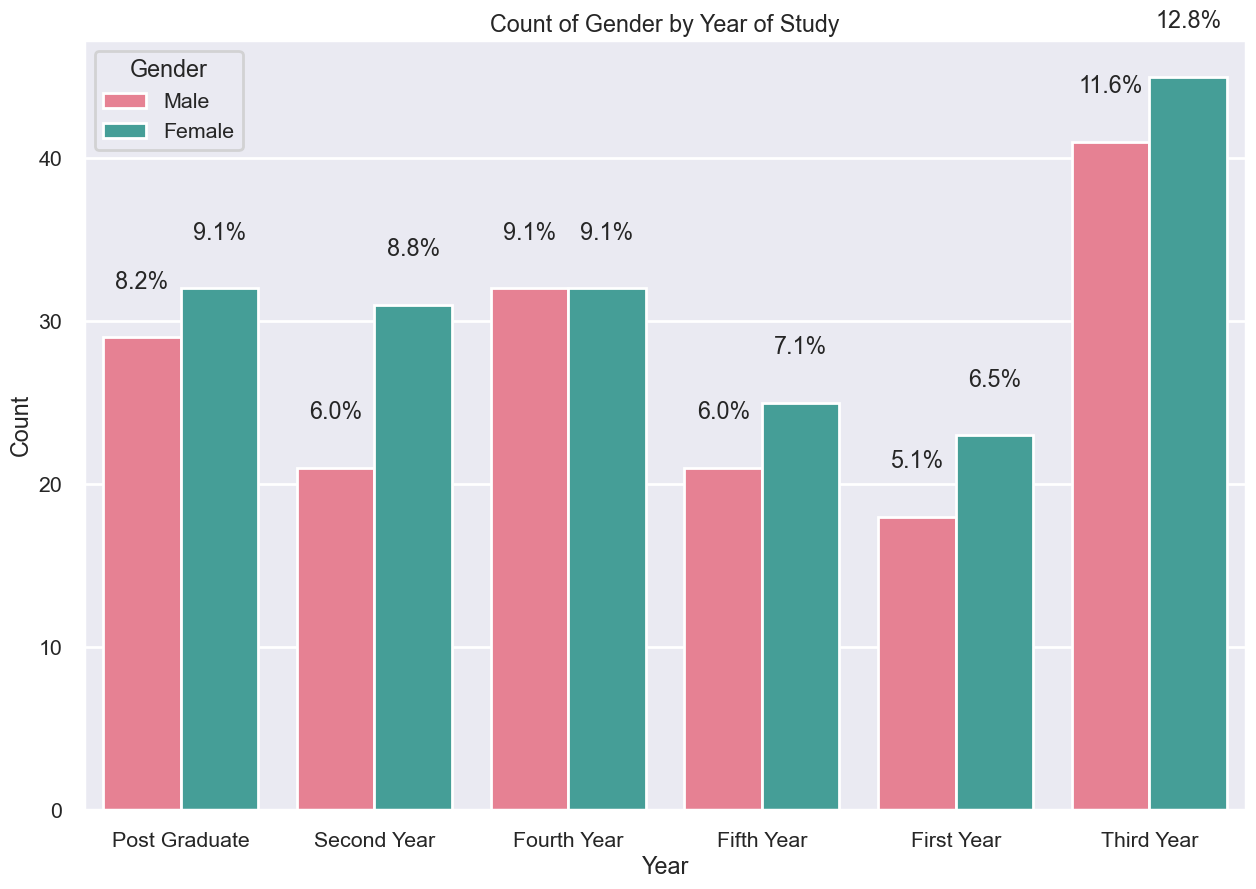

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")

ax = sns.countplot(x="Year", hue="Gender", data=student_data, palette="husl")
ax.set_title("Count of Gender by Year of Study")
ax.set_xlabel("Year")
ax.set_ylabel("Count")

# Add percentages on top of the bars
total = len(student_data["Year"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1%}'.format(height/total),
            ha="center")

plt.show()
# Save the figure to a file
plt.savefig("gender_count_by_year.png")

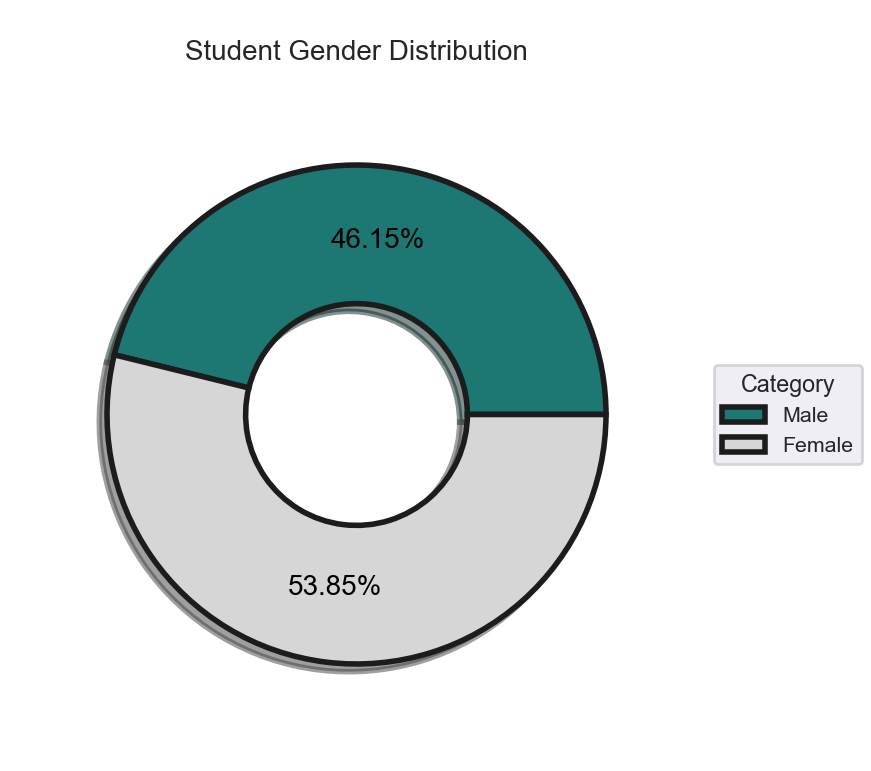

<Figure size 640x480 with 0 Axes>

In [41]:
plt.subplots(figsize=(9, 9))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(student_data[student_data["Gender"]=="Male"]["Gender"]),
                                    len(student_data[student_data["Gender"]=="Female"]["Gender"])
                                   ],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nStudent Gender Distribution",fontsize=20)
plt.show()
# Save the figure to a file
plt.savefig("student_gender_distribution.png")

# DISTRIBUTION OF COURSES FOR ALL STUDENTS

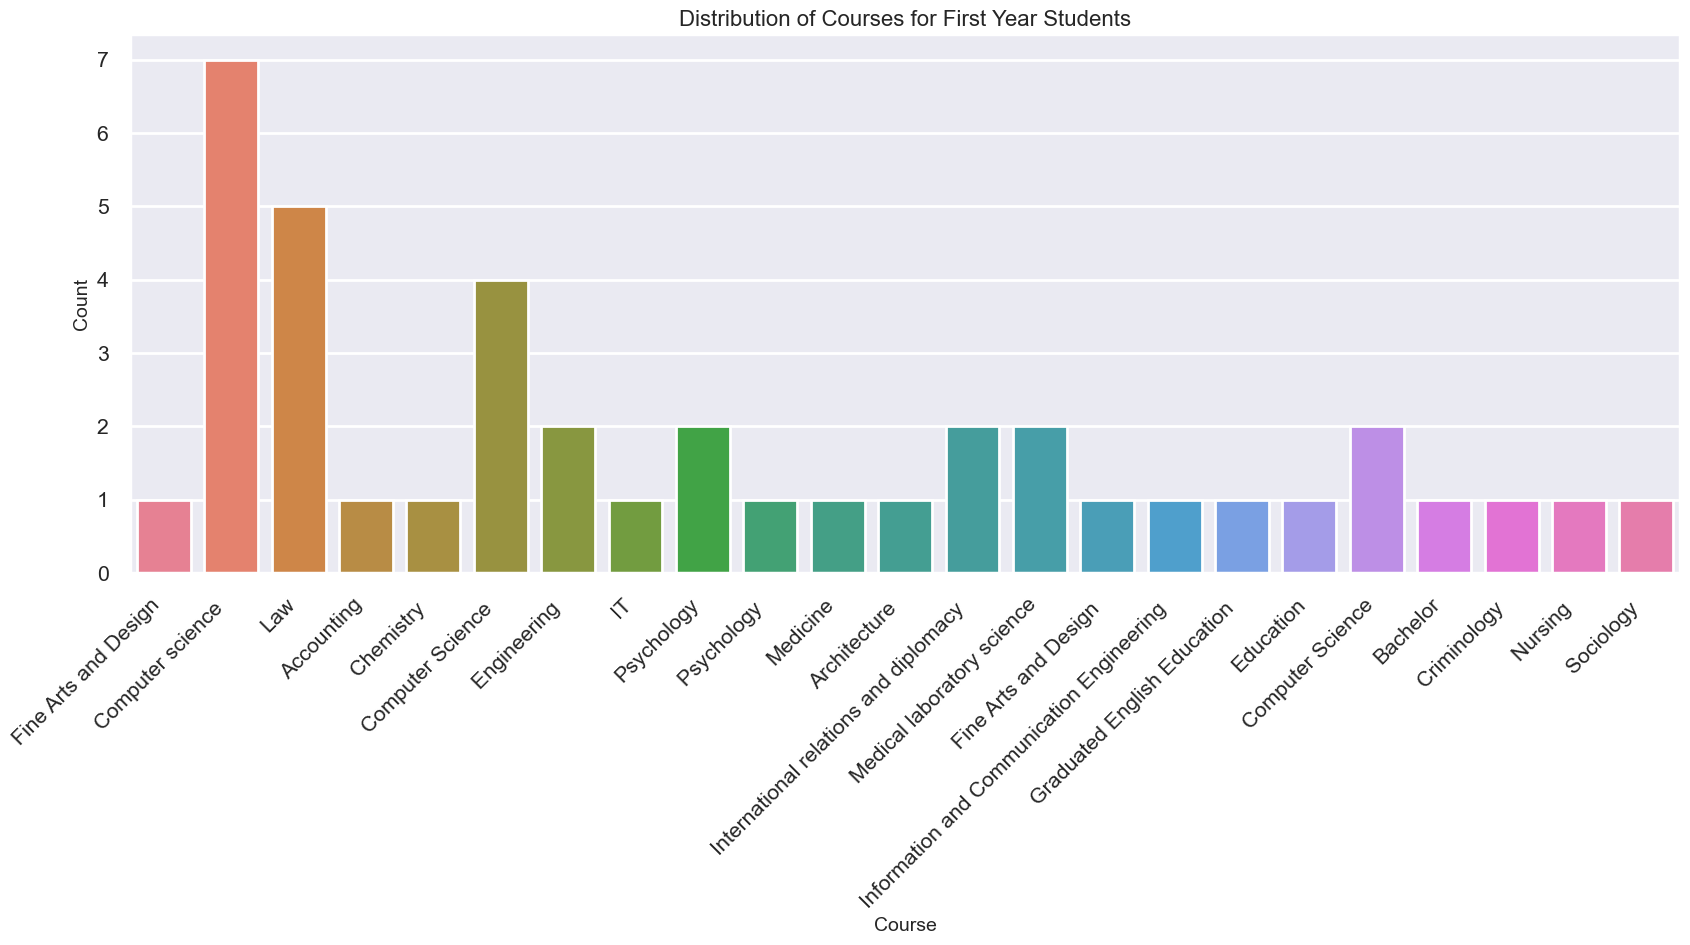

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(20, 7))

filtered_data = student_data[student_data['Year'] == 'First Year']
chart = sns.countplot(x='Course', data=filtered_data, palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
chart.set_title('Distribution of Courses for First Year Students', fontsize=16)
chart.set_xlabel('Course', fontsize=14)
chart.set_ylabel('Count', fontsize=14)

plt.show()
# Save the figure to a file
plt.savefig("first_year_course_distribution.png")


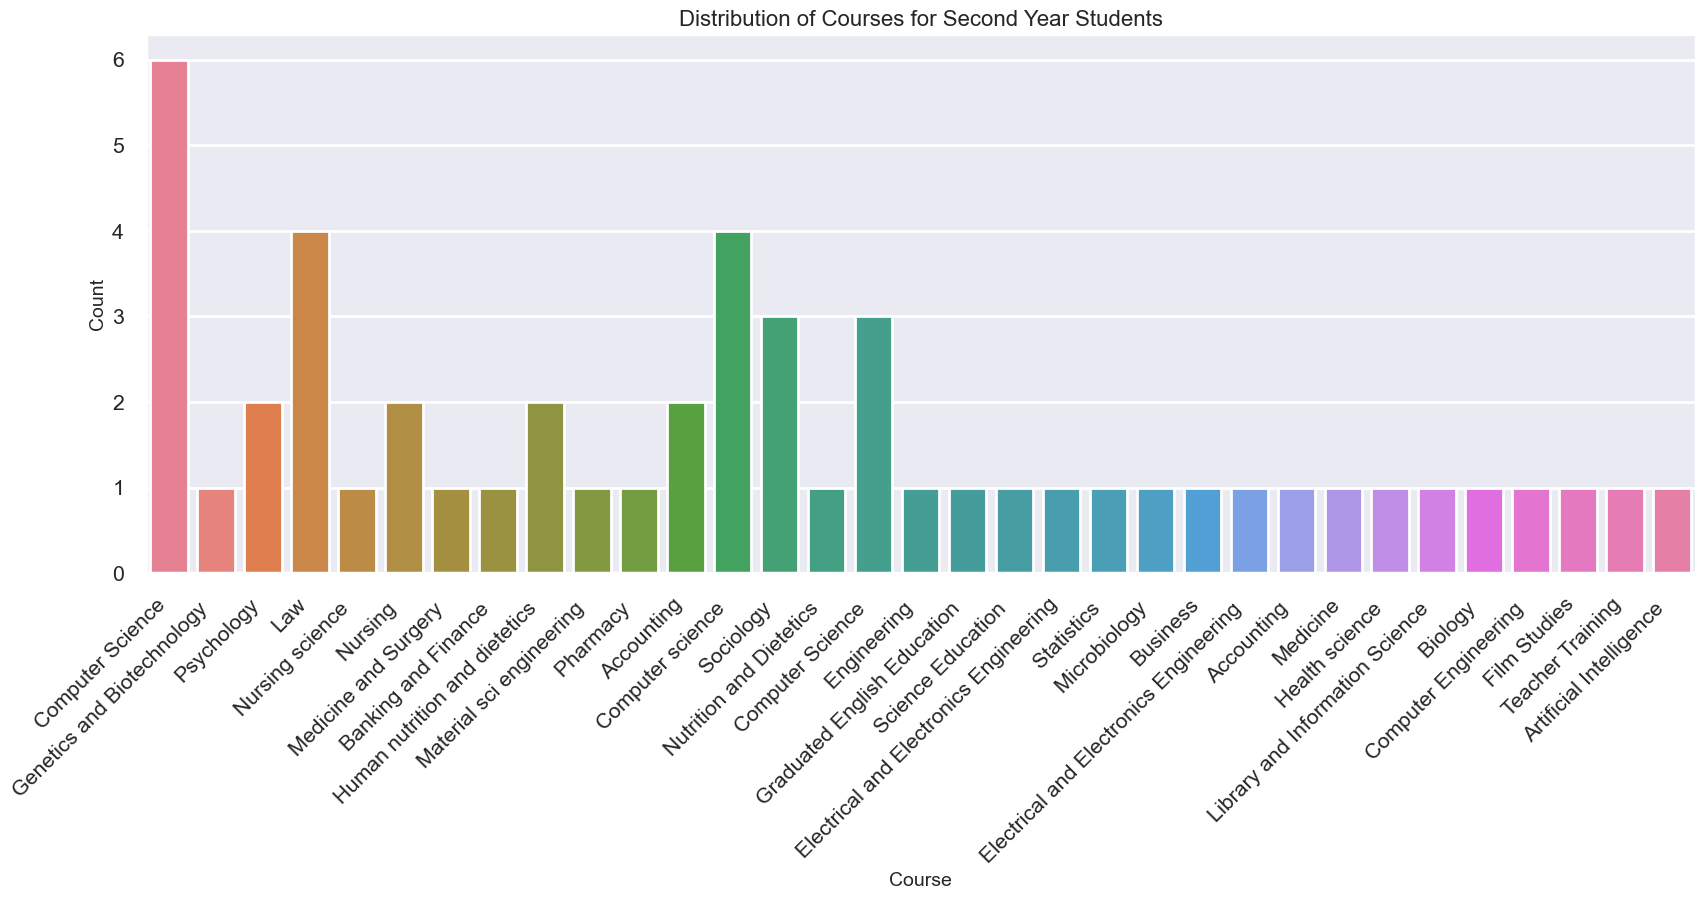

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(20, 7))

filtered_data = student_data[student_data['Year'] == 'Second Year']
chart = sns.countplot(x='Course', data=filtered_data, palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
chart.set_title('Distribution of Courses for Second Year Students', fontsize=16)
chart.set_xlabel('Course', fontsize=14)
chart.set_ylabel('Count', fontsize=14)

plt.show()
# Save the figure to a file
plt.savefig("second_year_course_distribution.png")


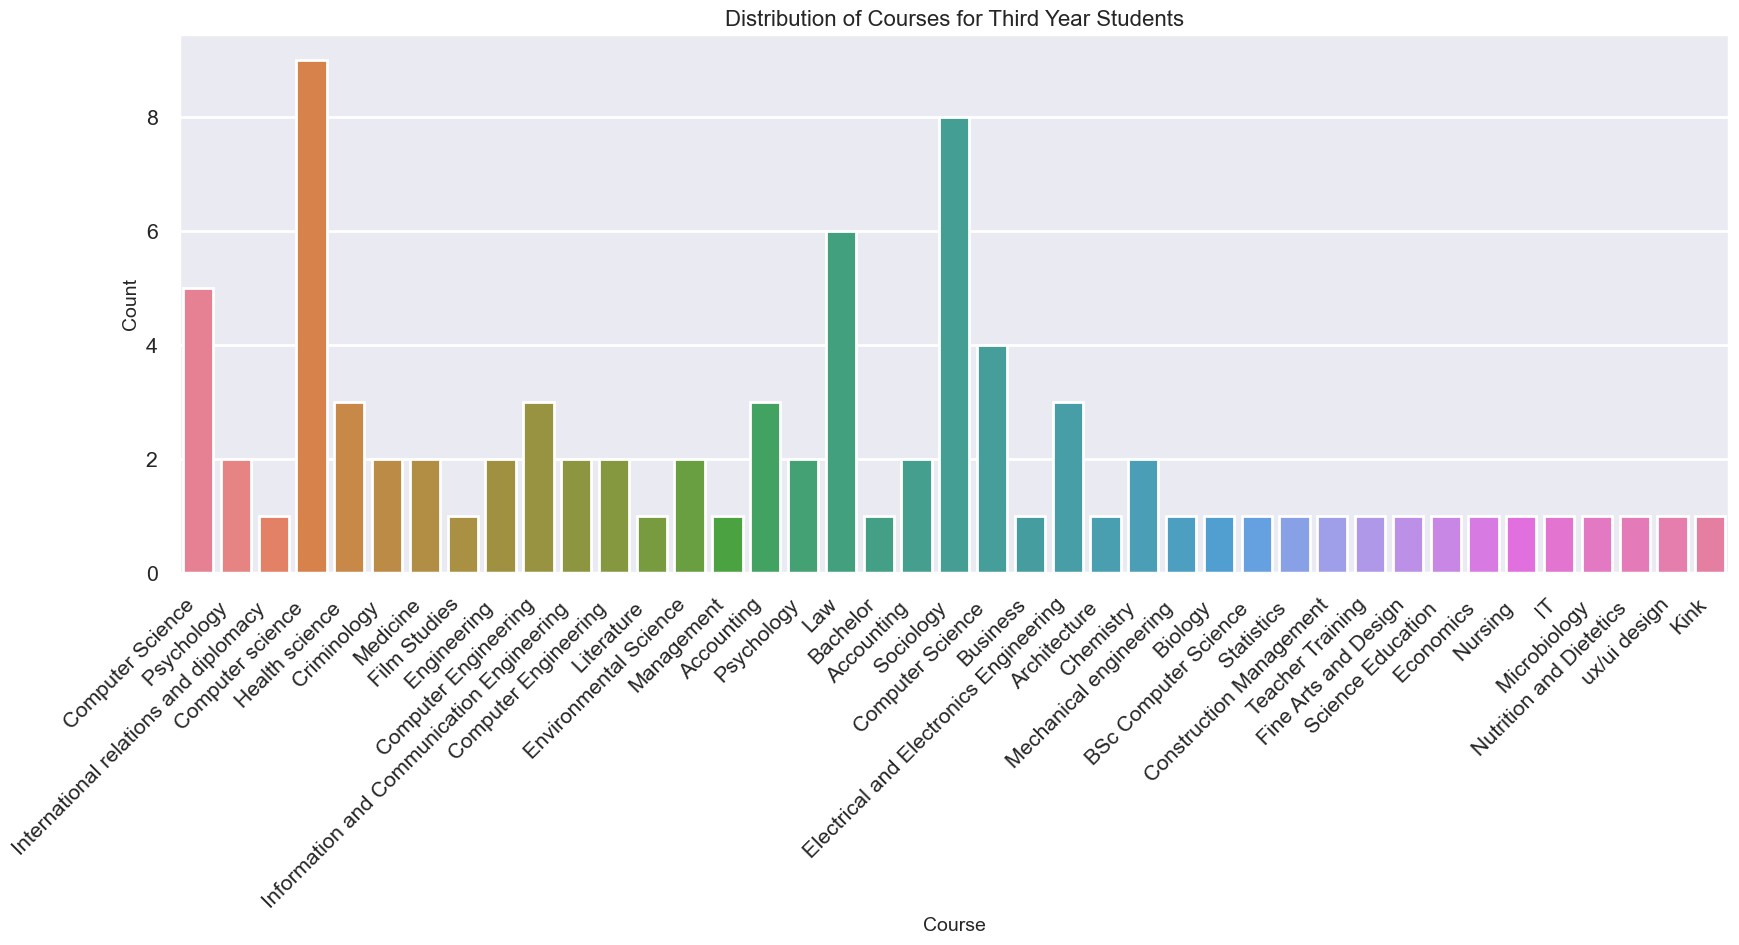

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(20, 7))

filtered_data = student_data[student_data['Year'] == 'Third Year']
chart = sns.countplot(x='Course', data=filtered_data, palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
chart.set_title('Distribution of Courses for Third Year Students', fontsize=16)
chart.set_xlabel('Course', fontsize=14)
chart.set_ylabel('Count', fontsize=14)

plt.show()
# Save the figure to a file
plt.savefig("third_year_course_distribution.png")


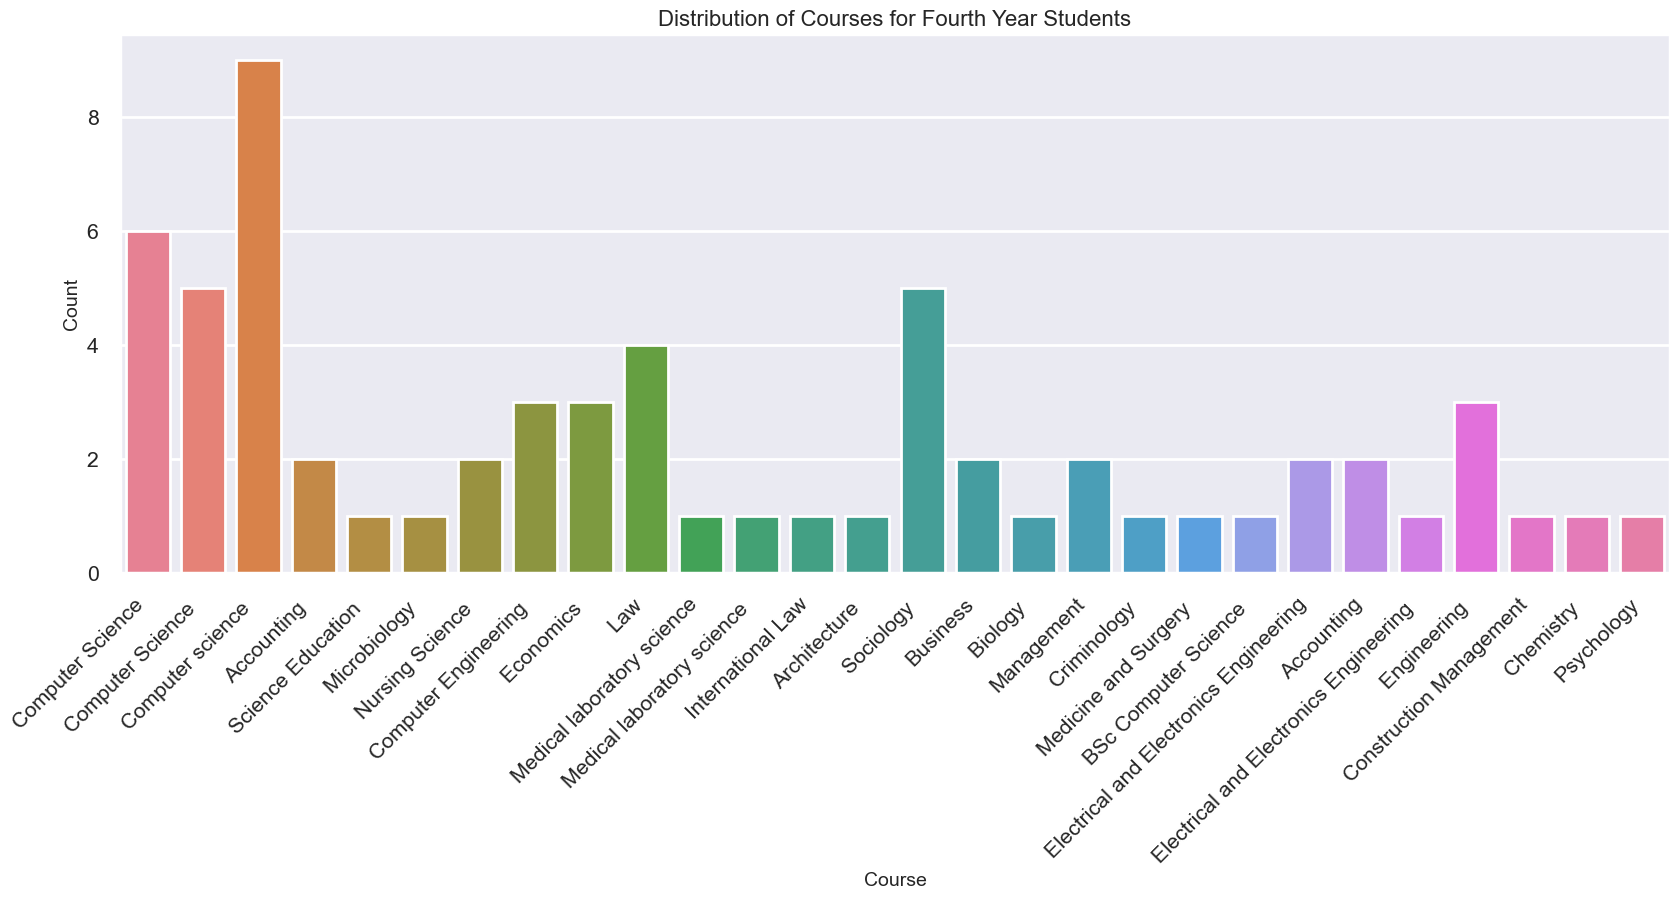

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(20, 7))

filtered_data = student_data[student_data['Year'] == 'Fourth Year']
chart = sns.countplot(x='Course', data=filtered_data, palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
chart.set_title('Distribution of Courses for Fourth Year Students', fontsize=16)
chart.set_xlabel('Course', fontsize=14)
chart.set_ylabel('Count', fontsize=14)

plt.show()
# Save the figure to a file
plt.savefig("fourth_year_course_distribution.png")


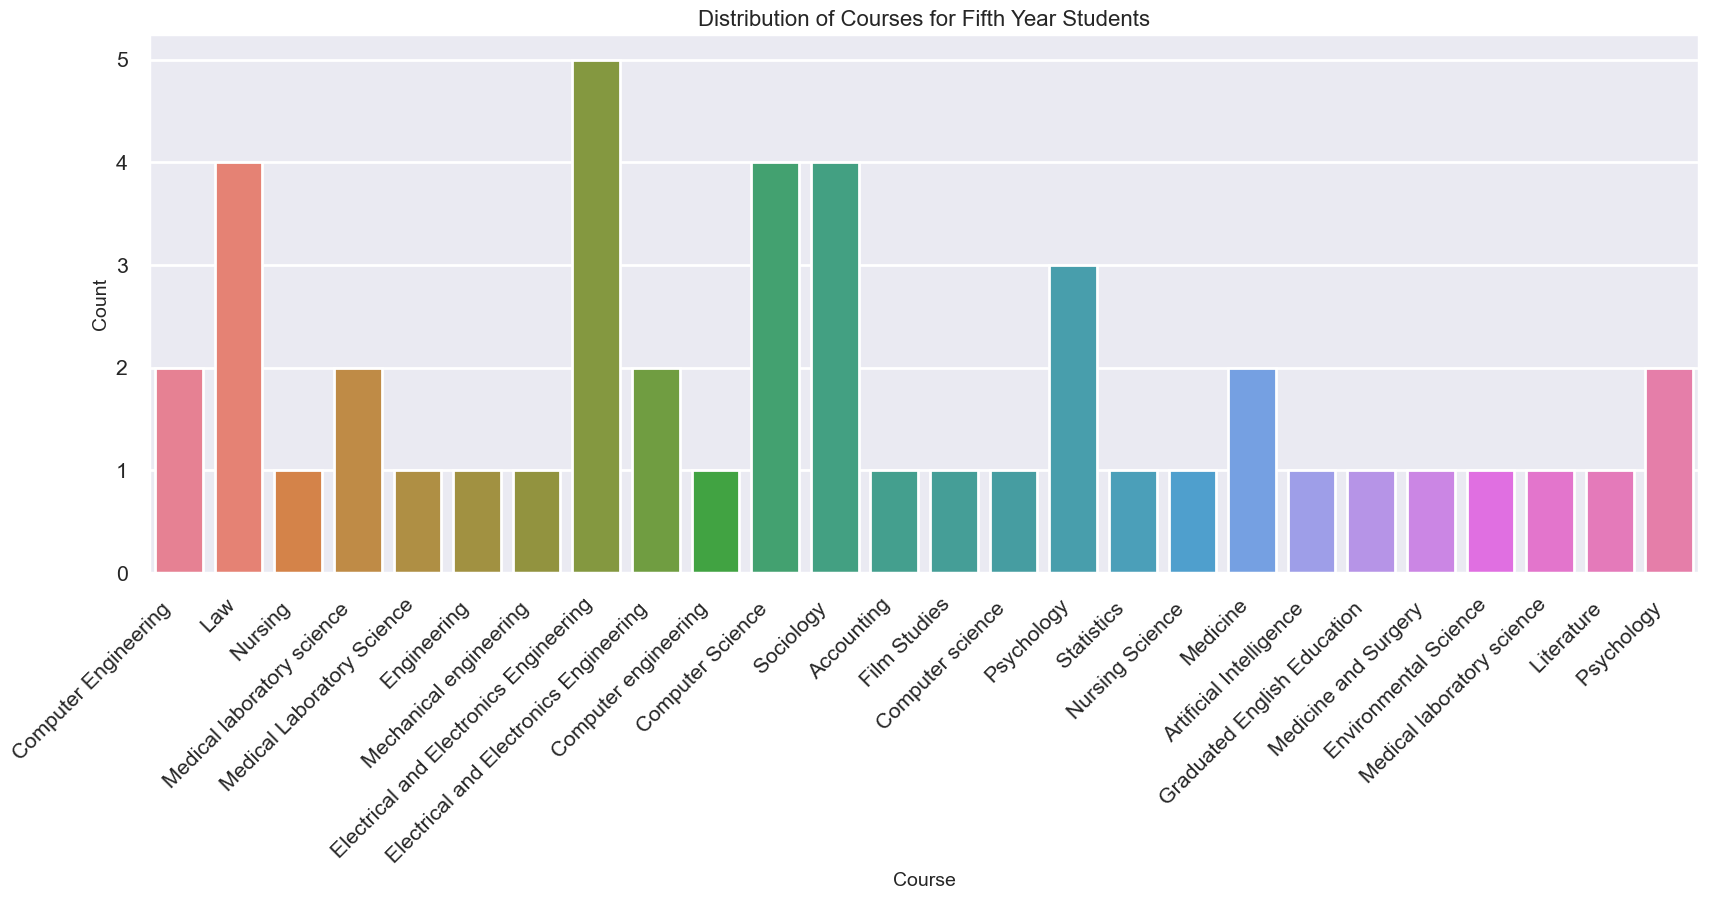

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(20, 7))

filtered_data = student_data[student_data['Year'] == 'Fifth Year']
chart = sns.countplot(x='Course', data=filtered_data, palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
chart.set_title('Distribution of Courses for Fifth Year Students', fontsize=16)
chart.set_xlabel('Course', fontsize=14)
chart.set_ylabel('Count', fontsize=14)

plt.show()
# Save the figure to a file
plt.savefig("fifth_year_course_distribution.png")


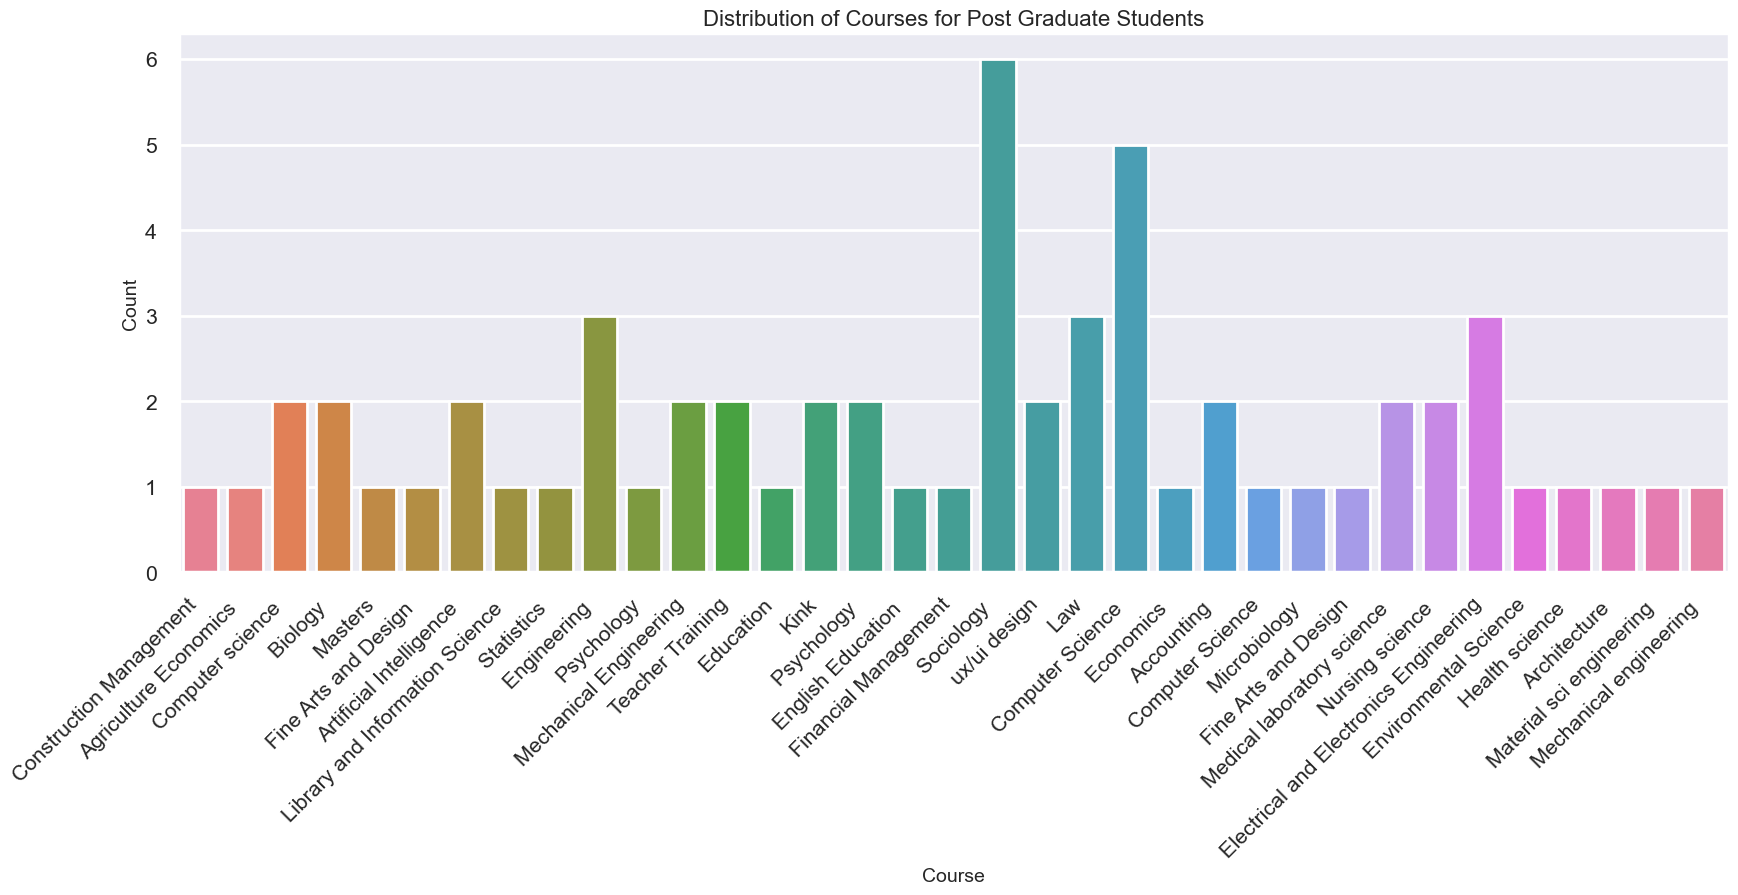

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(20, 7))

filtered_data = student_data[student_data['Year'] == 'Post Graduate']
chart = sns.countplot(x='Course', data=filtered_data, palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
chart.set_title('Distribution of Courses for Post Graduate Students', fontsize=16)
chart.set_xlabel('Course', fontsize=14)
chart.set_ylabel('Count', fontsize=14)

plt.show()
# Save the figure to a file
plt.savefig("post_graduate_course_distribution.png")


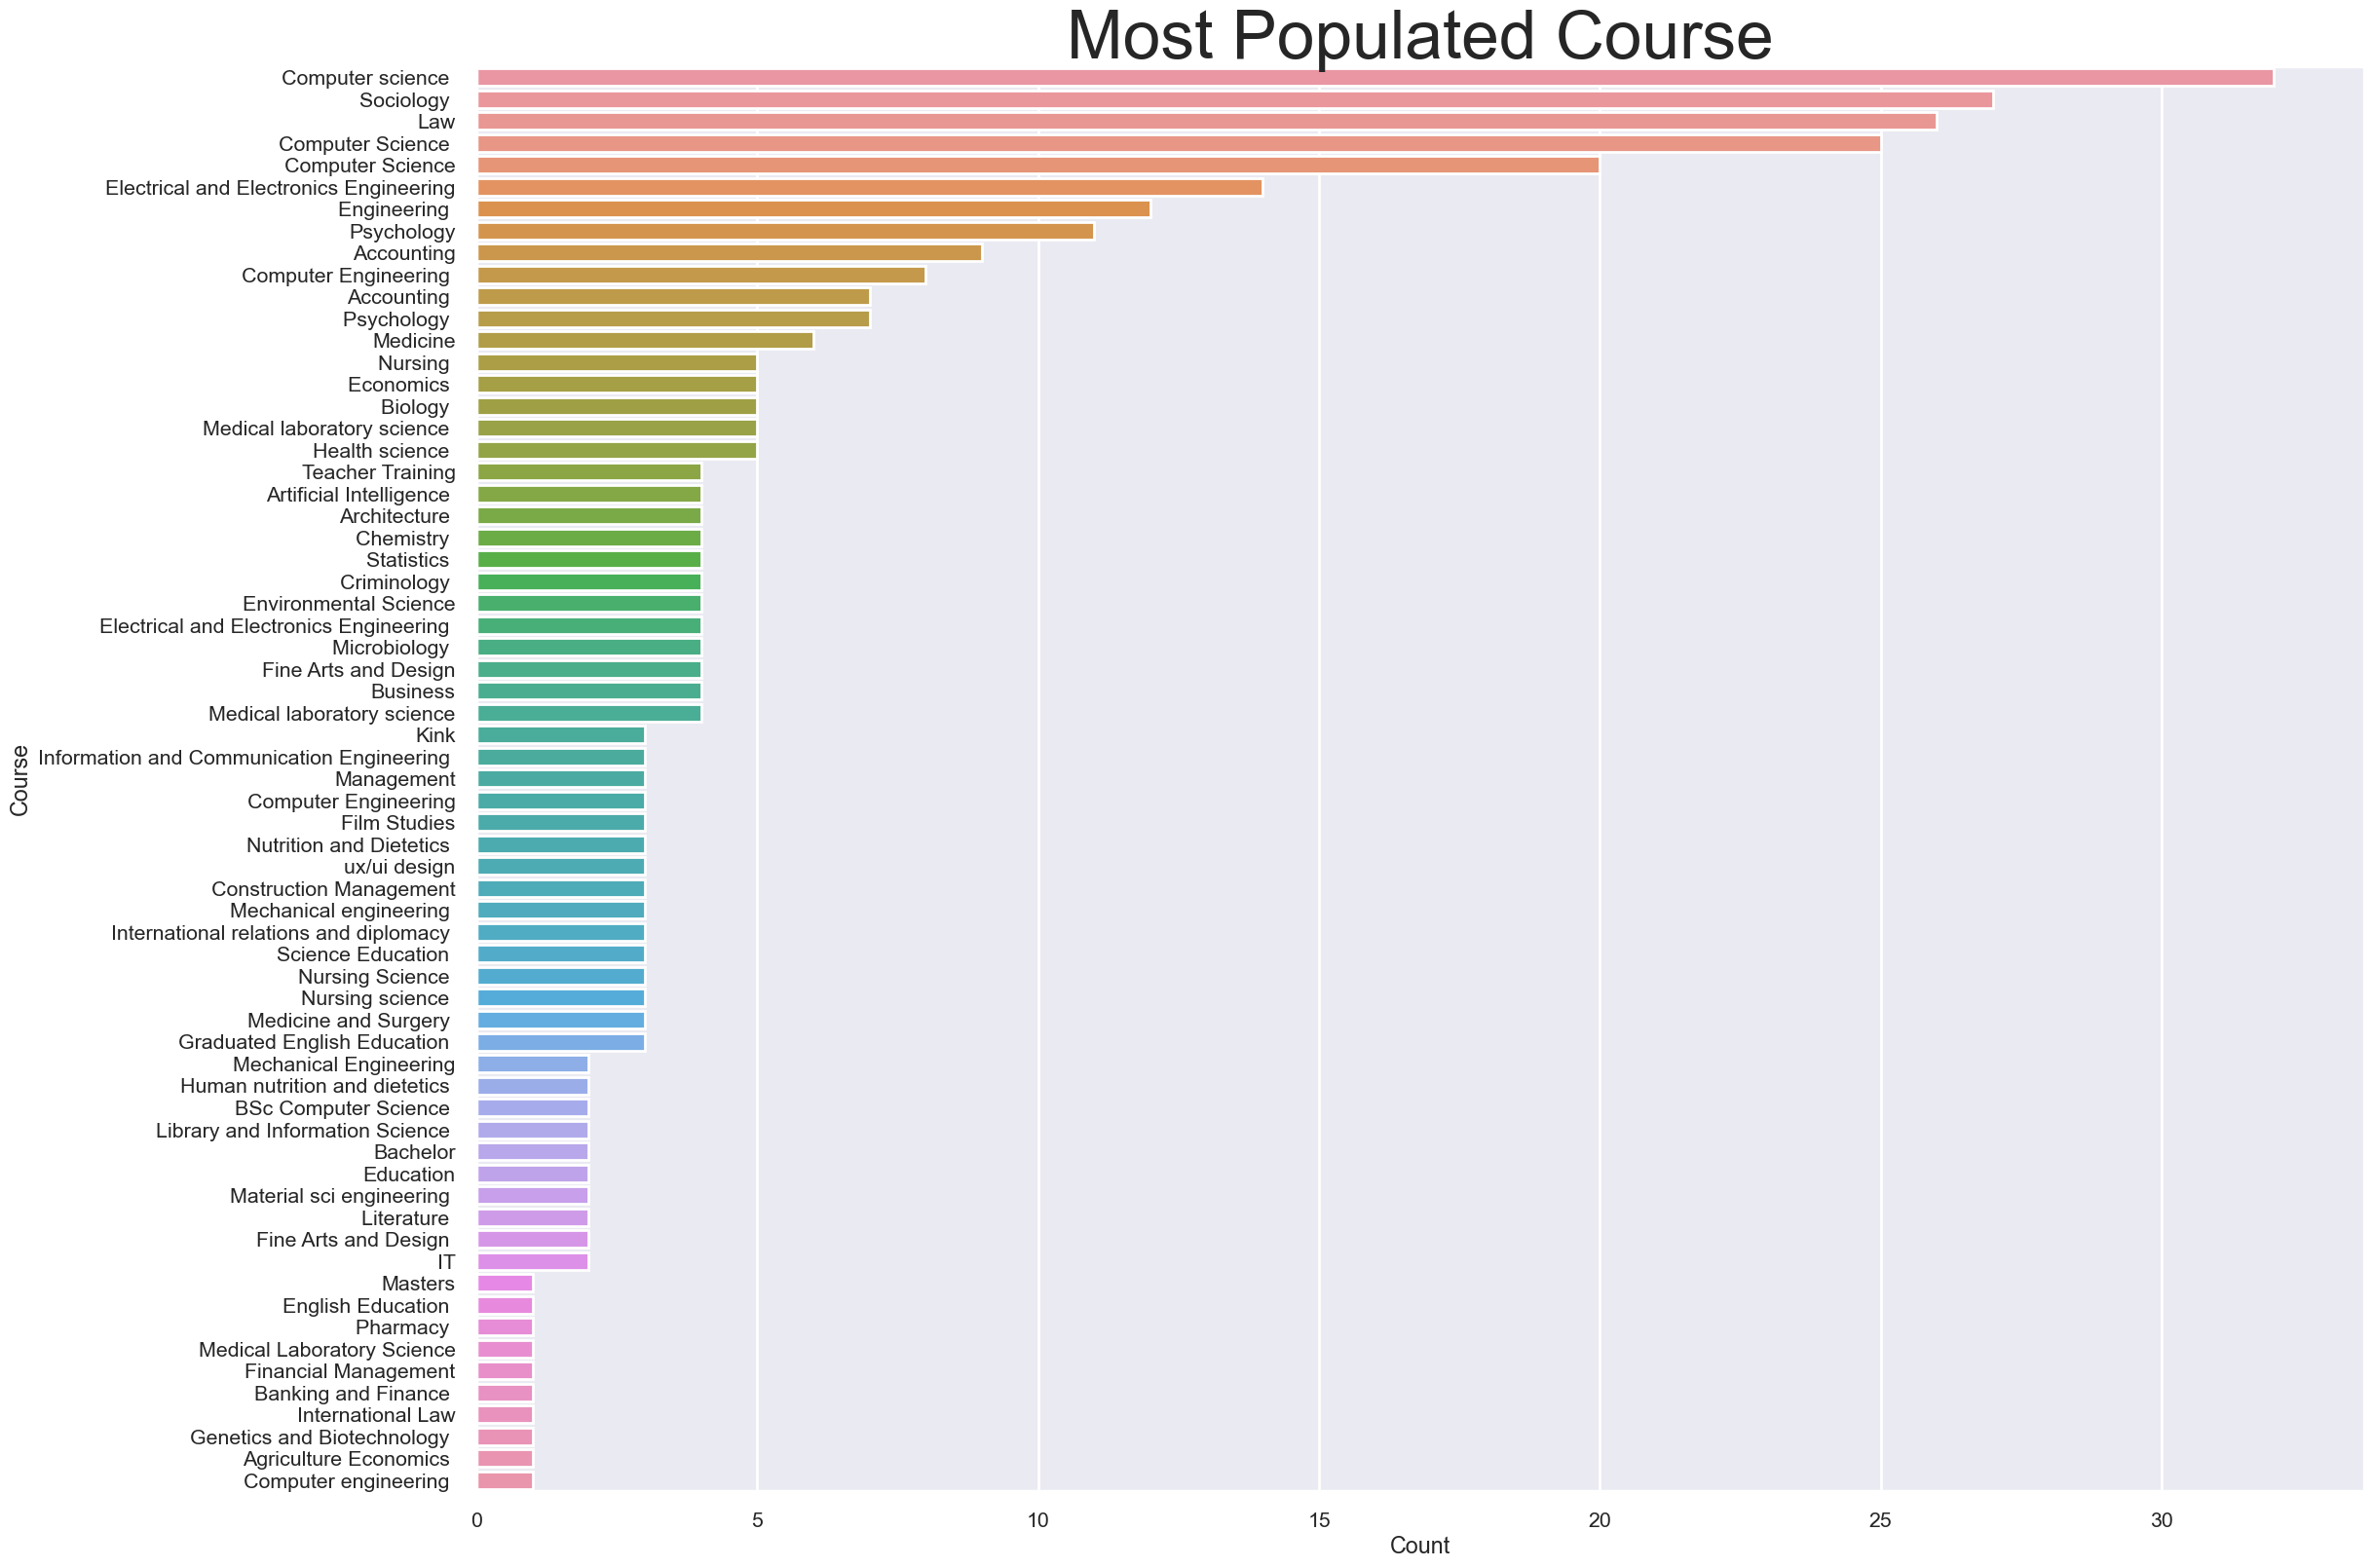

<Figure size 640x480 with 0 Axes>

In [21]:
# Most populated course
plt.figure(figsize=(25, 19))
sns.countplot(y='Course', data=student_data, order=student_data['Course'].value_counts().index)
plt.title('Most Populated Course', size = 50)
plt.xlabel('Count')
plt.ylabel('Course')
plt.show()
# Save the figure to a file
plt.savefig("most_populated_course.png")


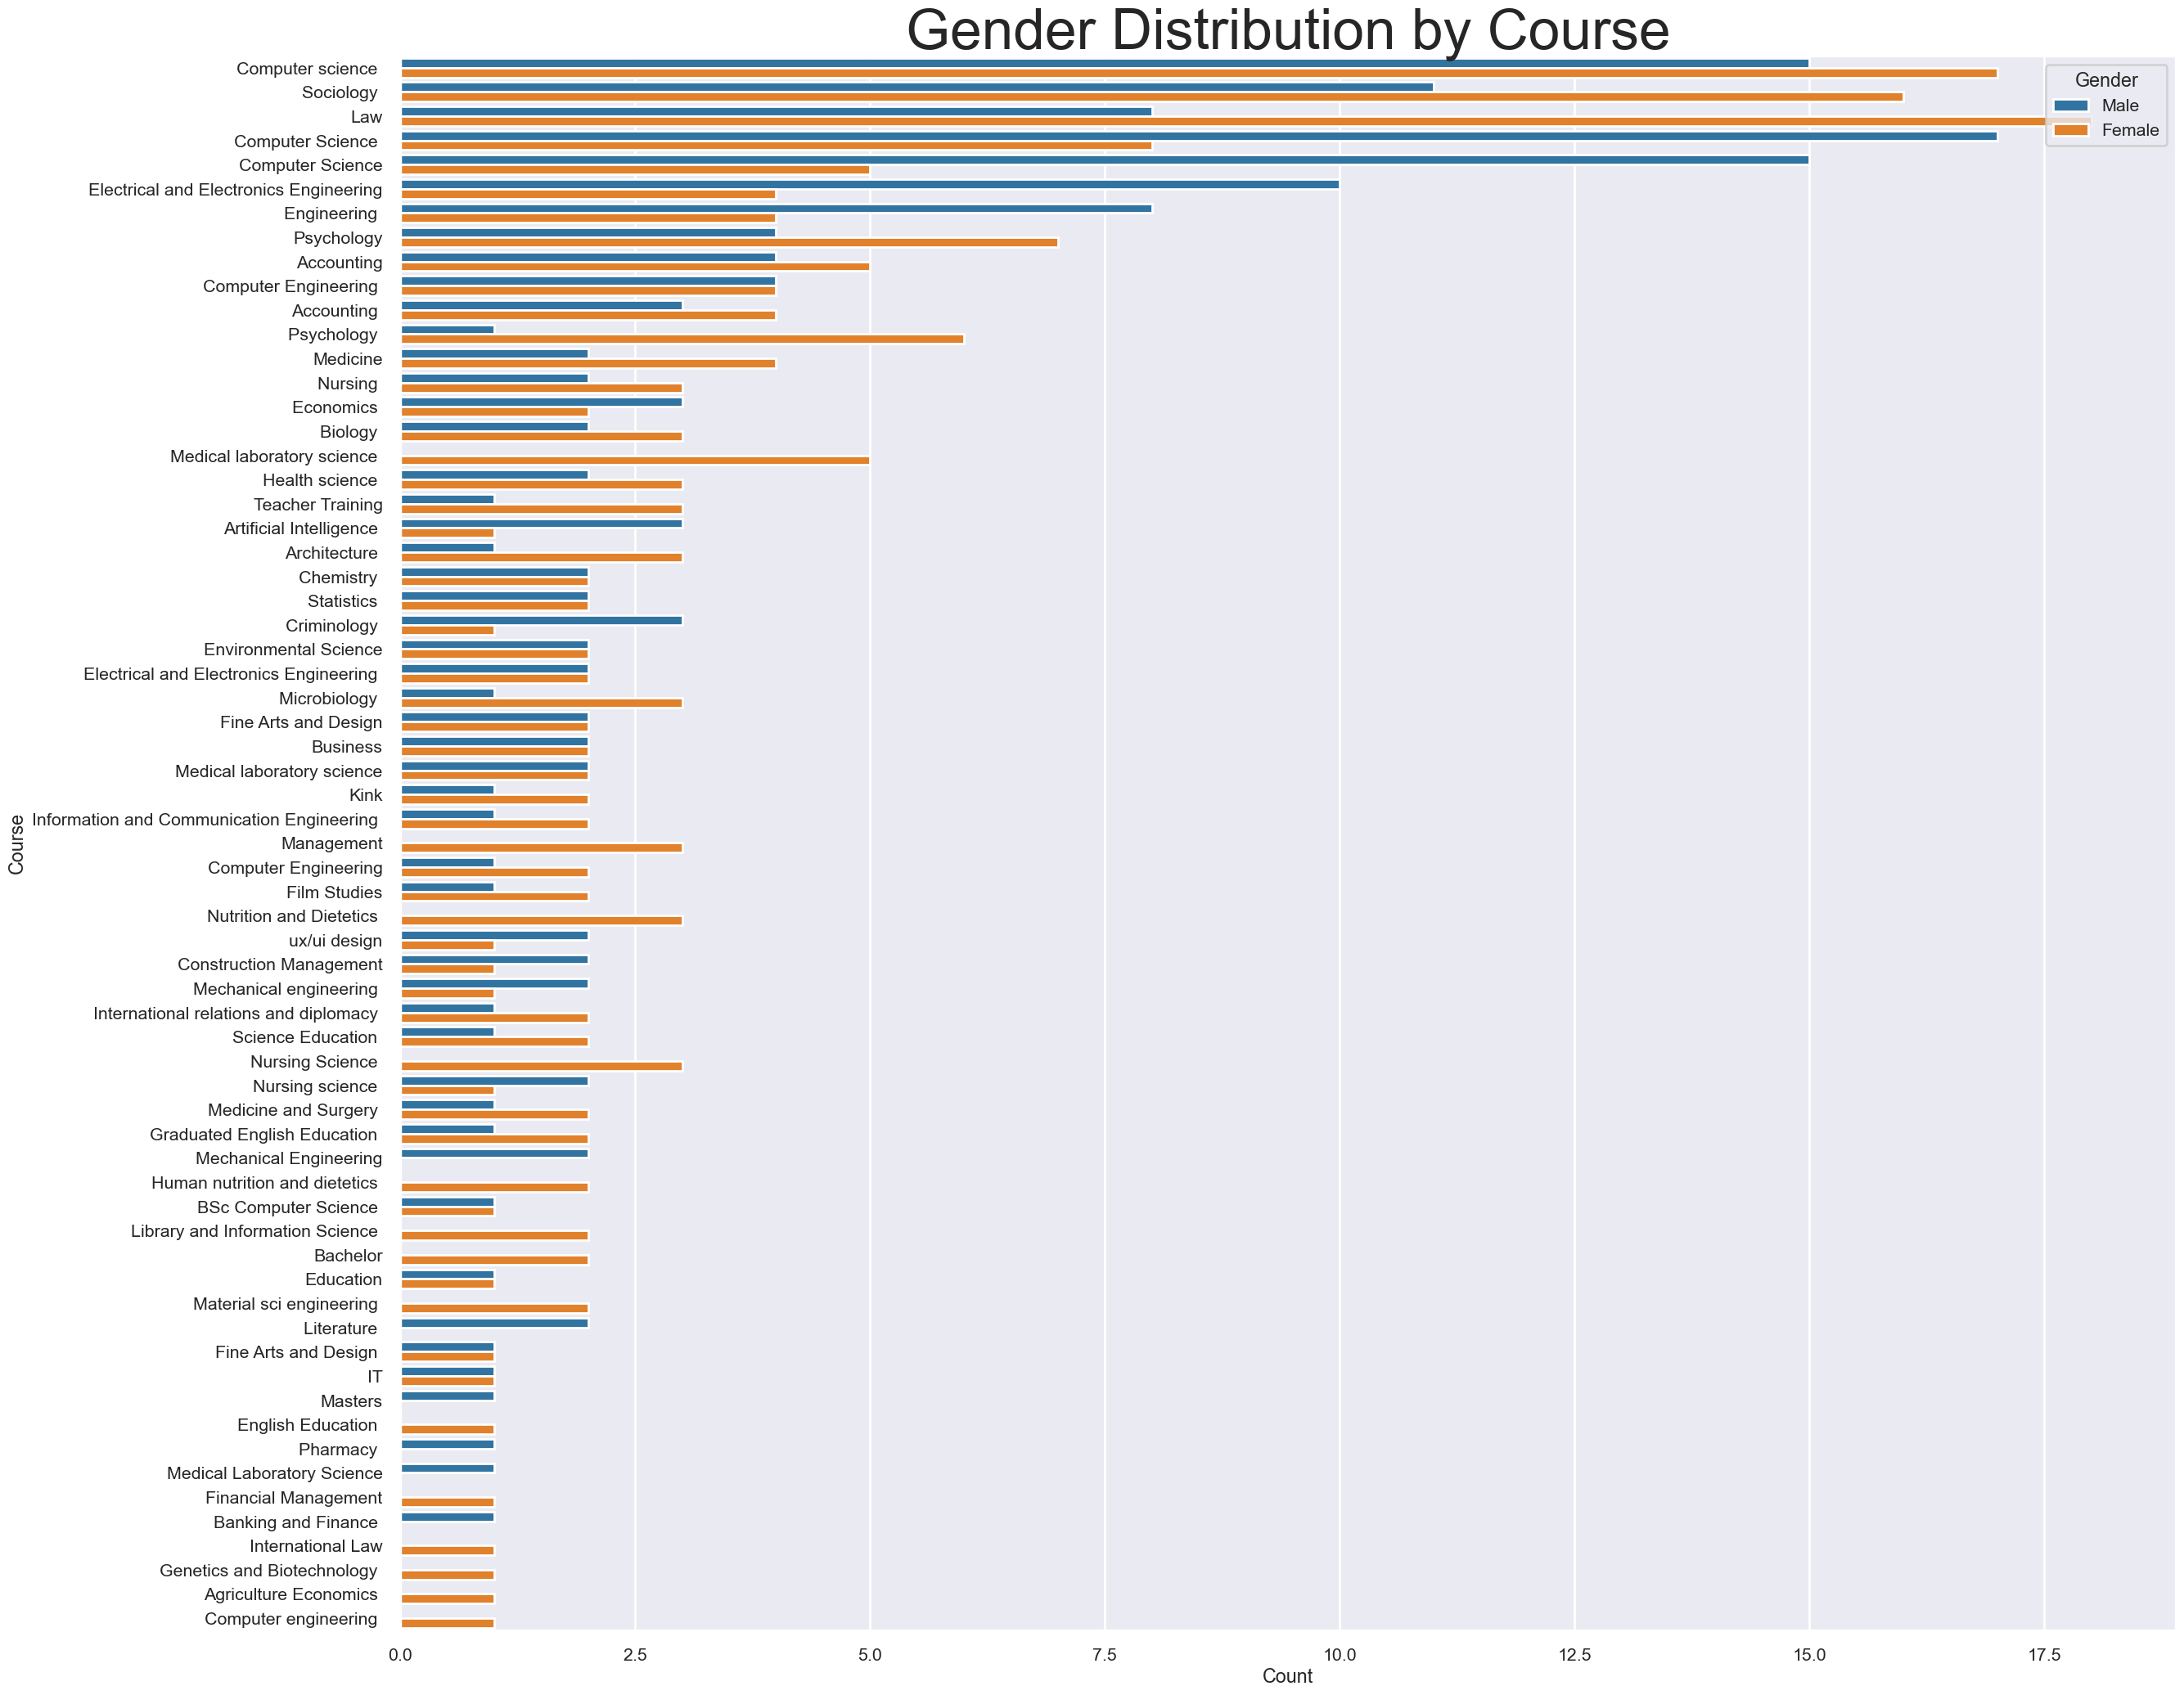

<Figure size 640x480 with 0 Axes>

In [22]:
# Gender distribution by course
plt.figure(figsize=(28, 25))
sns.countplot(y='Course', hue='Gender', data=student_data, order=student_data['Course'].value_counts().index)
plt.title('Gender Distribution by Course', size = 50)
plt.xlabel('Count')
plt.ylabel('Course')
plt.legend(title='Gender')
plt.show()
# Save the figure to a file
plt.savefig("gender_distribution_by_course.png")

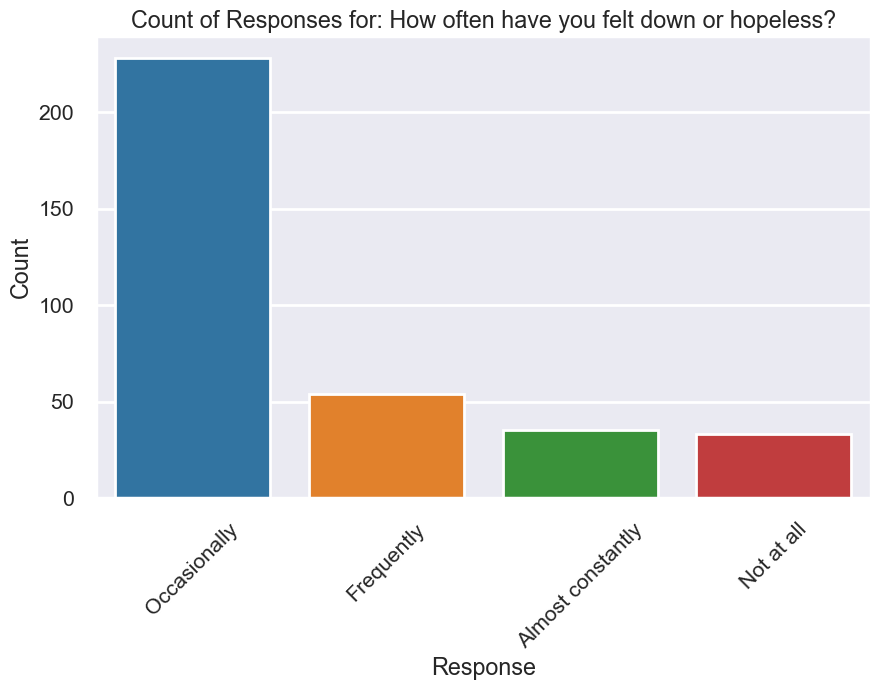

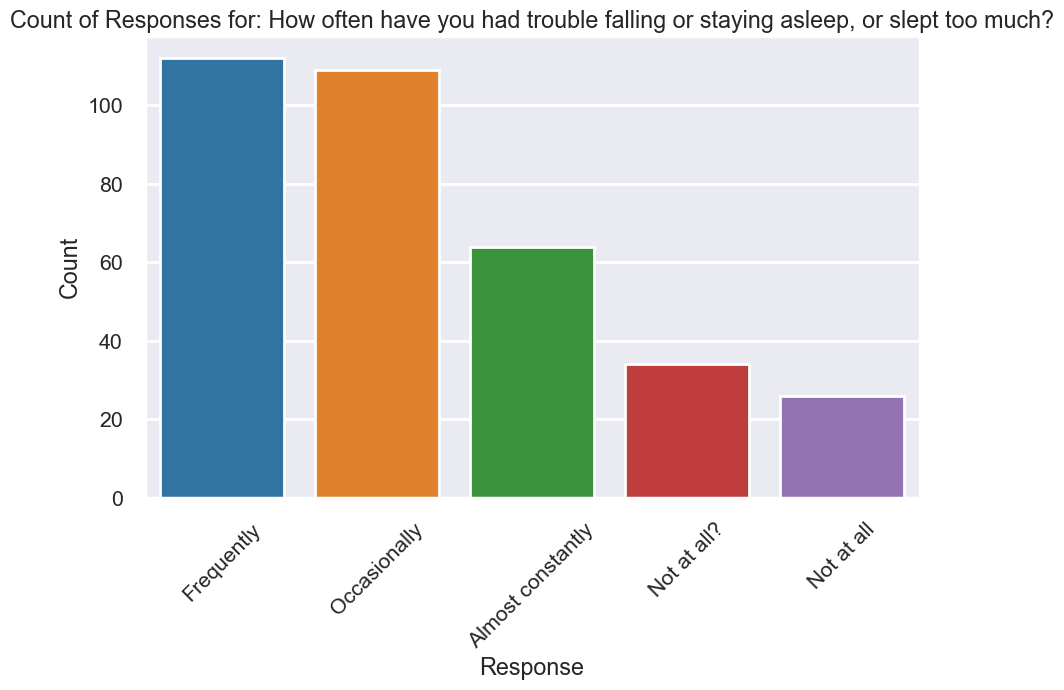

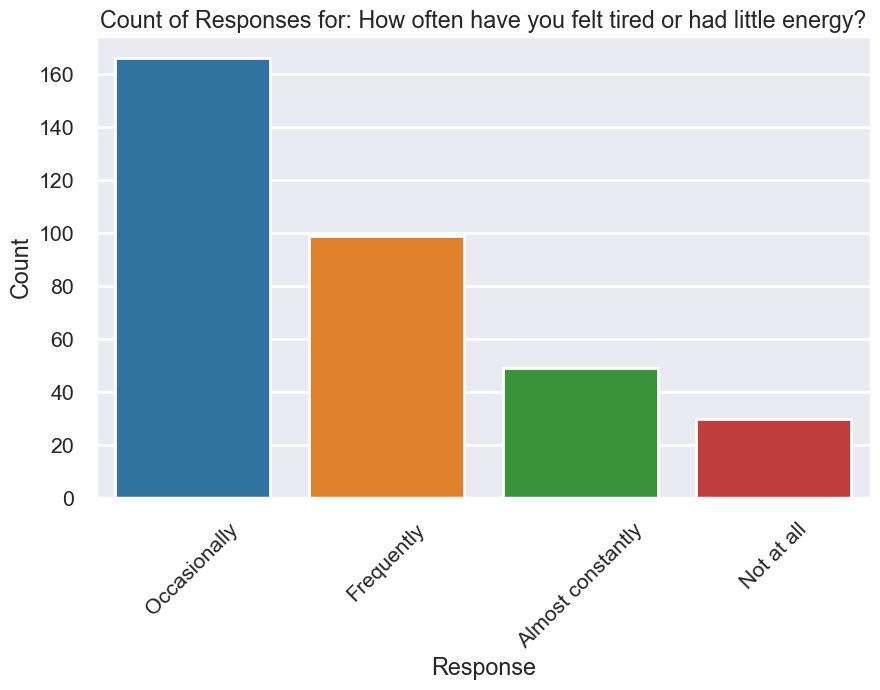

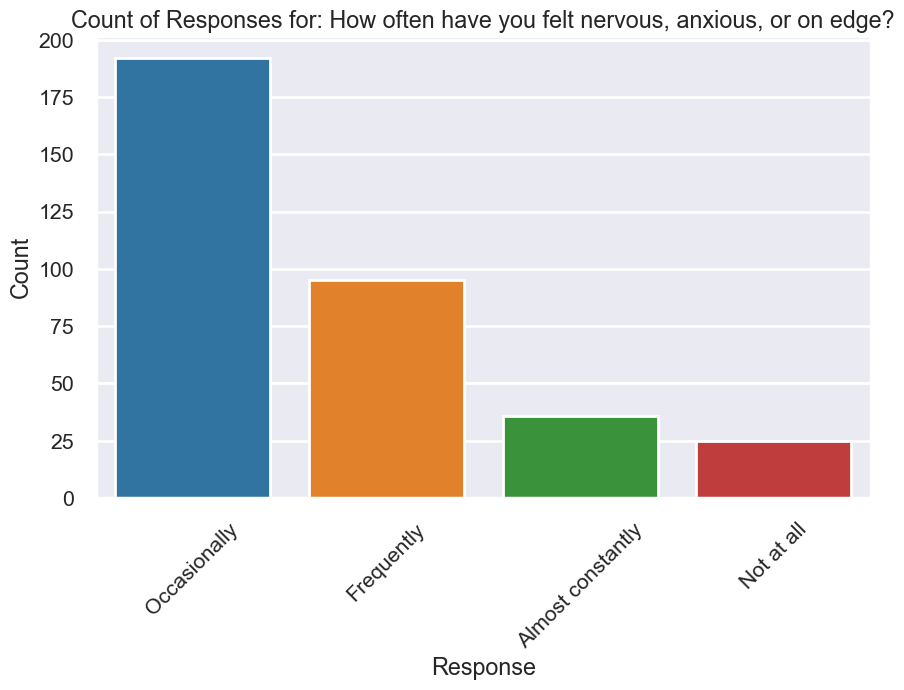

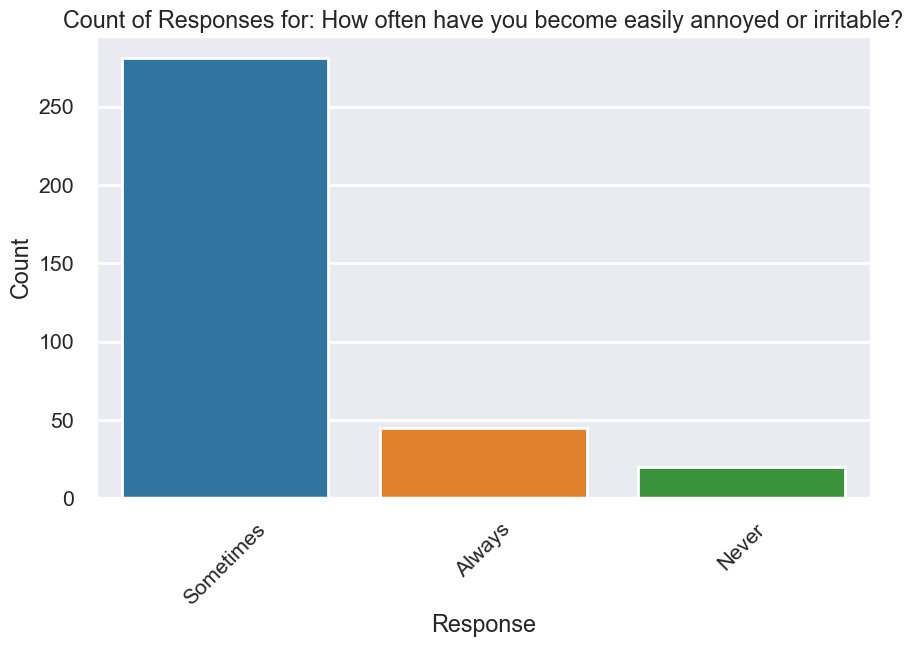

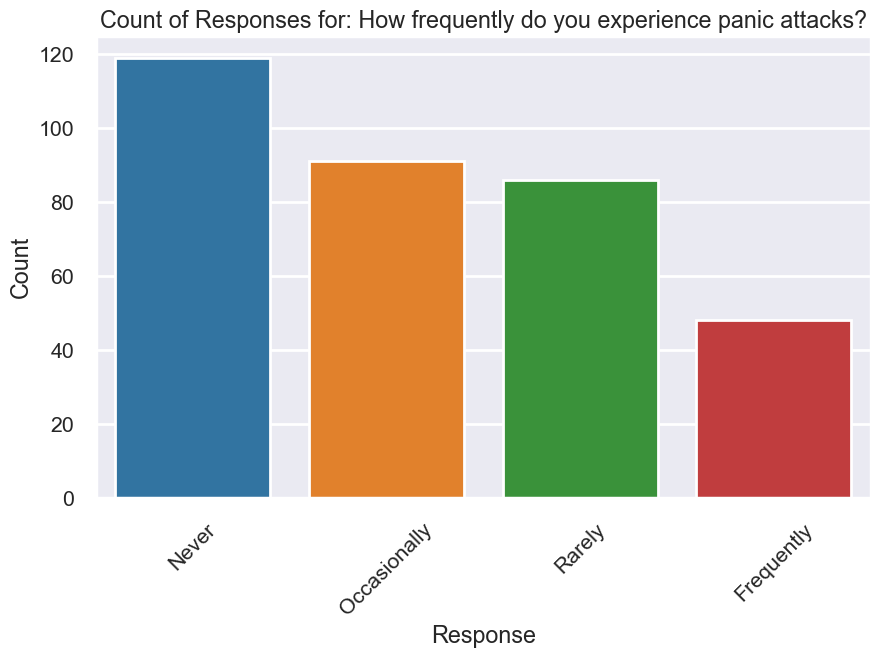

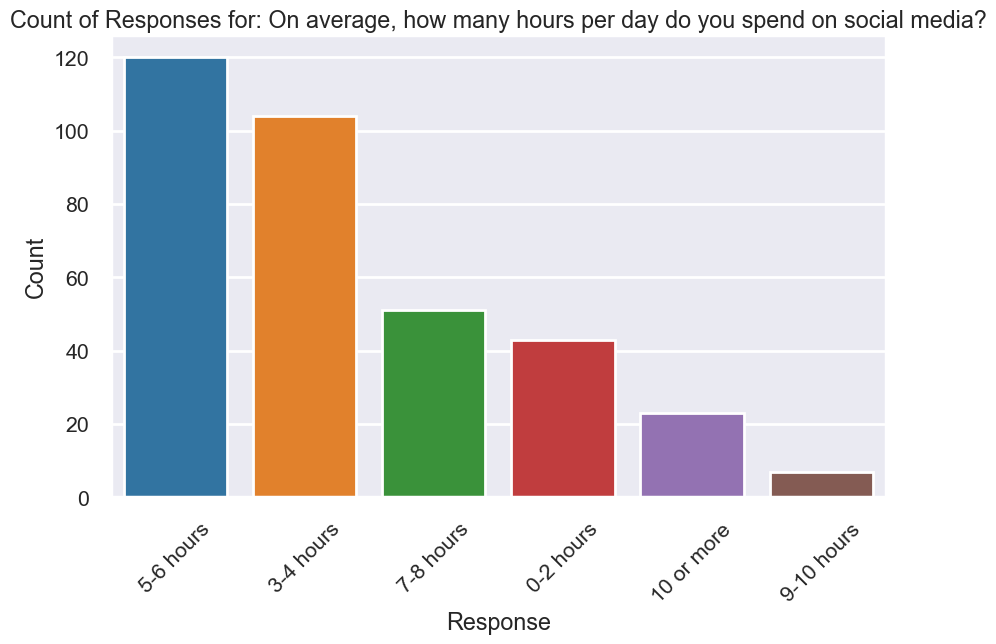

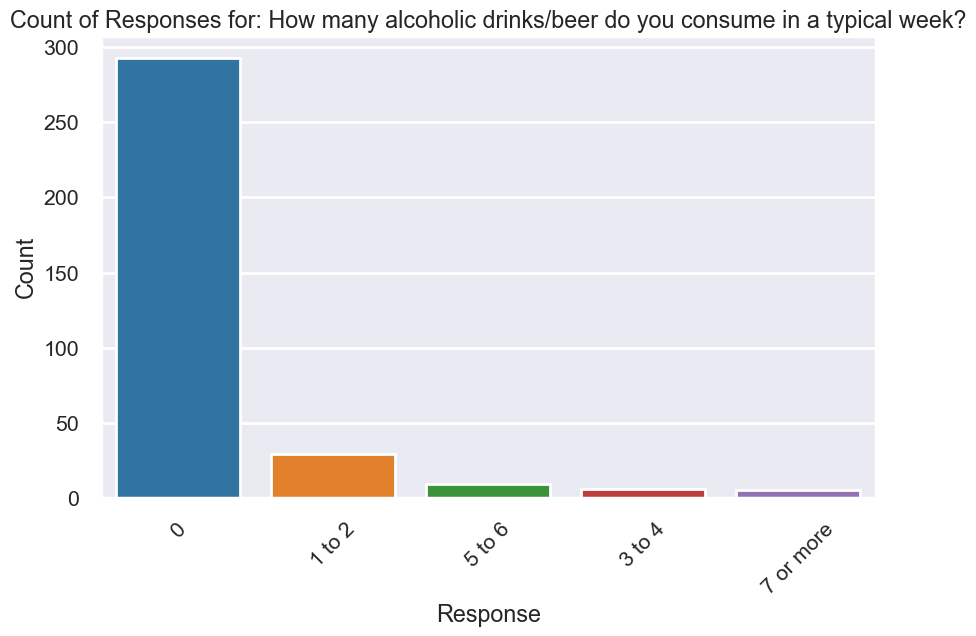

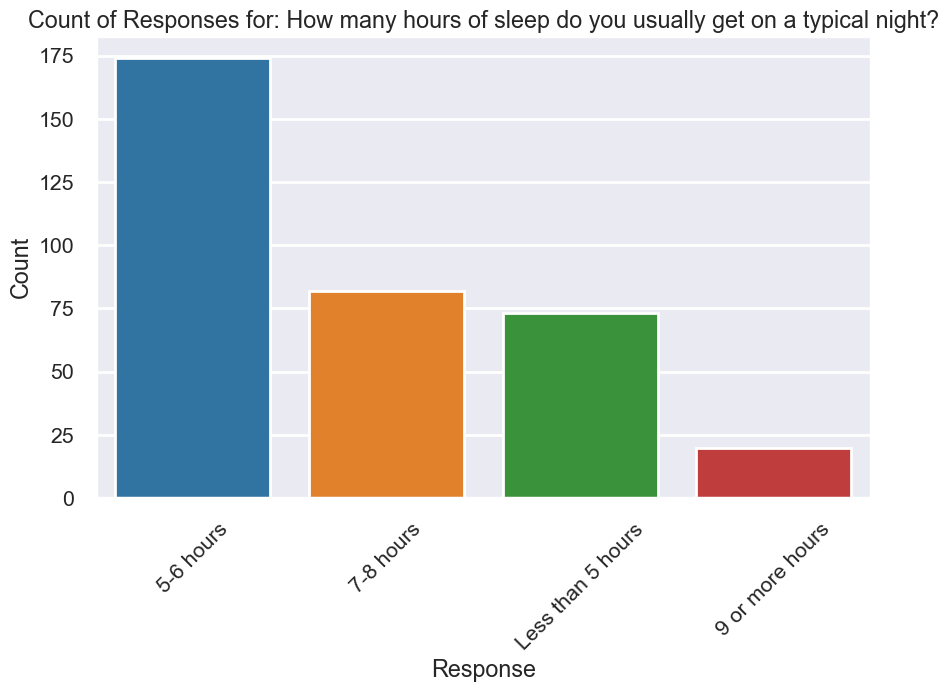

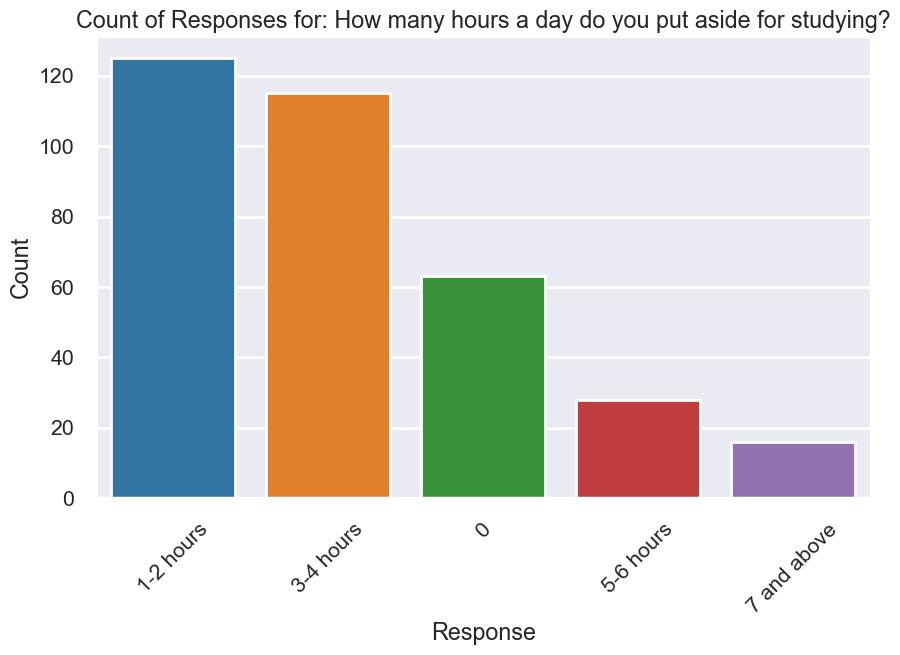

In [23]:
import re
# Define the list of questions
questions = [
    'How often have you felt down or hopeless?',
    'How often have you had trouble falling or staying asleep, or slept too much?',
    'How often have you felt tired or had little energy?',
    'How often have you felt nervous, anxious, or on edge?',
    'How often have you become easily annoyed or irritable?',
    'How frequently do you experience panic attacks?',
    'On average, how many hours per day do you spend on social media?',
    'How many alcoholic drinks/beer do you consume in a typical week?',
    'How many hours of sleep do you usually get on a typical night?',
    'How many hours a day do you put aside for studying?'
]

# Exploring questions individually
for question in questions:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=question, data=student_data, order=student_data[question].value_counts().index)
    plt.title(f'Count of Responses for: {question}')
    plt.xticks(rotation=45)
    plt.xlabel('Response')
    plt.ylabel('Count')
    # Sanitize the filename by removing invalid characters
    sanitized_question = re.sub(r'[^\w\s]', '', question)
    # Save the figure to a file
    plt.savefig(f"count_of_responses_for_{sanitized_question}.png")
    plt.show()






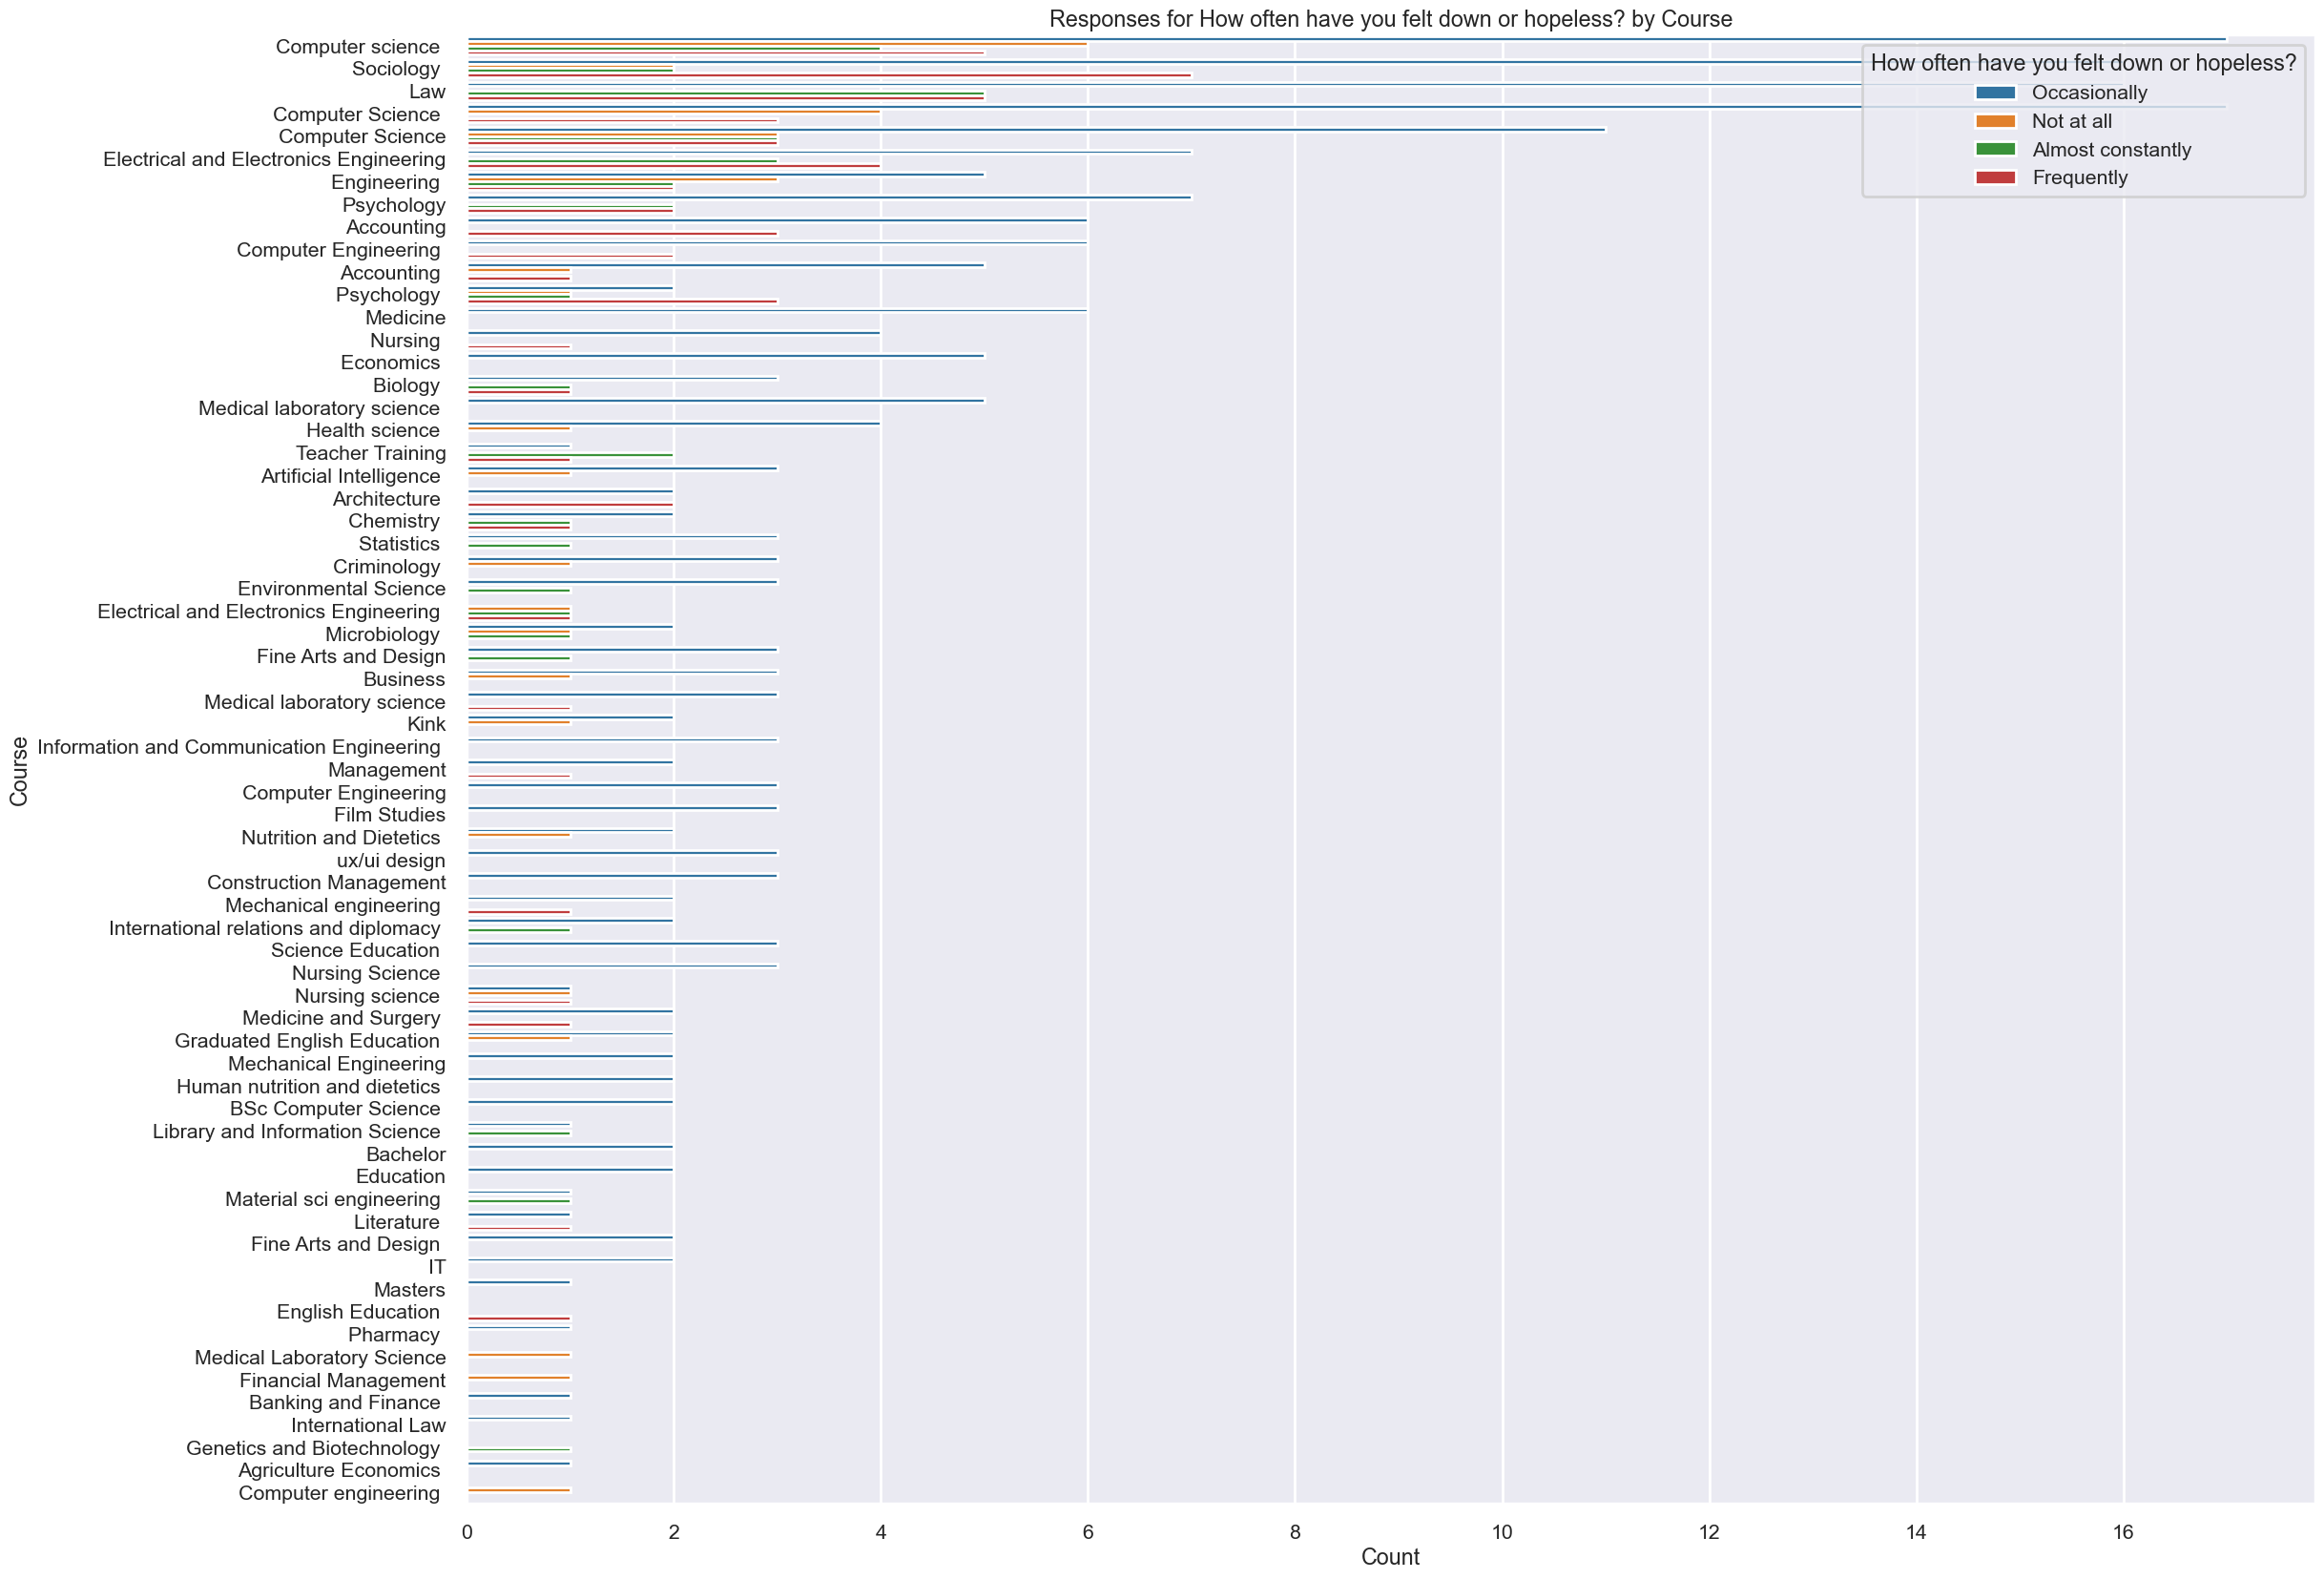

<Figure size 640x480 with 0 Axes>

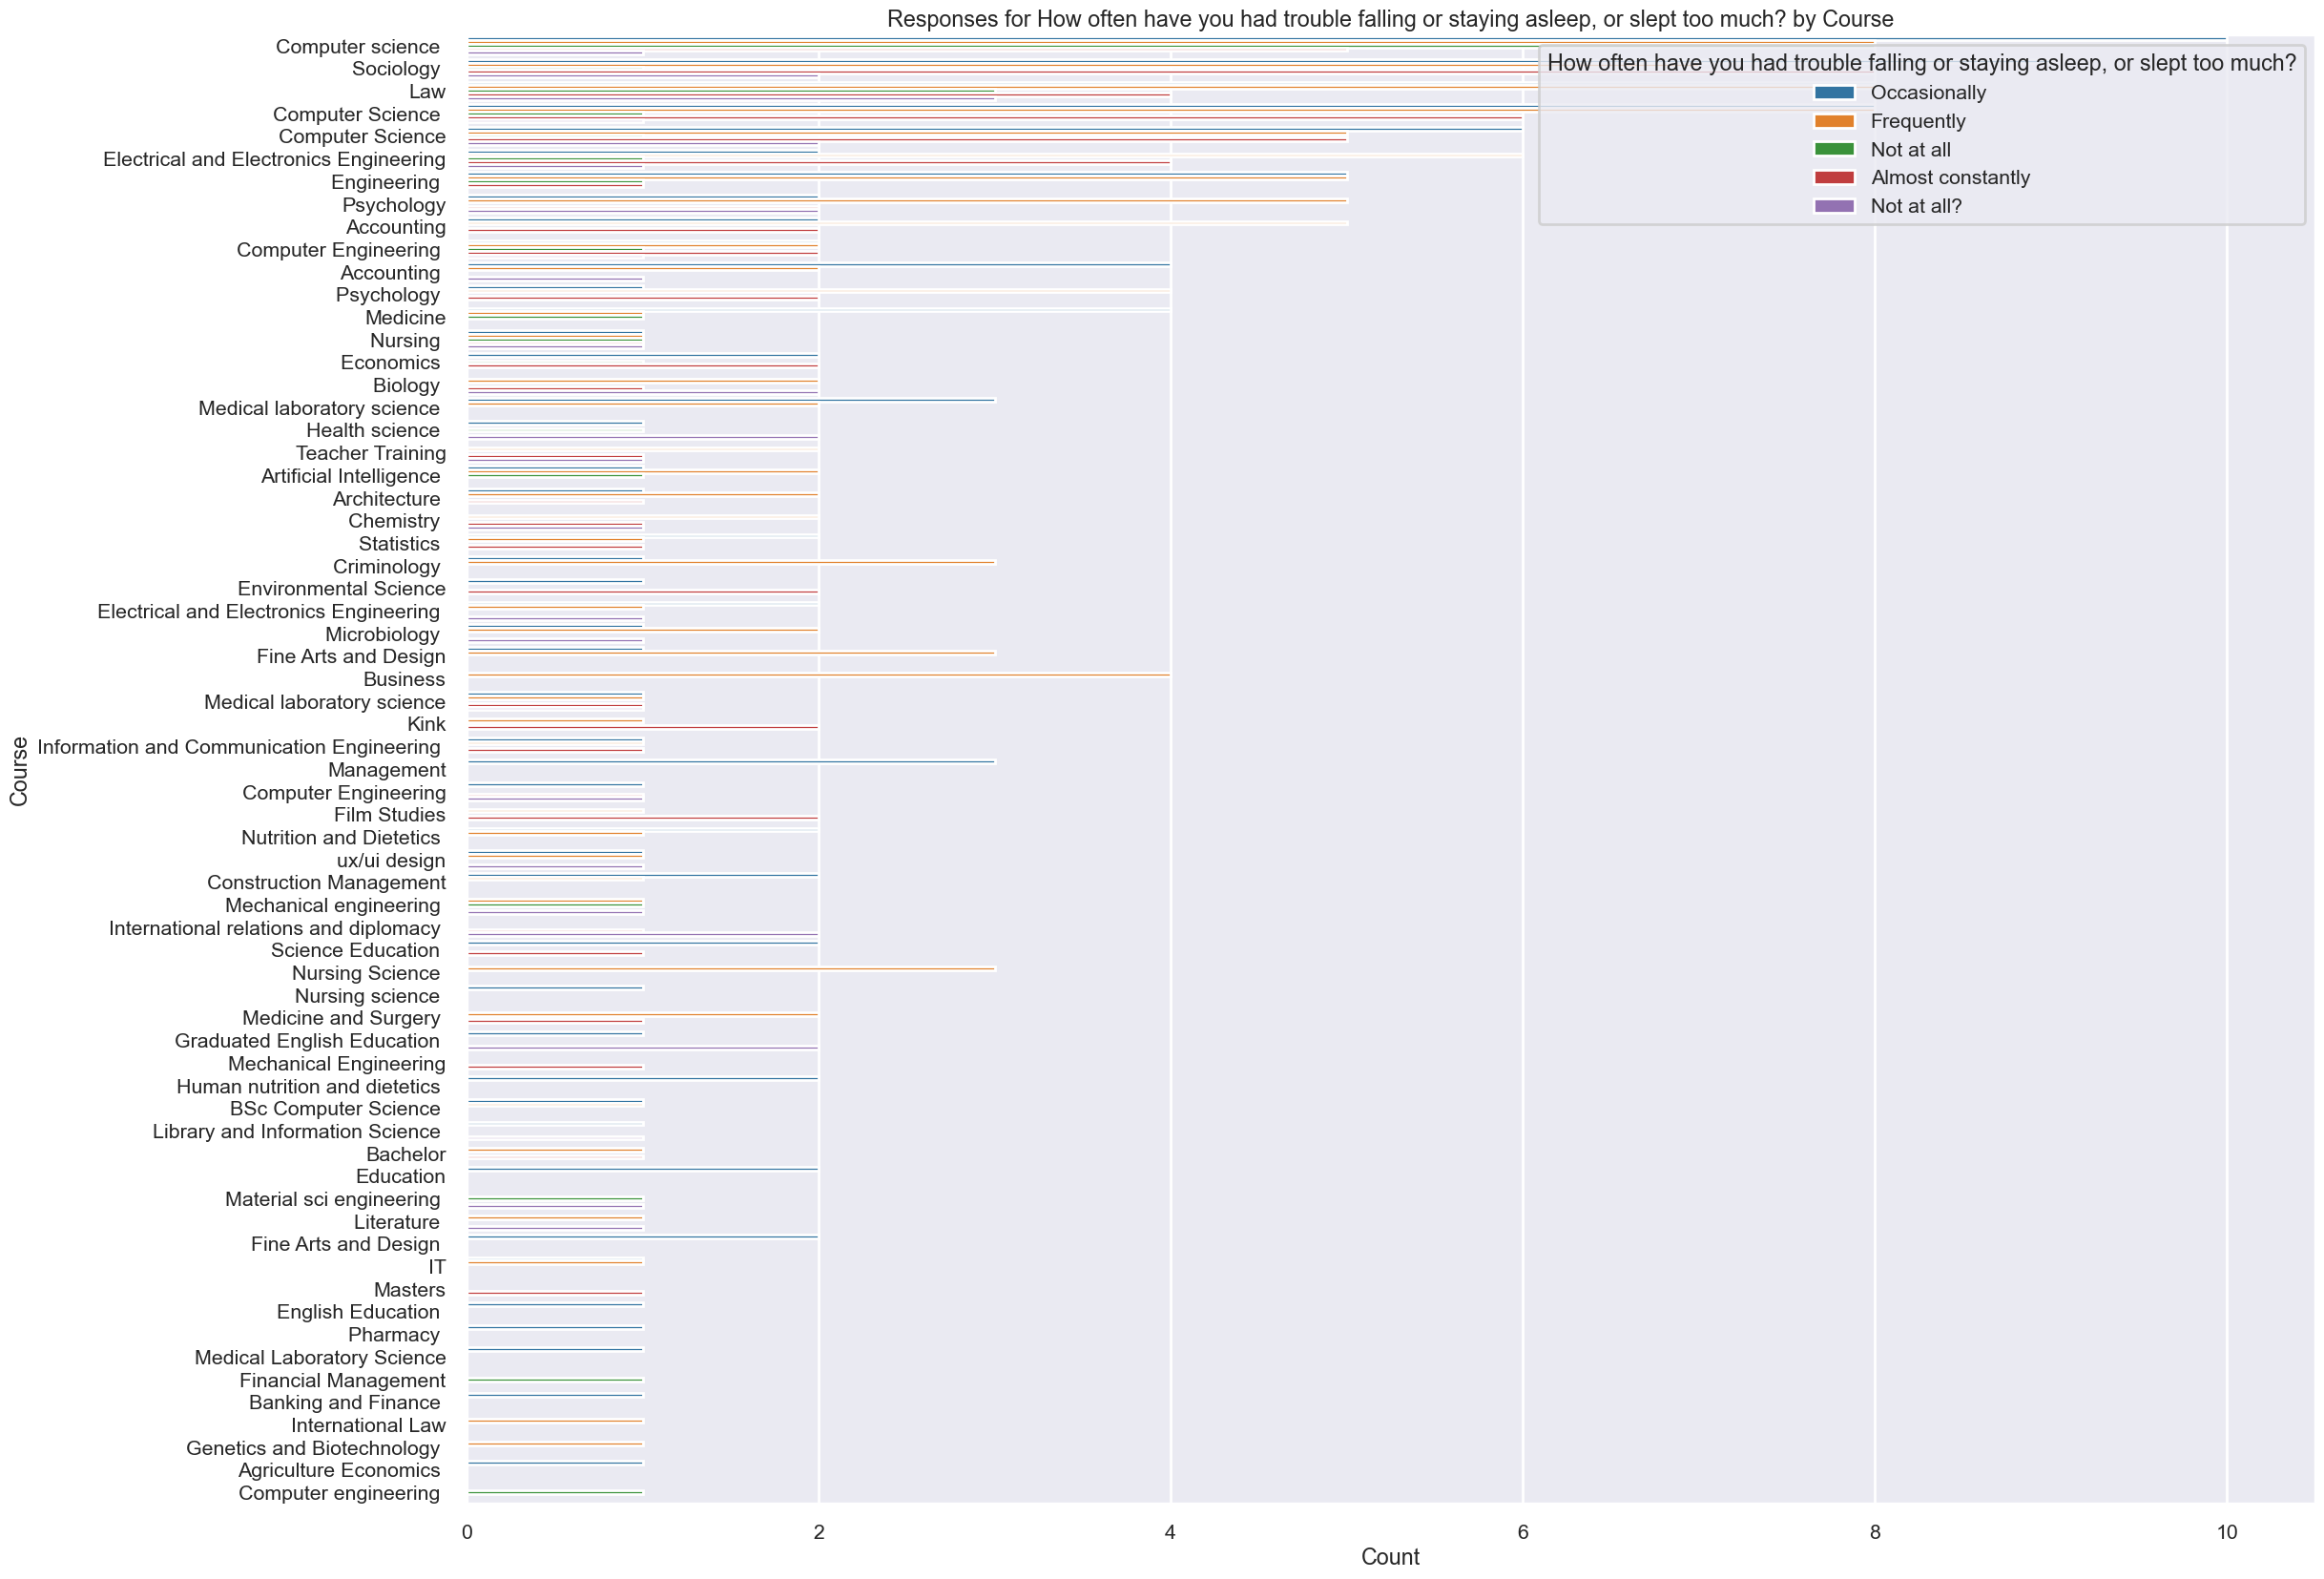

<Figure size 640x480 with 0 Axes>

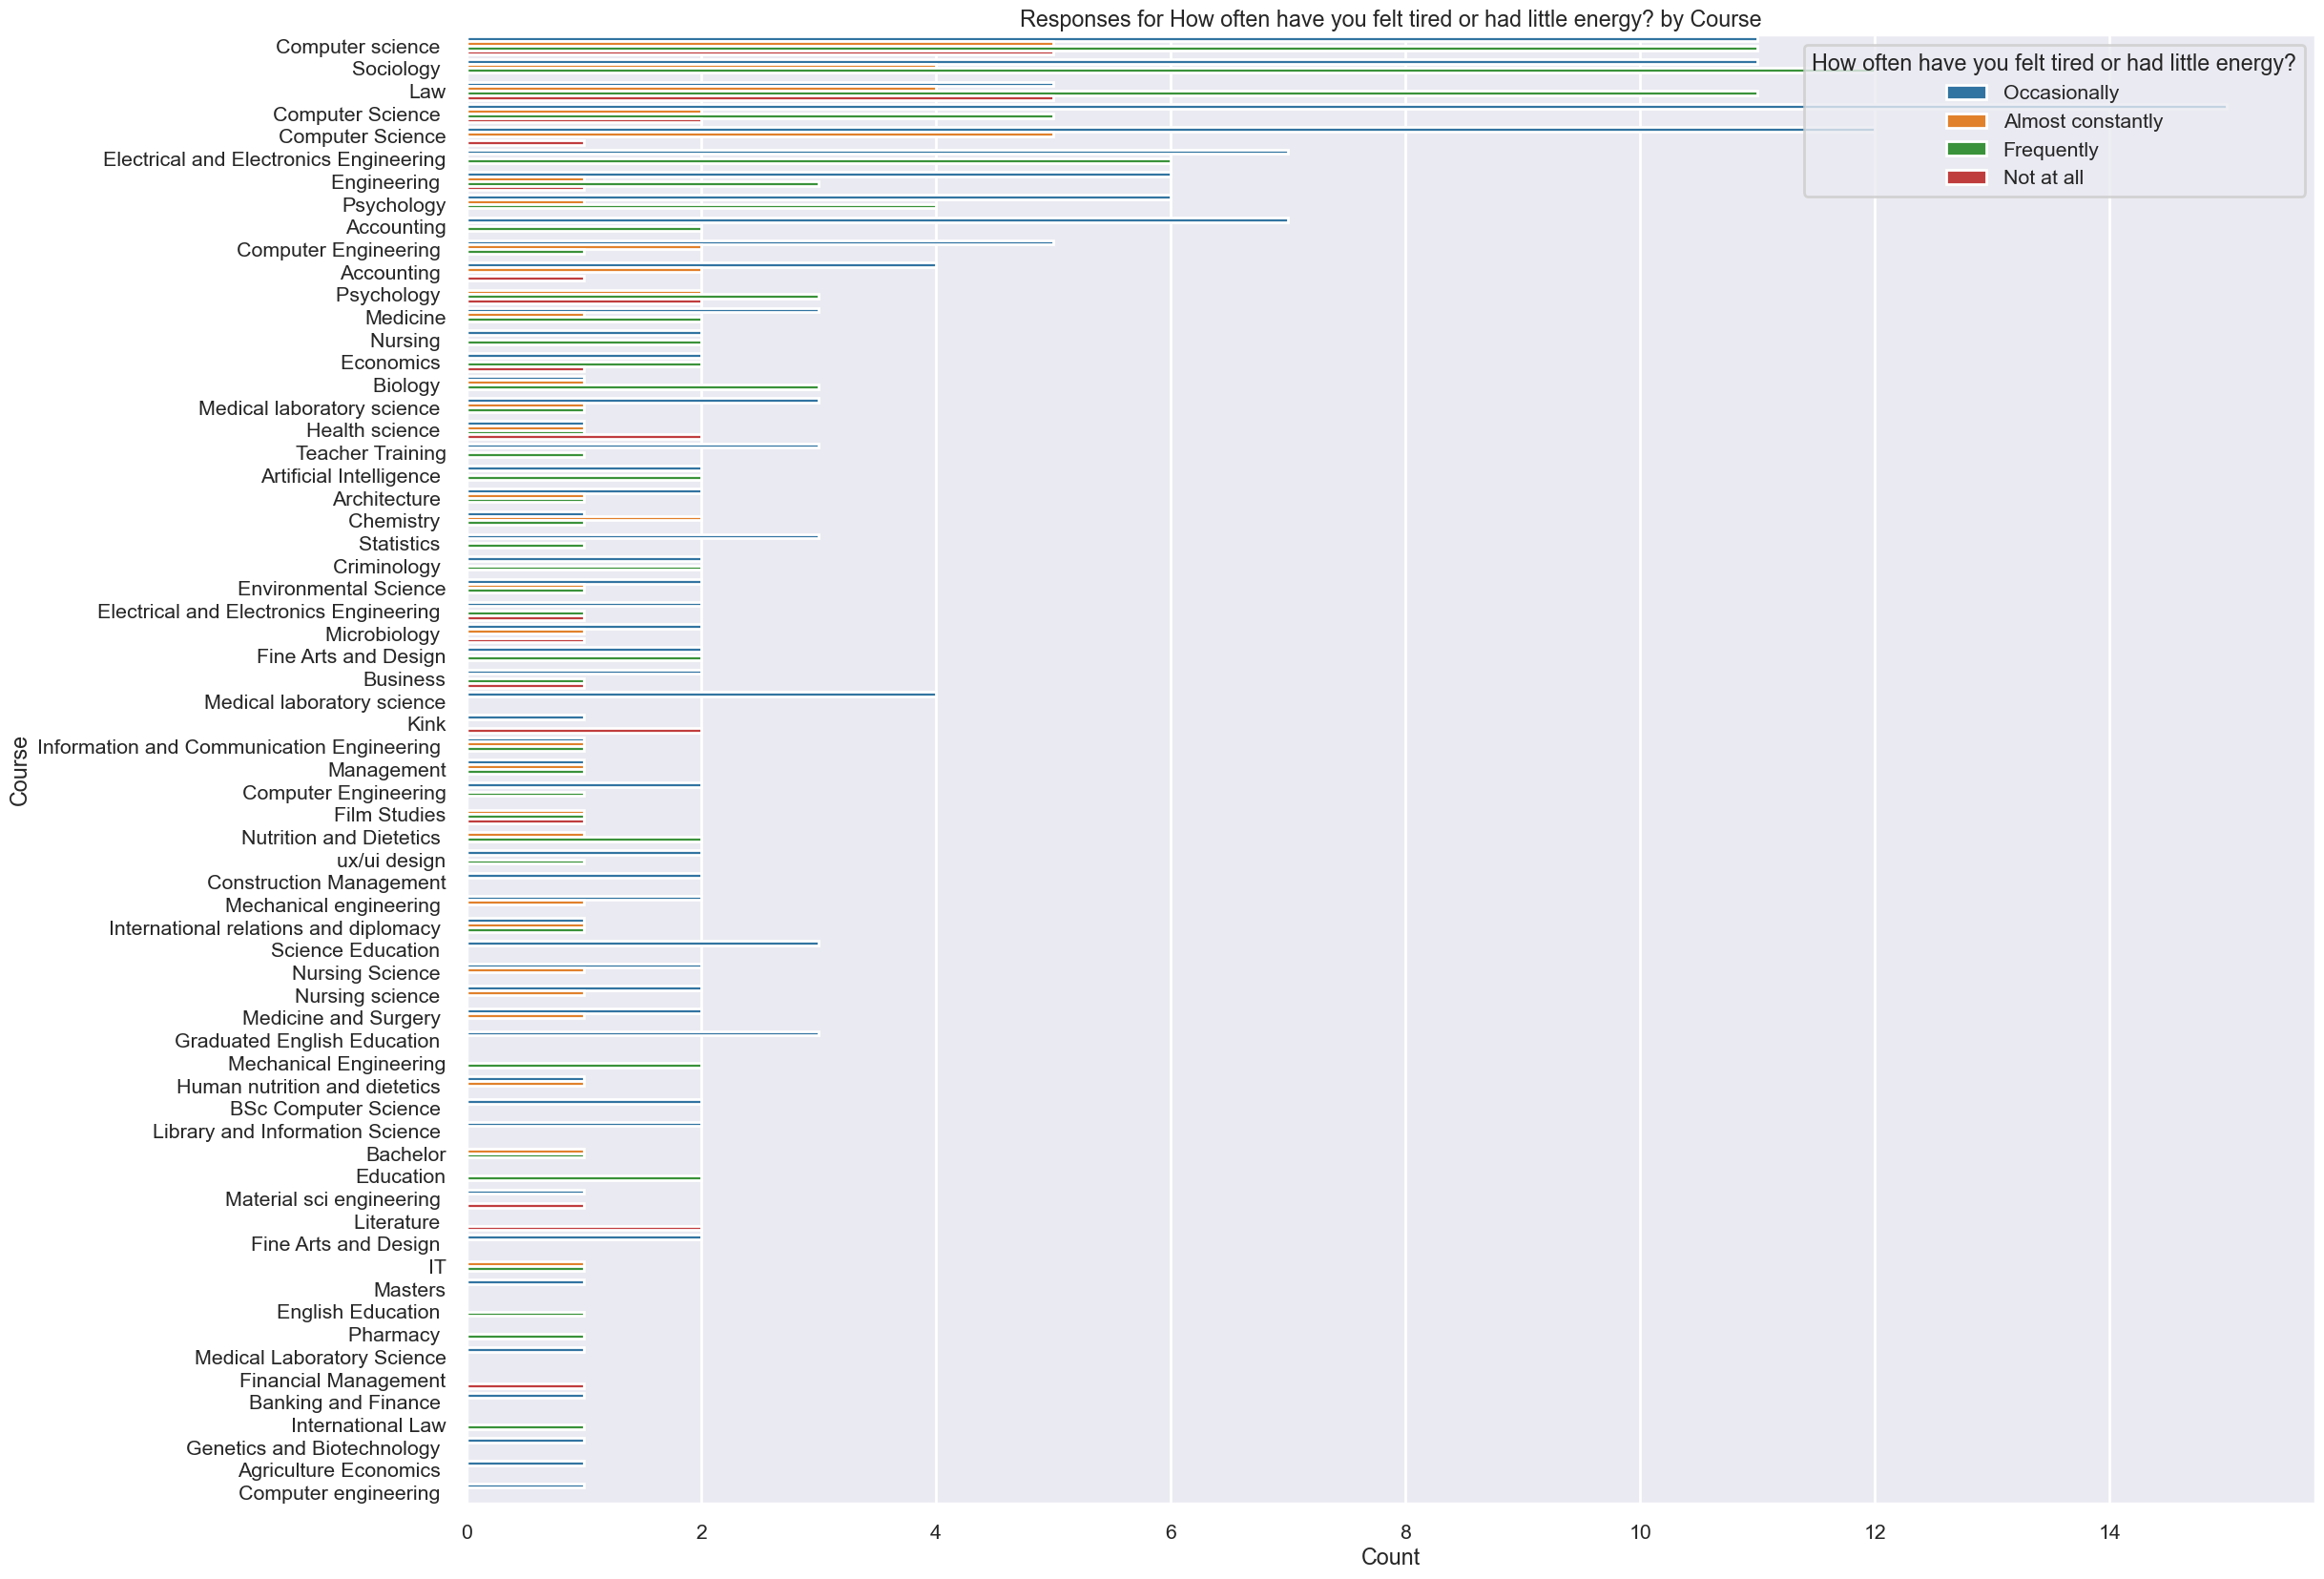

<Figure size 640x480 with 0 Axes>

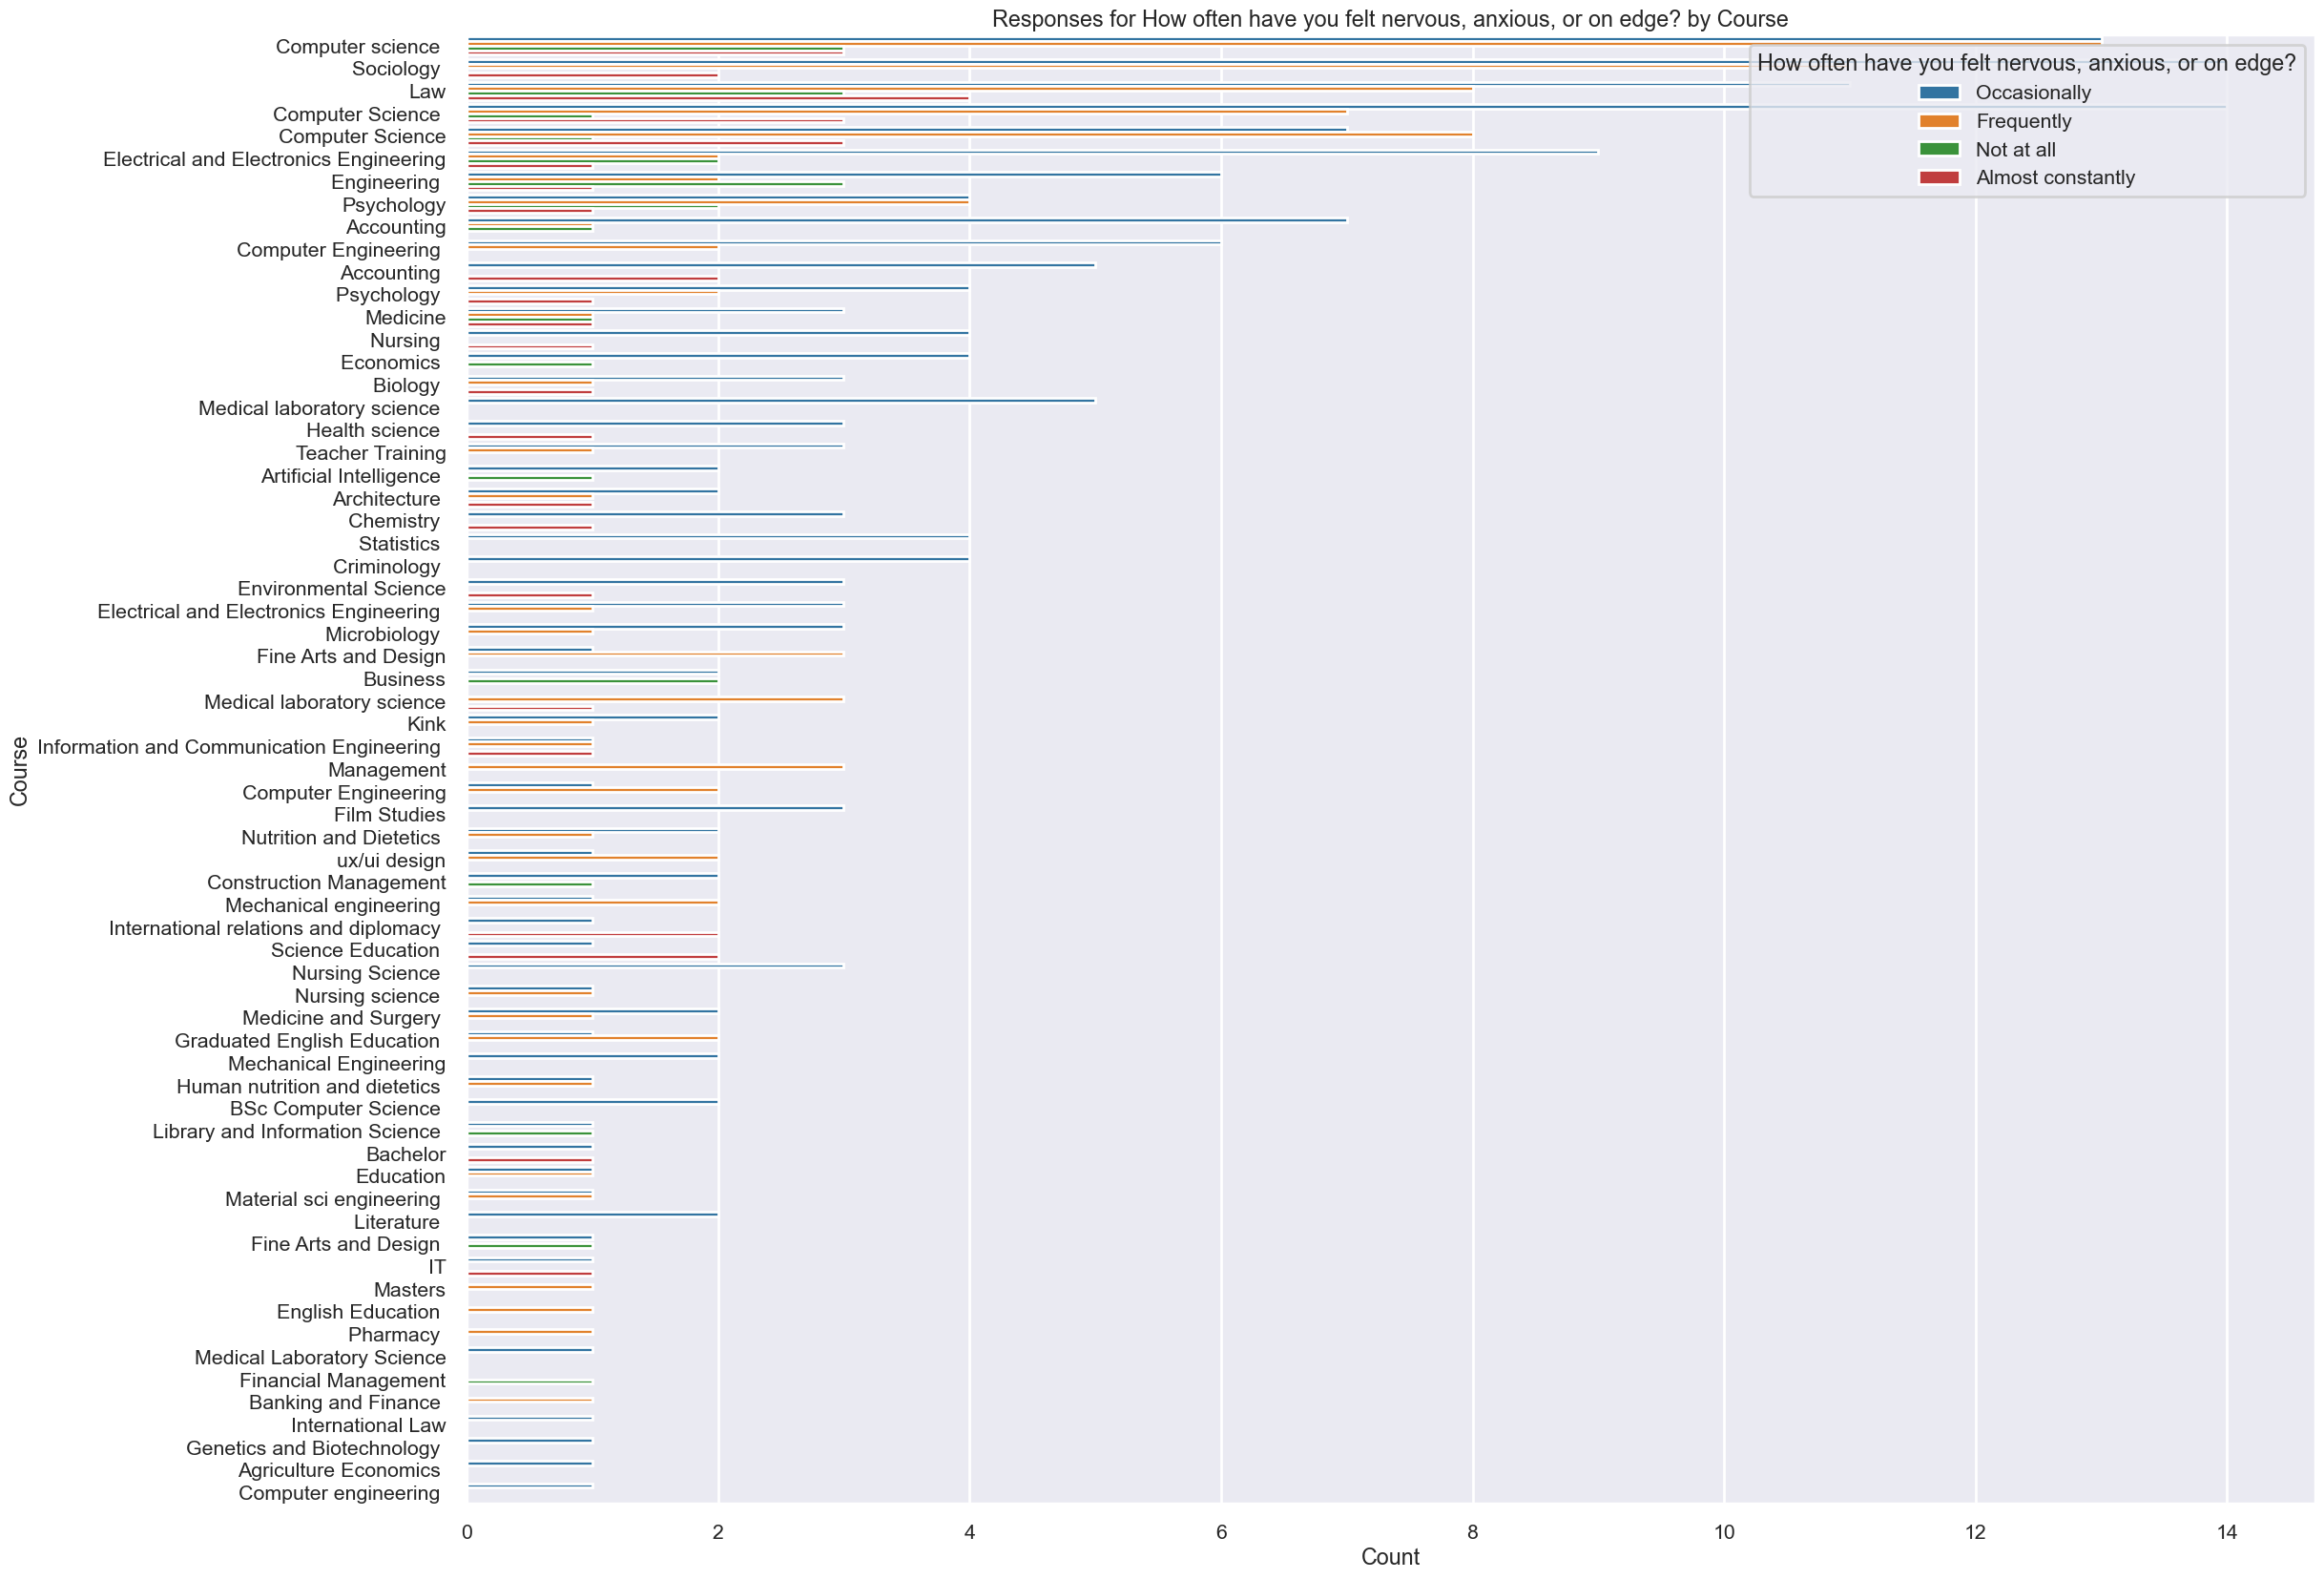

<Figure size 640x480 with 0 Axes>

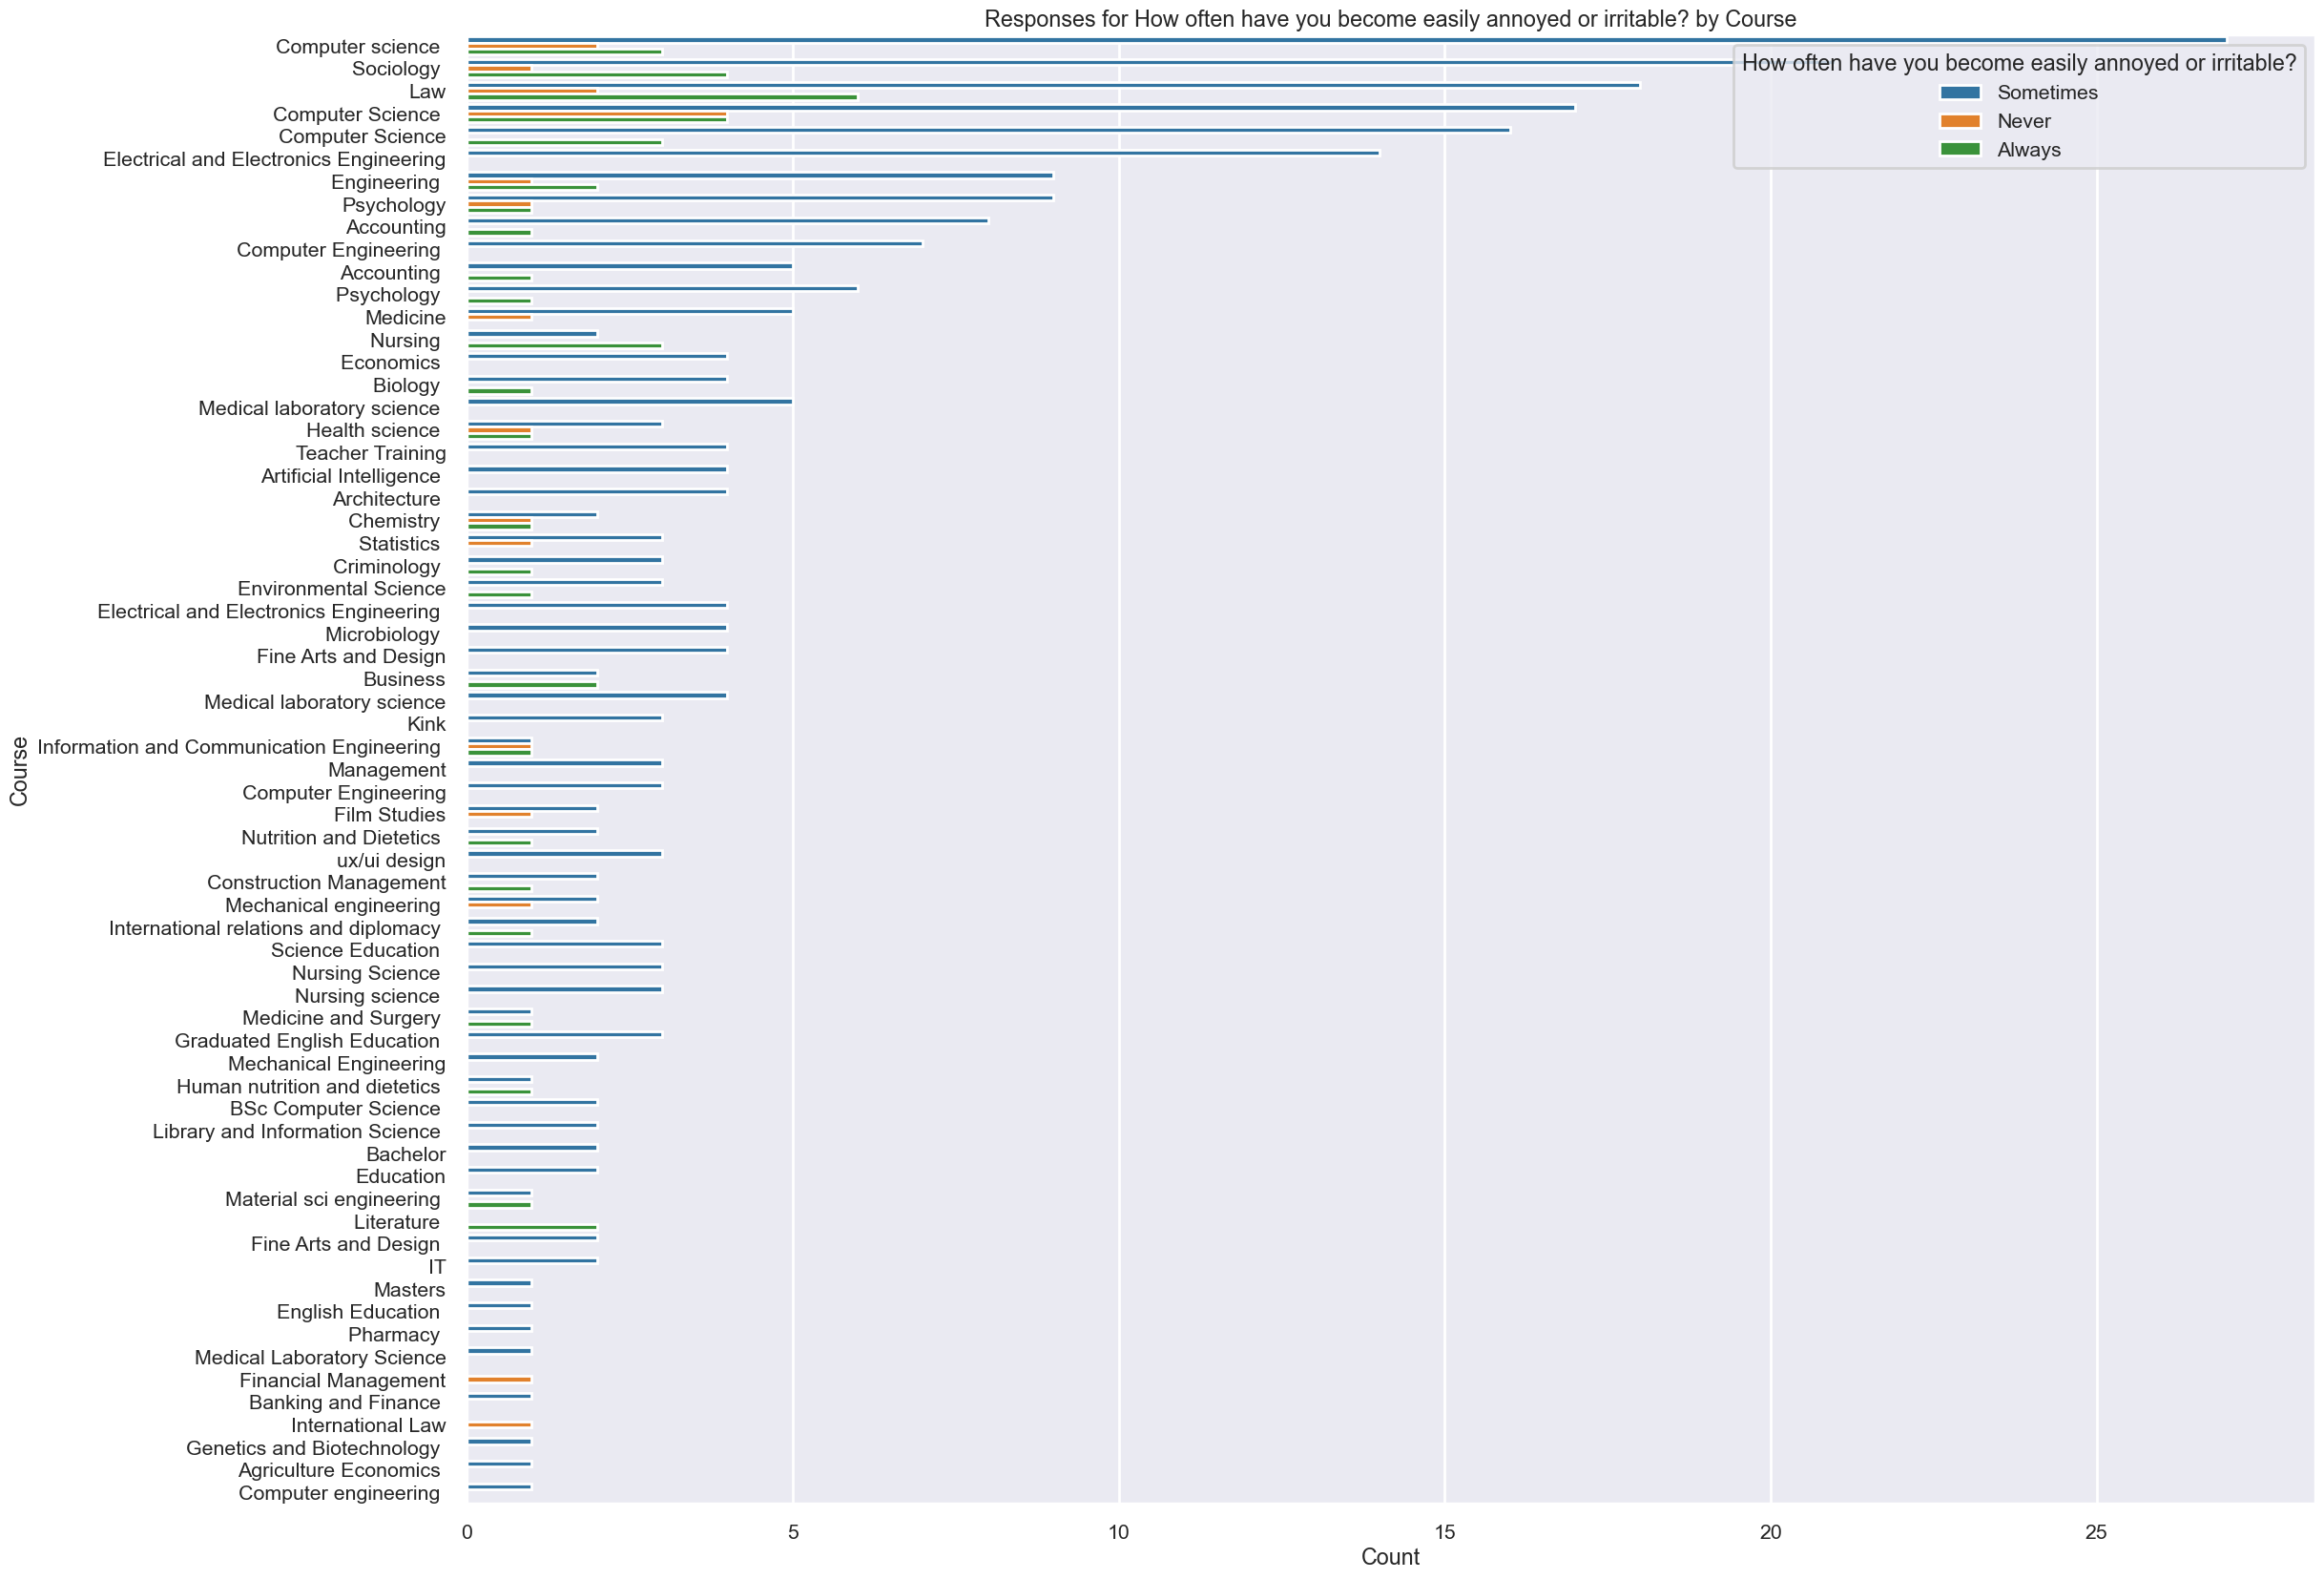

<Figure size 640x480 with 0 Axes>

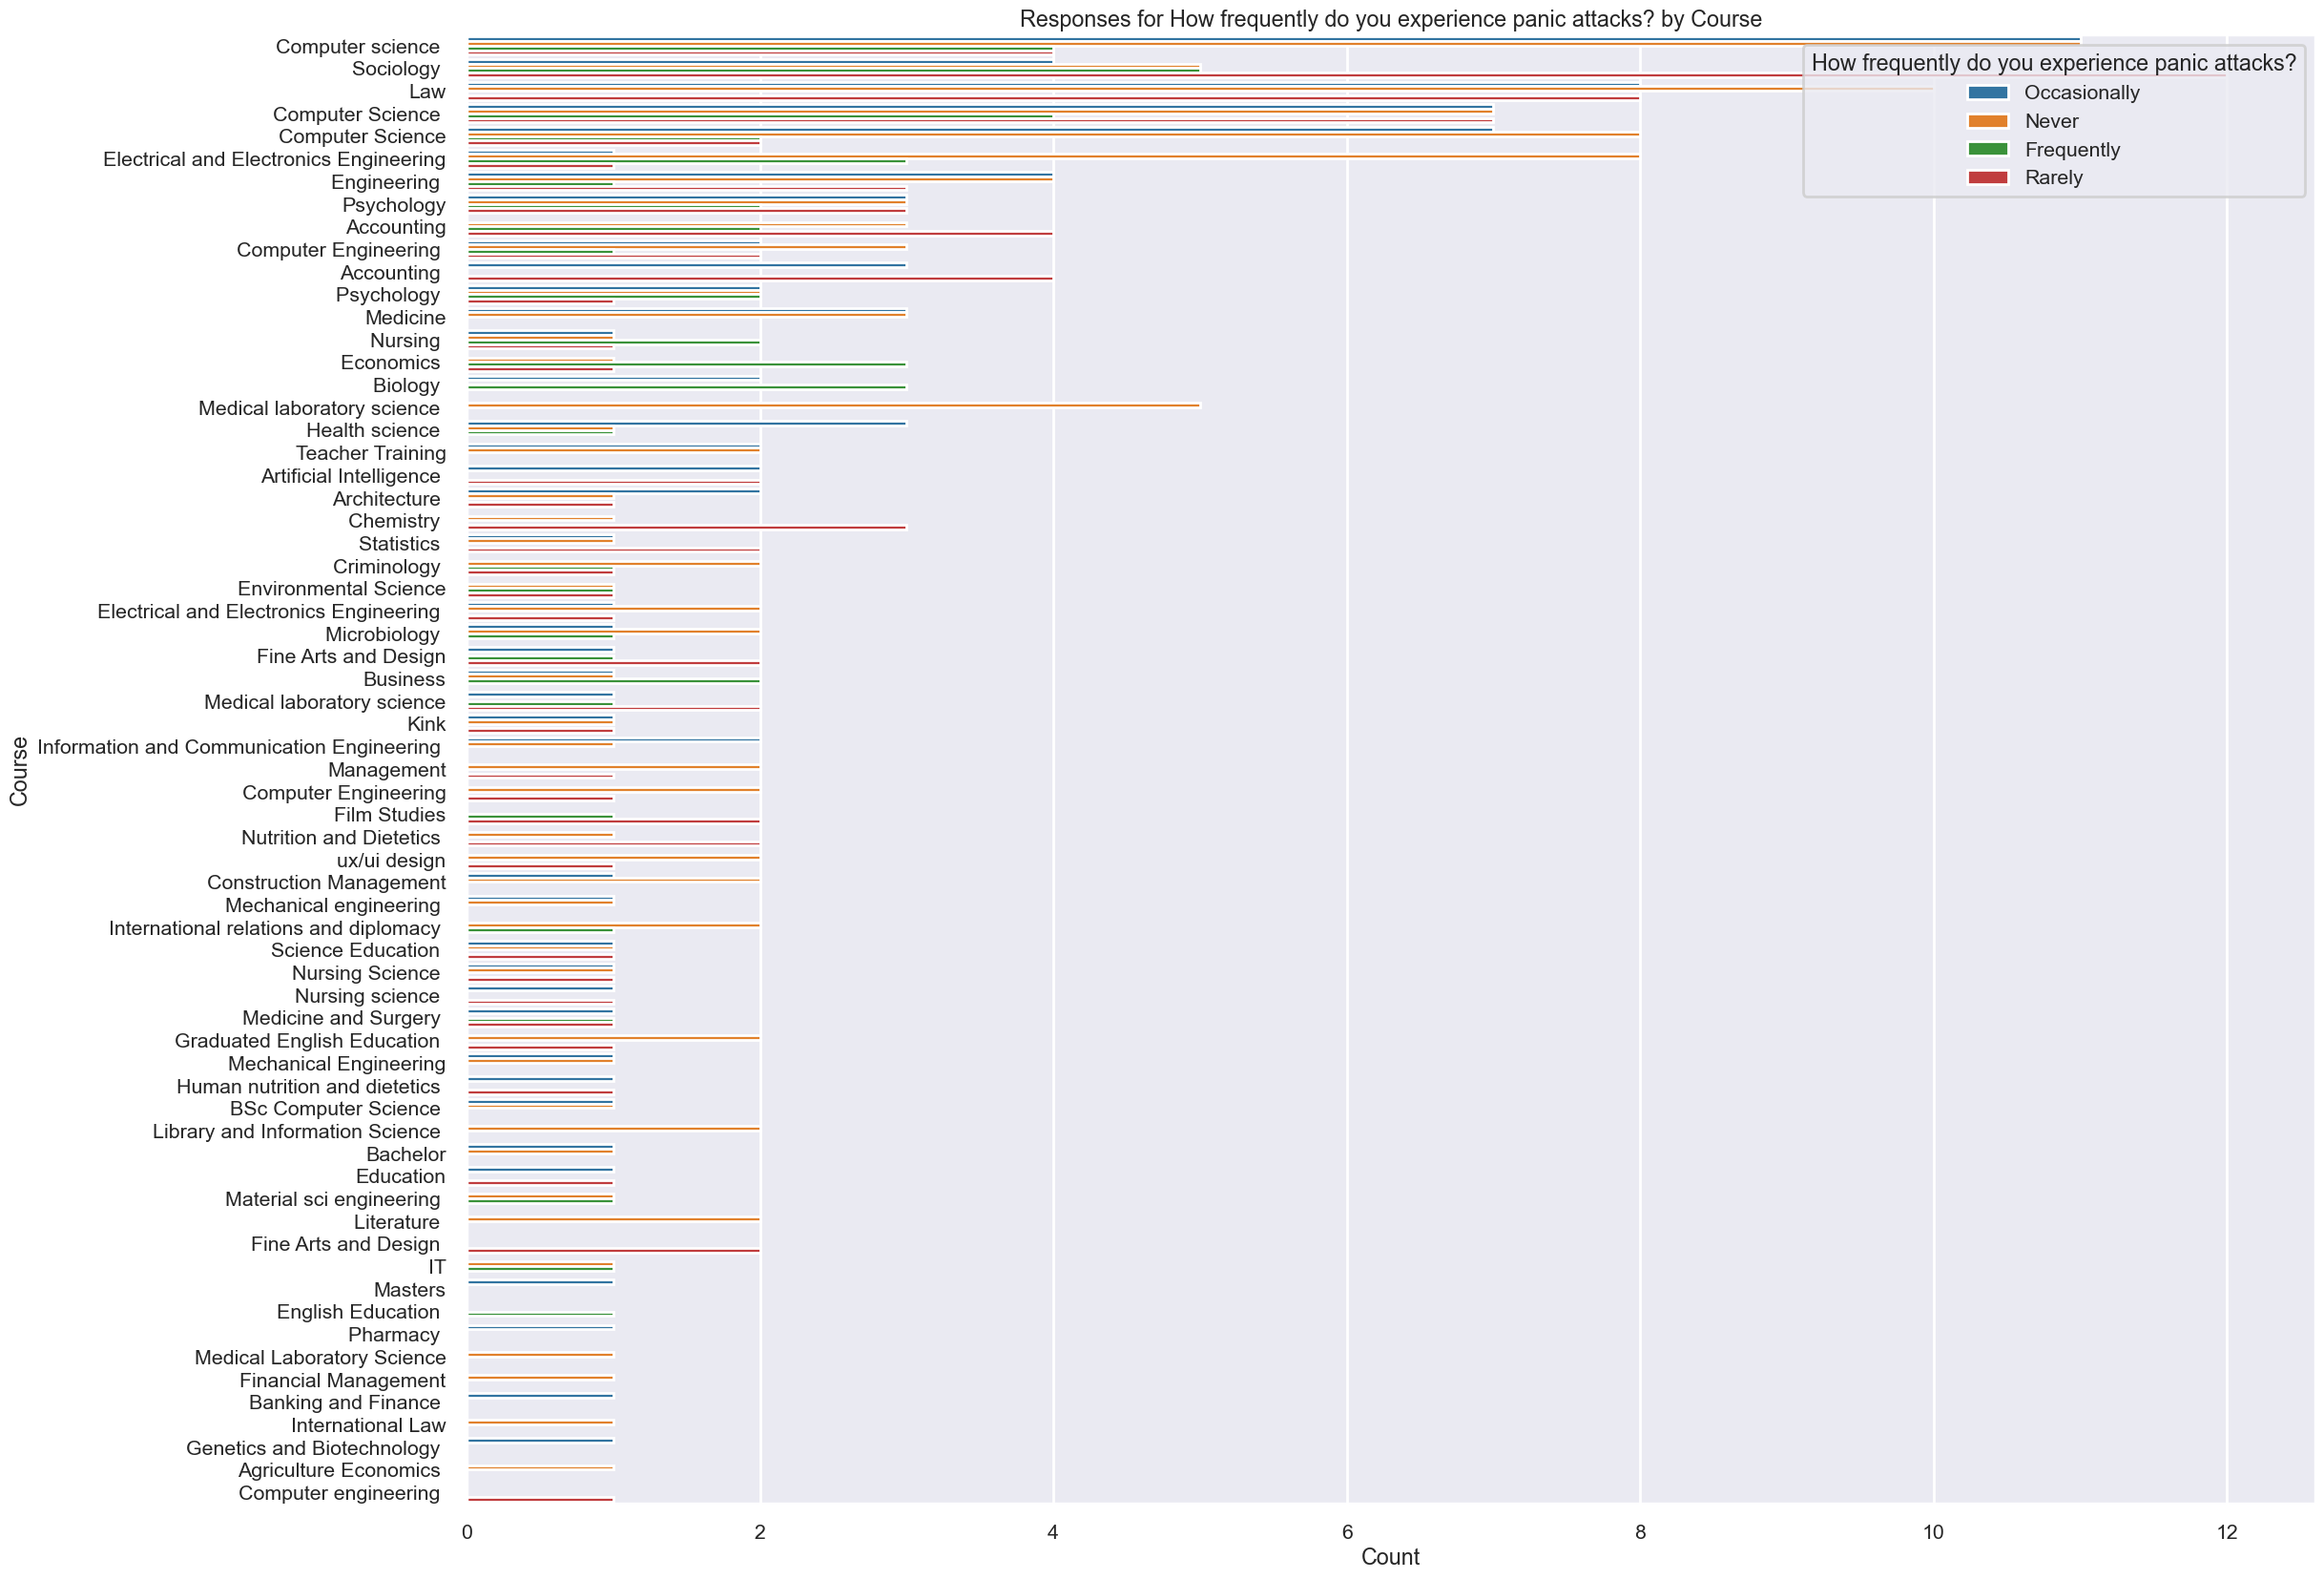

<Figure size 640x480 with 0 Axes>

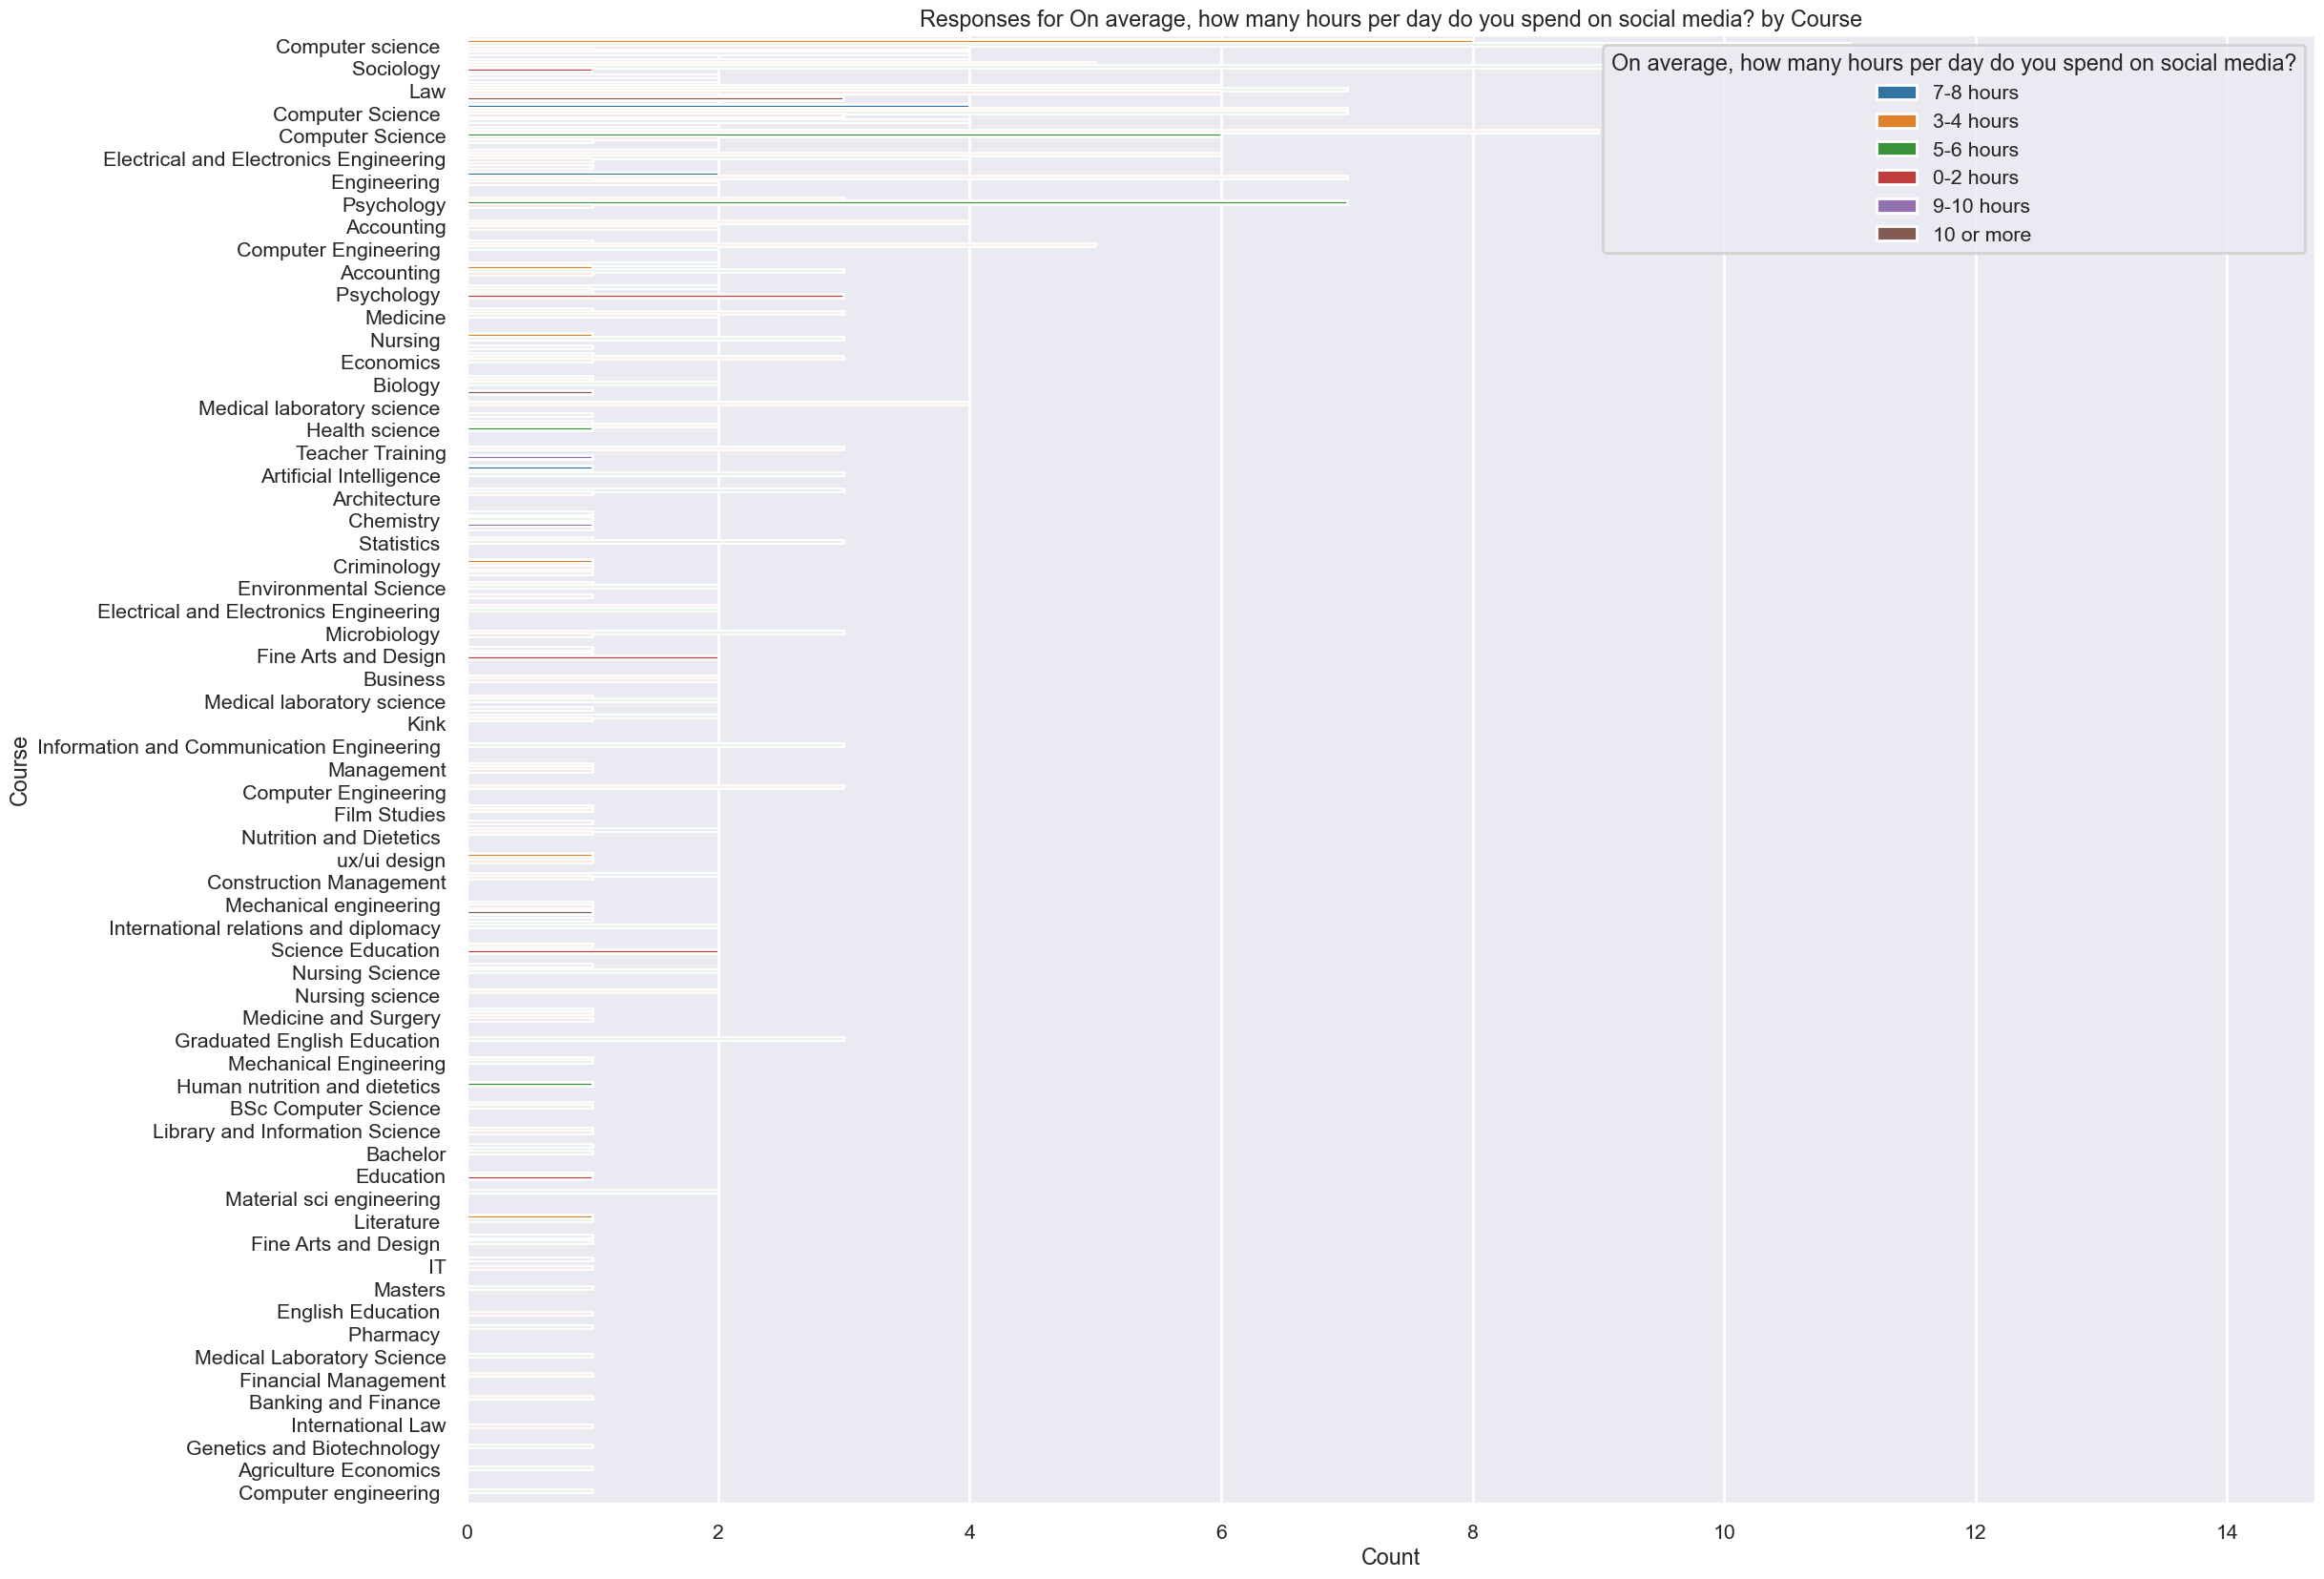

<Figure size 640x480 with 0 Axes>

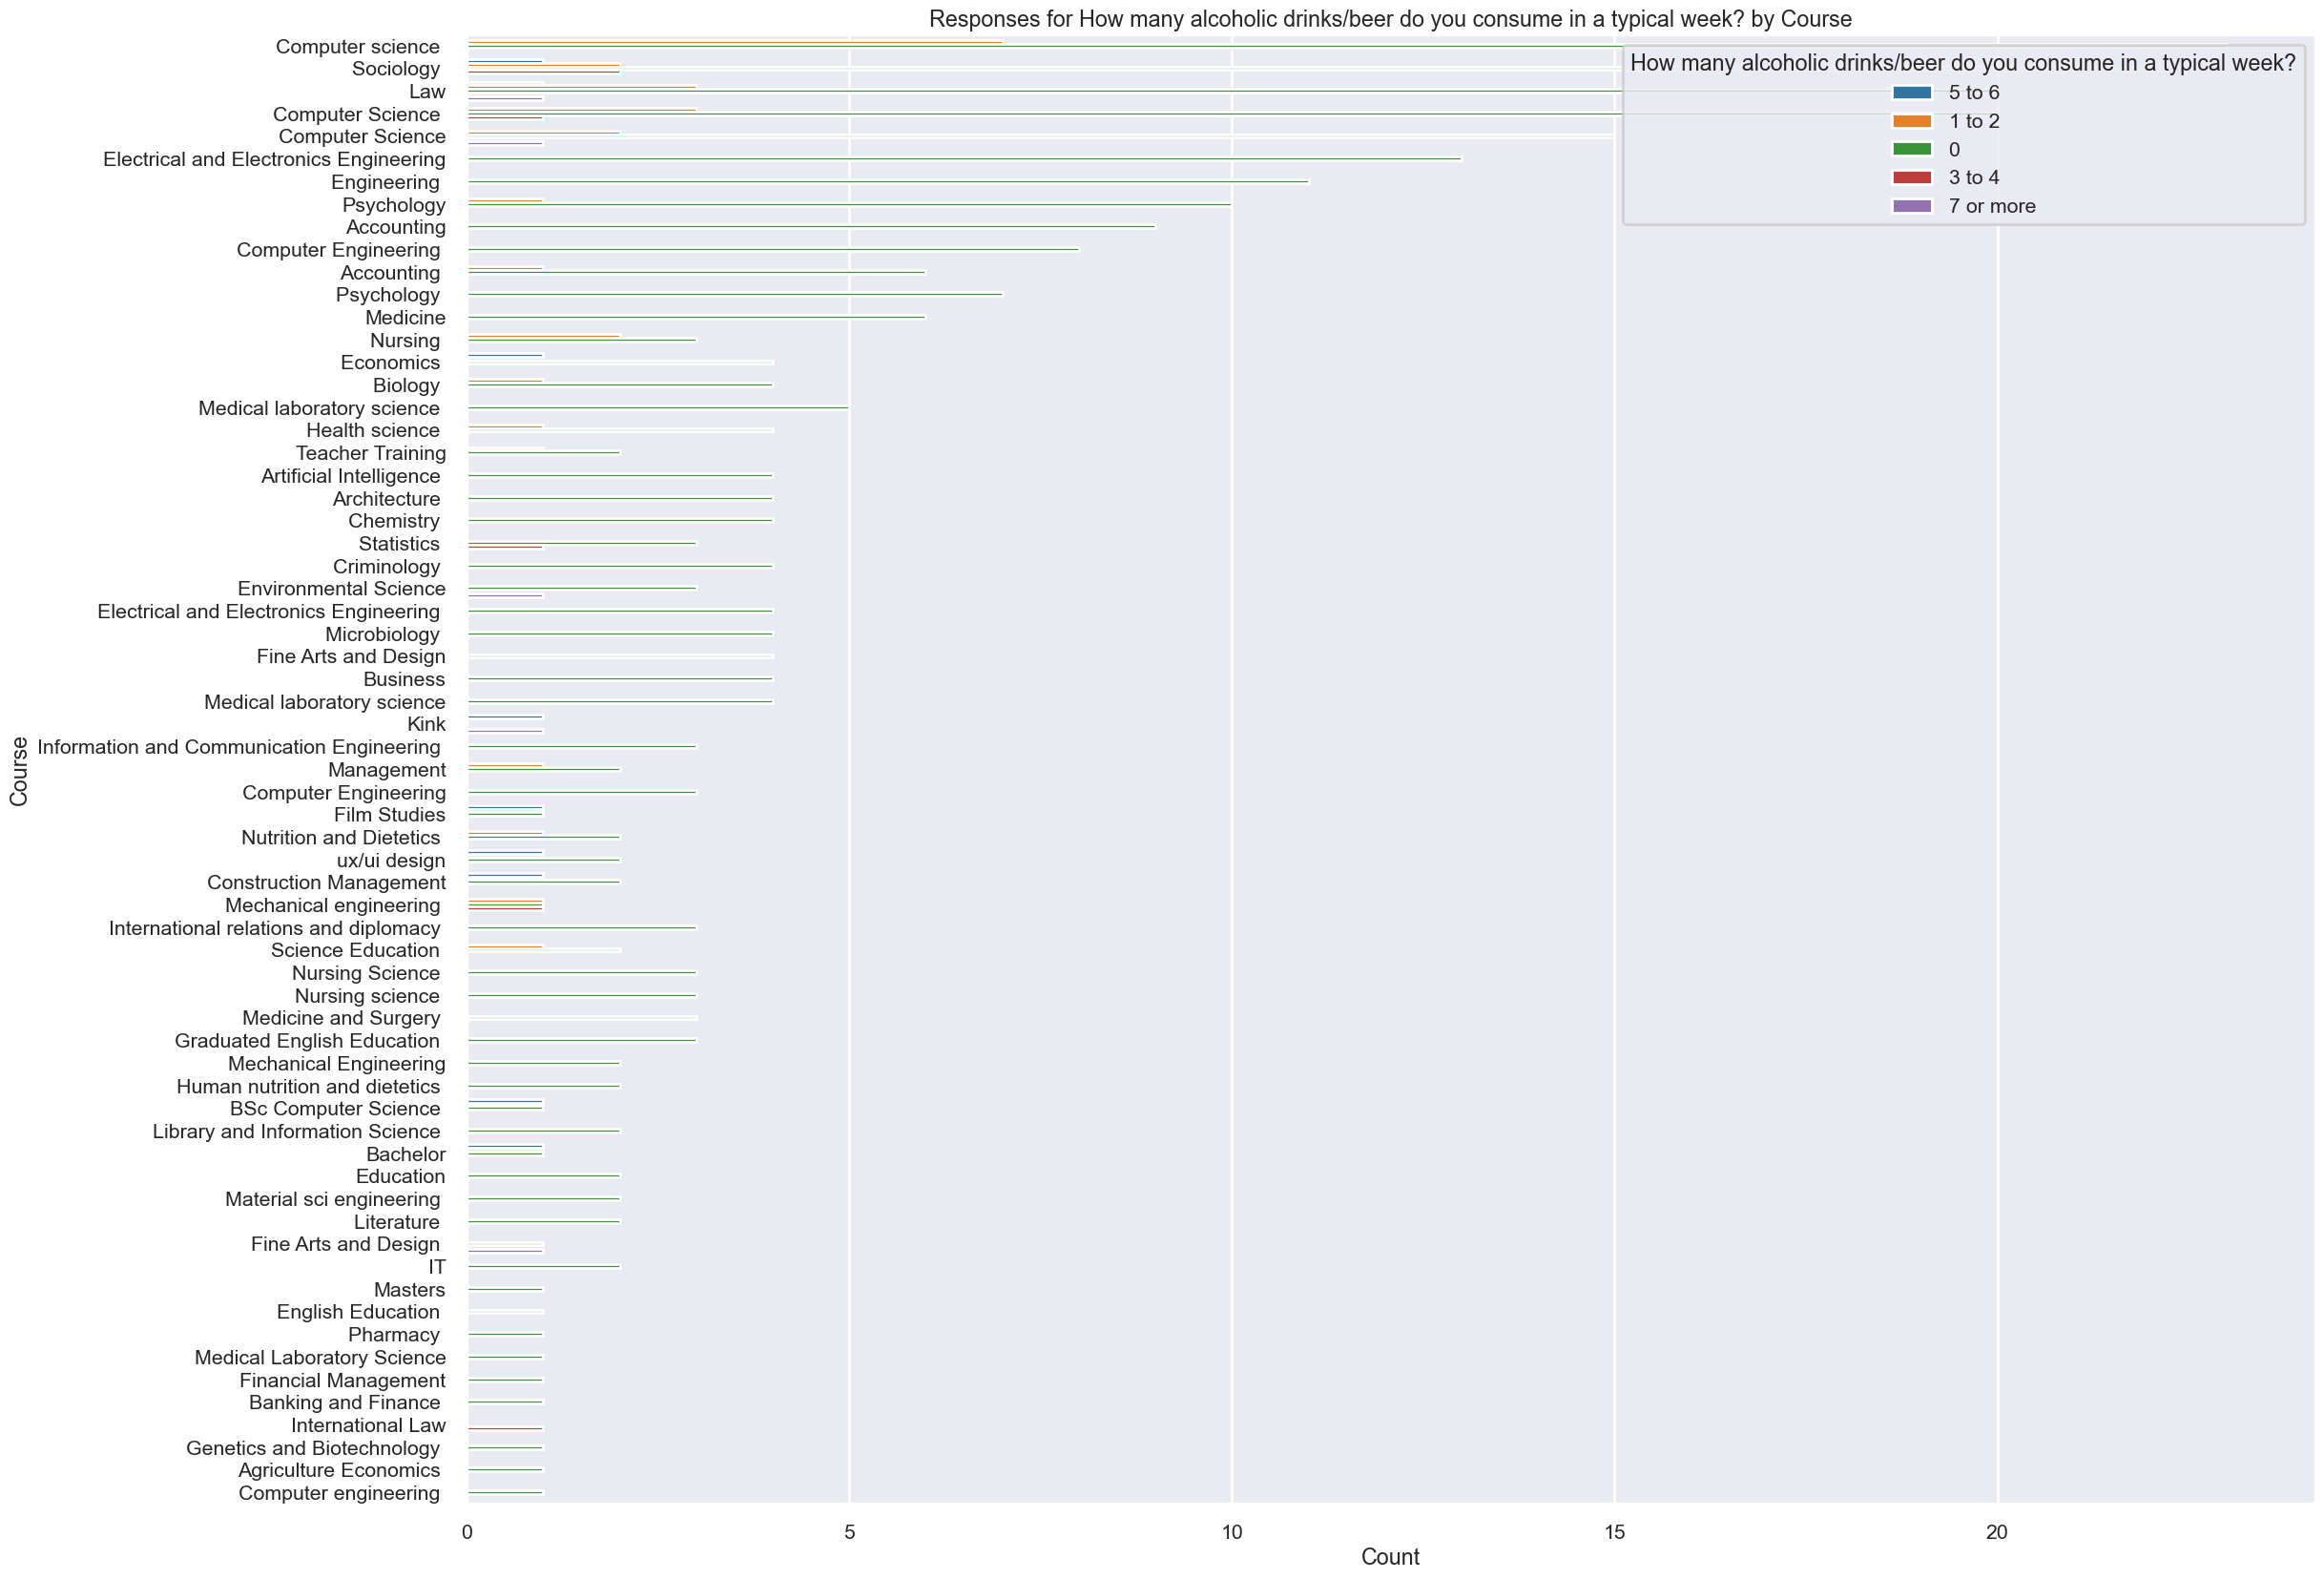

<Figure size 640x480 with 0 Axes>

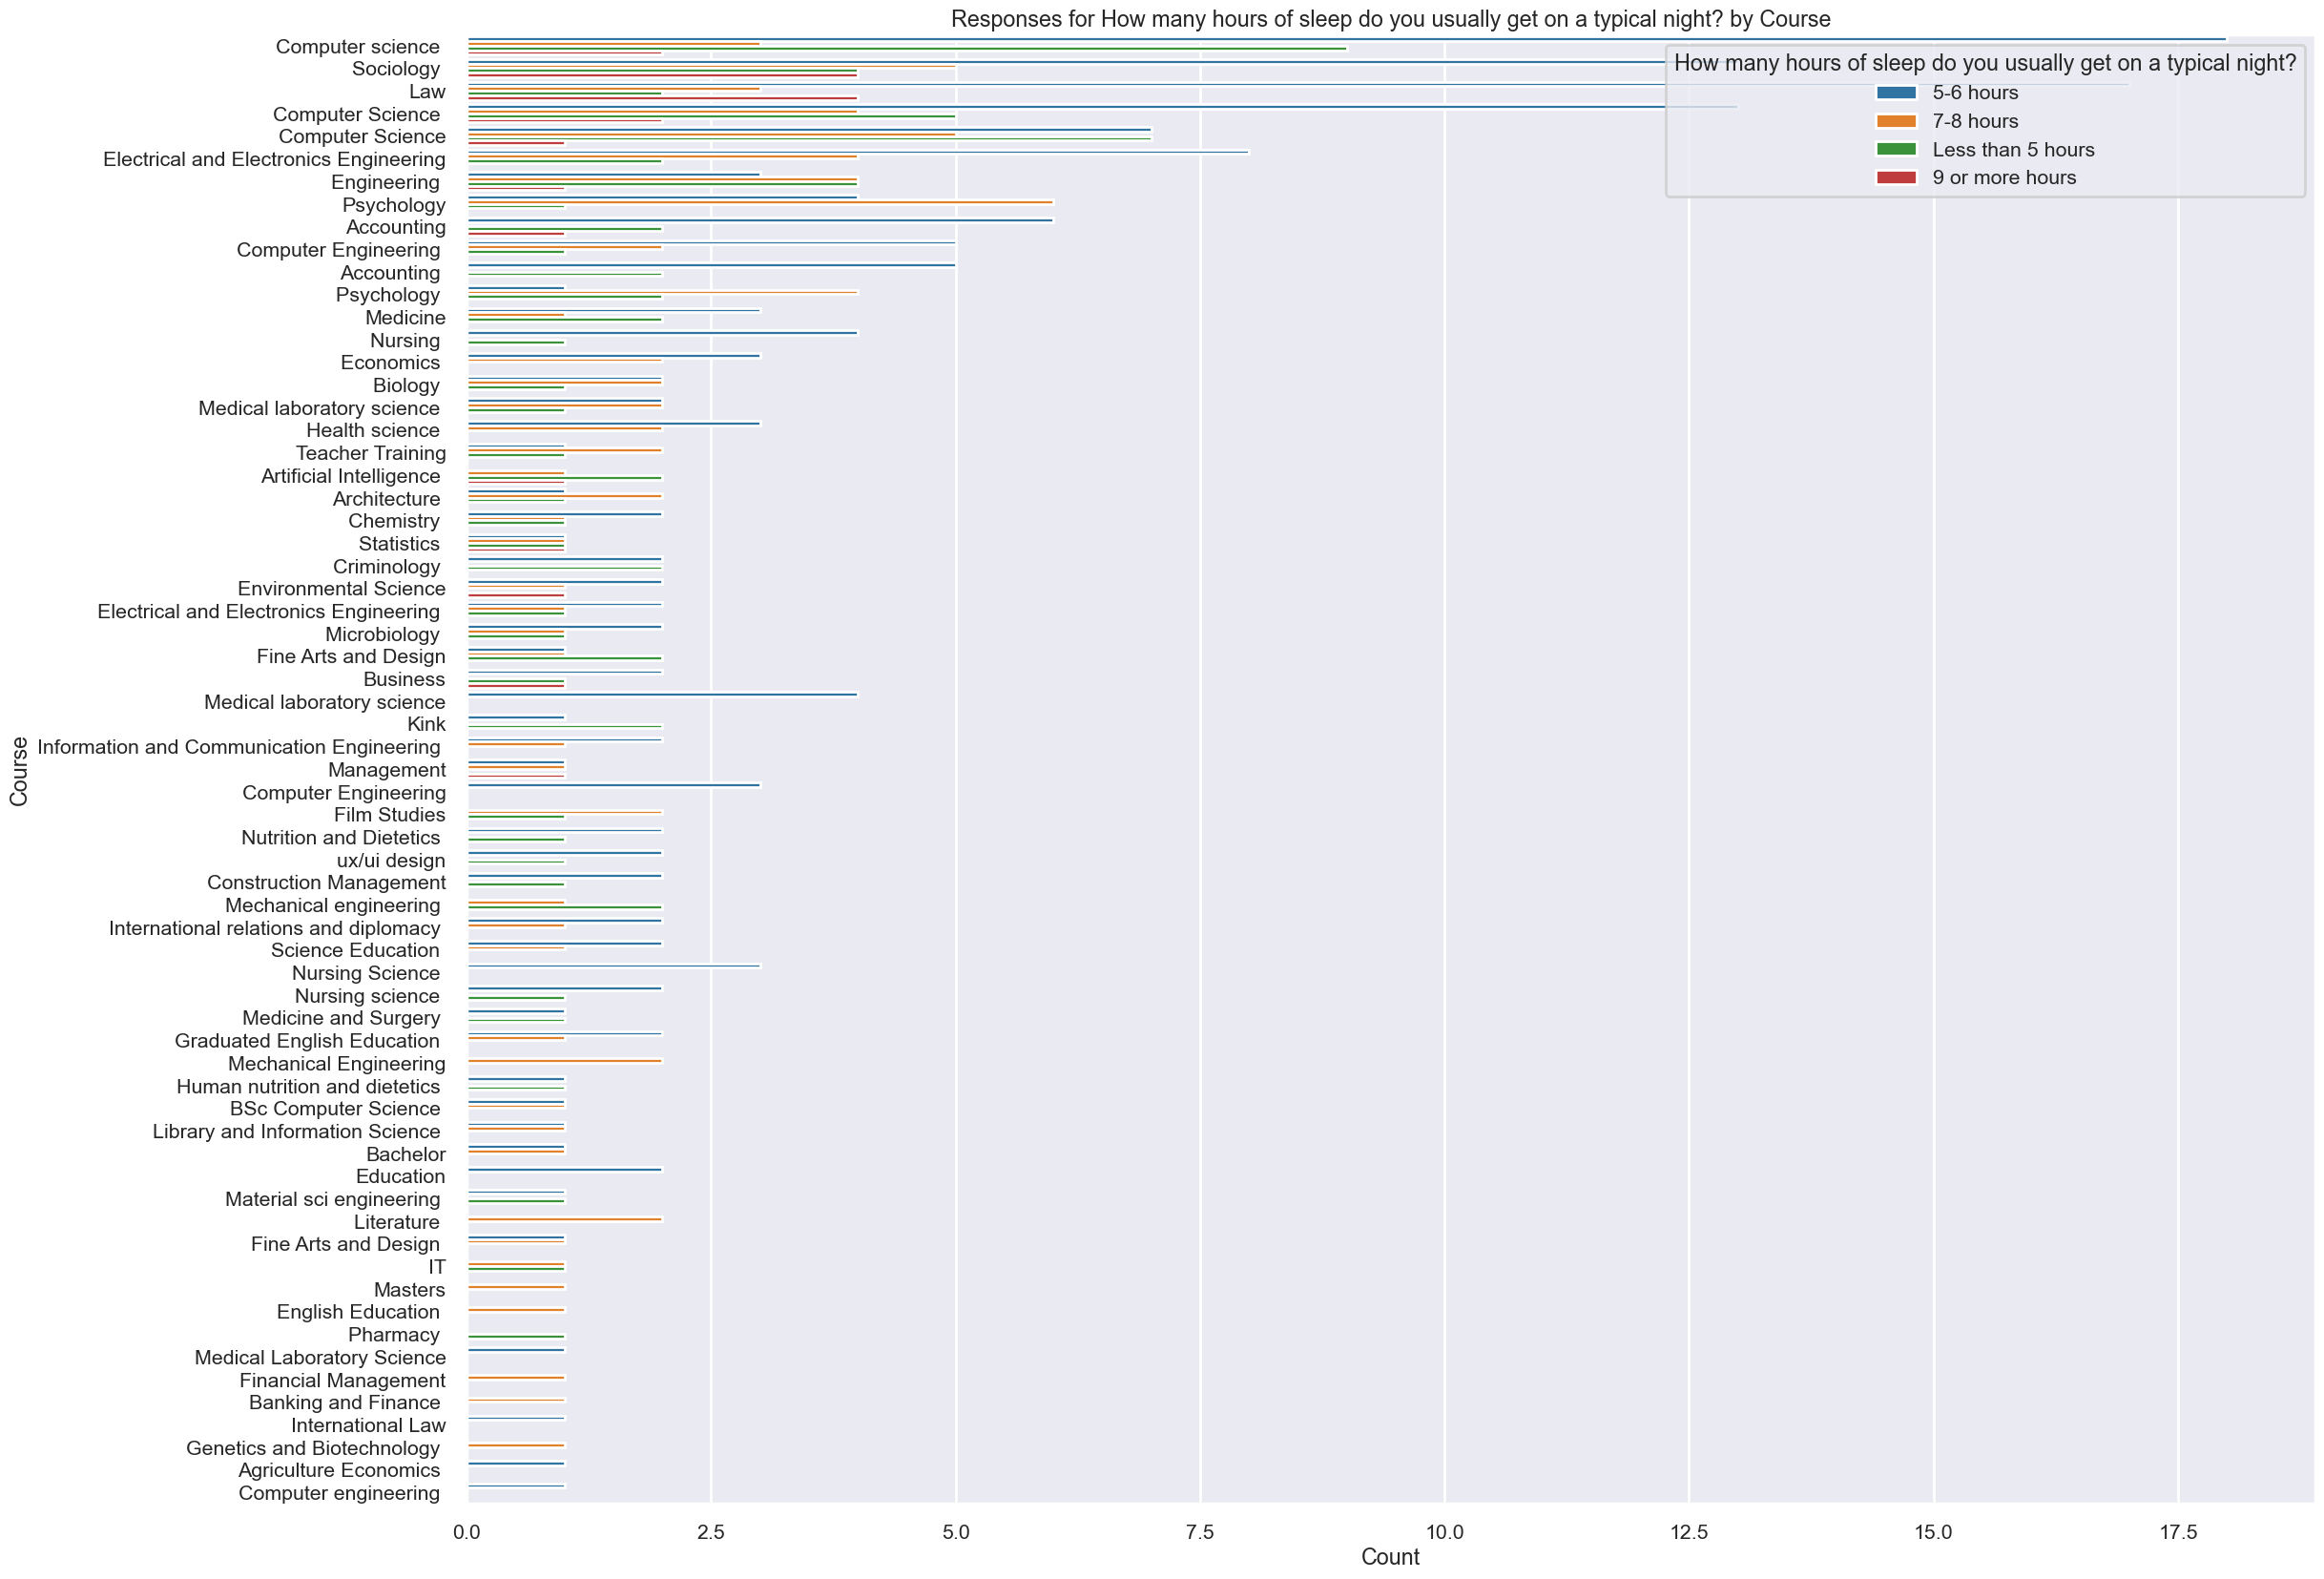

<Figure size 640x480 with 0 Axes>

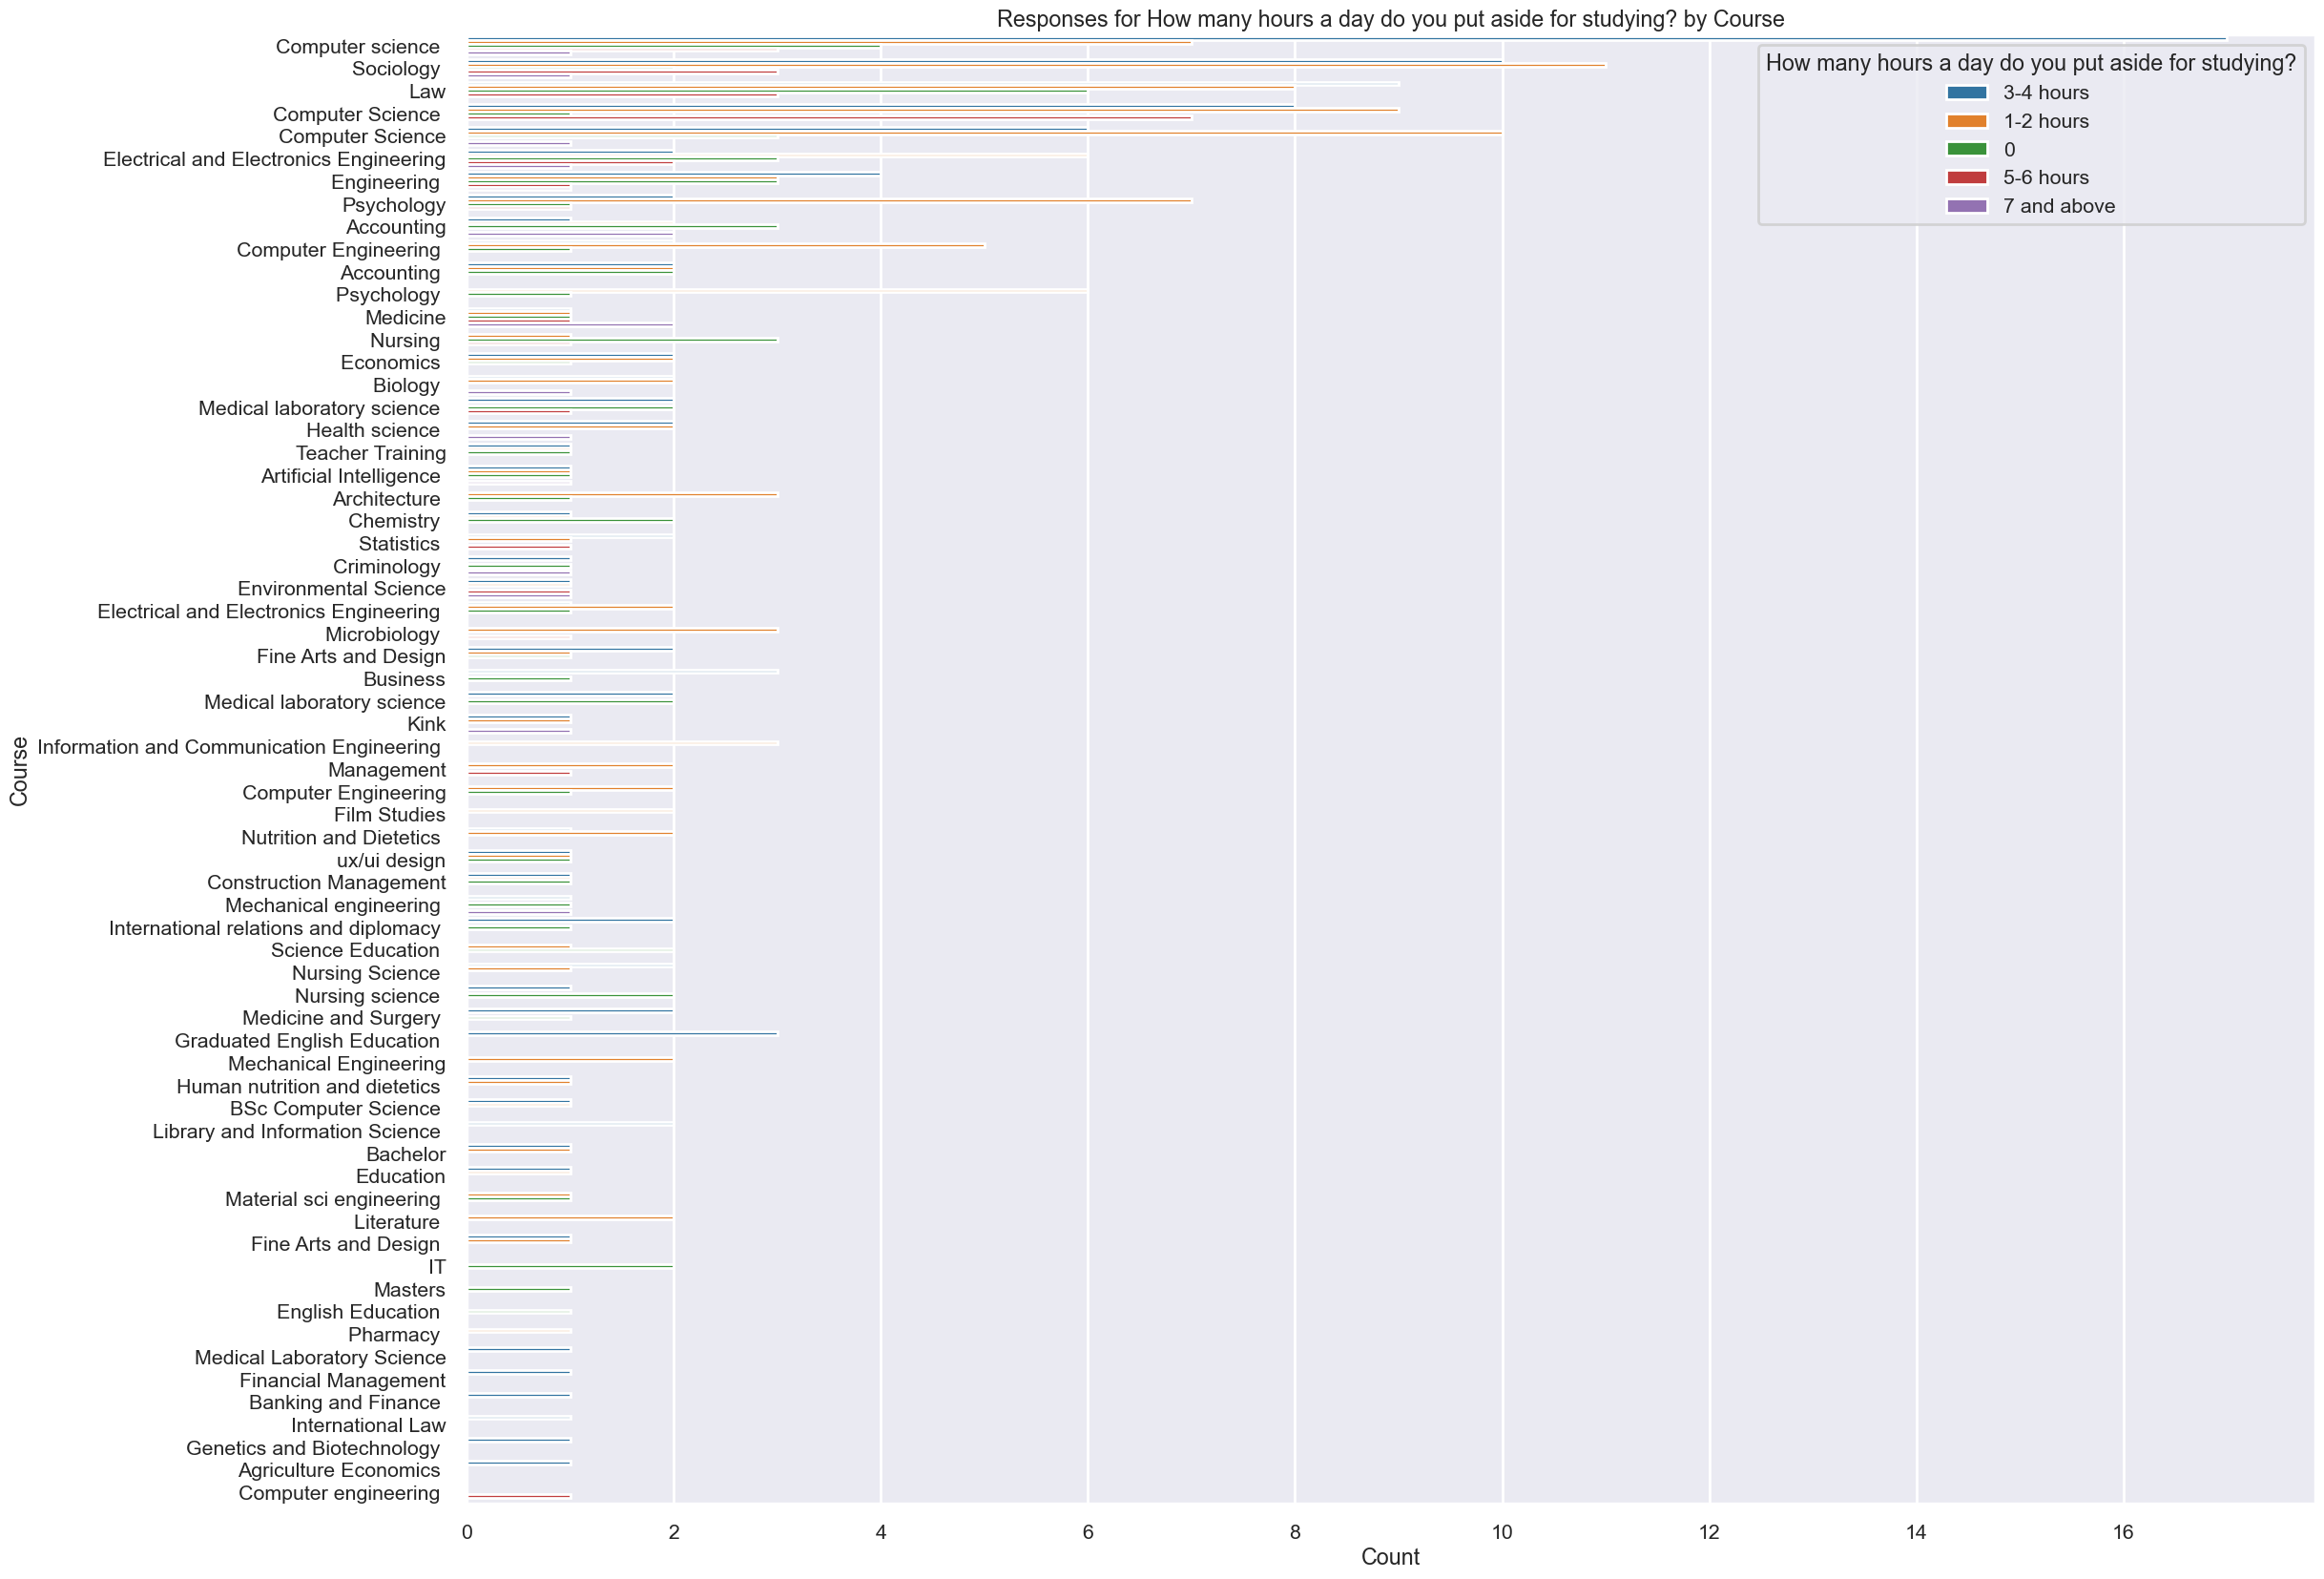

<Figure size 640x480 with 0 Axes>

In [24]:
# Exploring questions in relation to course
for question in questions:
    plt.figure(figsize=(25, 20))
    sns.countplot(y='Course', hue=question, data=student_data, order=student_data['Course'].value_counts().index)
    plt.title(f'Responses for {question} by Course')
    plt.xlabel('Count')
    plt.ylabel('Course')
    plt.legend(title=question)
    plt.show()
    # Sanitize the filename by removing invalid characters
    sanitized_question = re.sub(r'[^\w\s]', '', question)
    # Save the figure to a file
    plt.savefig(f"responses_for_{sanitized_question}_by_course.png")
    # Clear the current figure to avoid saving an empty figure
    plt.clf()



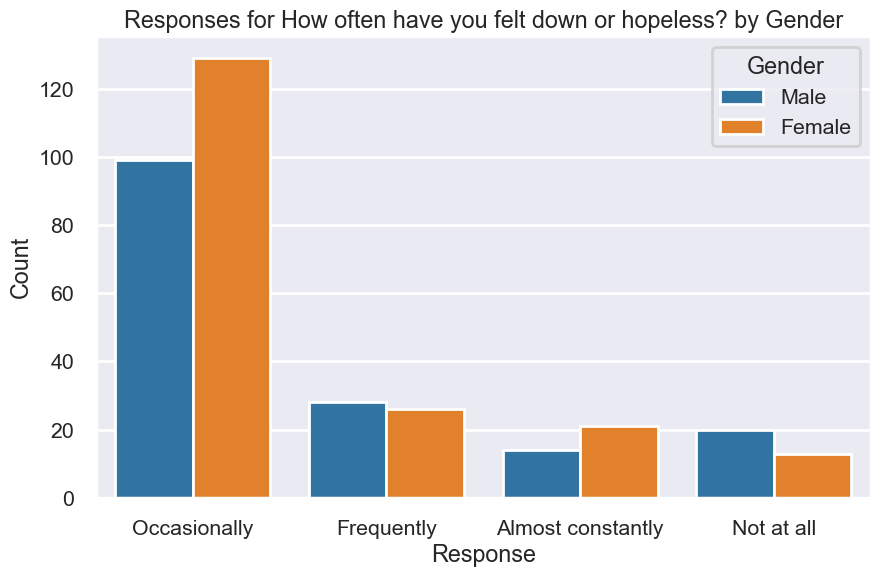

<Figure size 640x480 with 0 Axes>

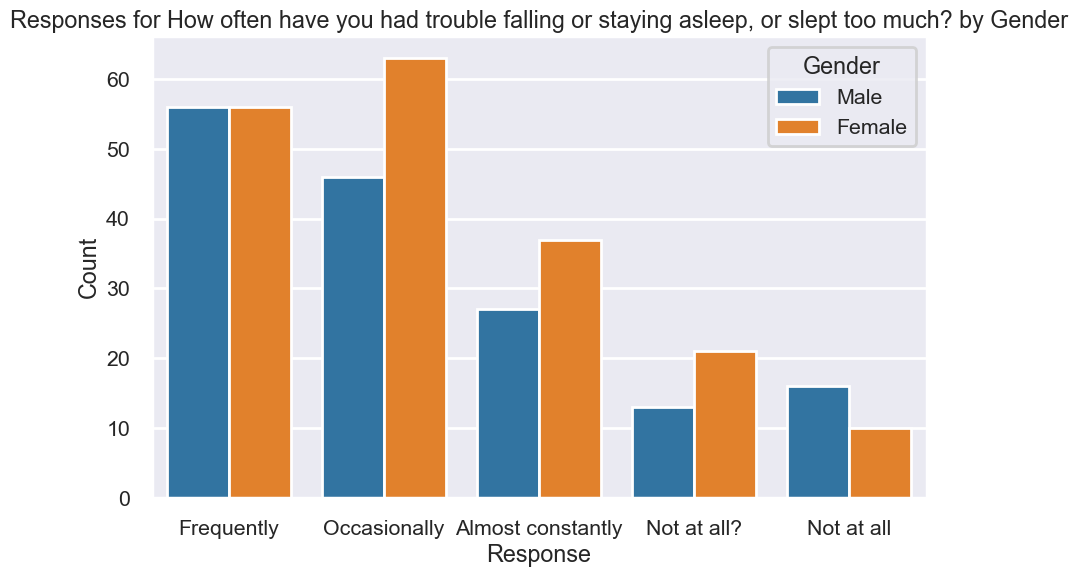

<Figure size 640x480 with 0 Axes>

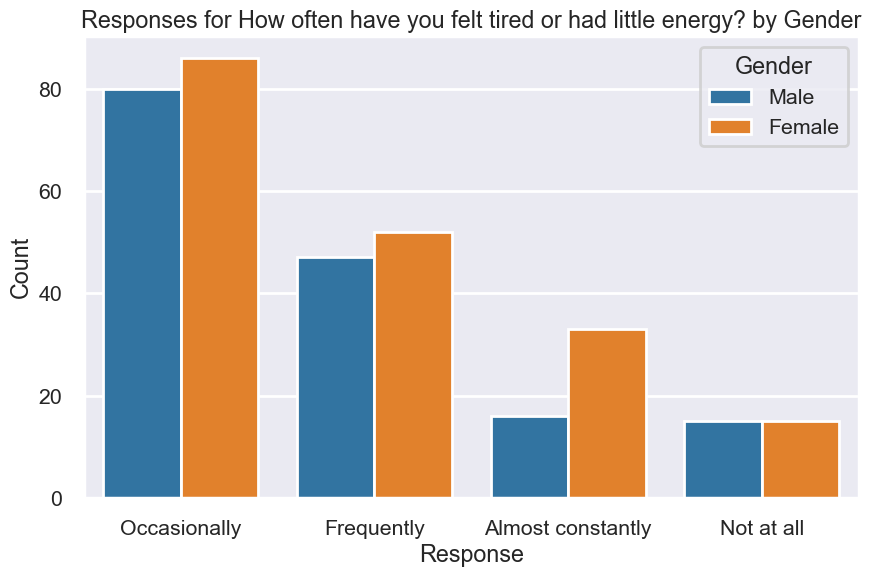

<Figure size 640x480 with 0 Axes>

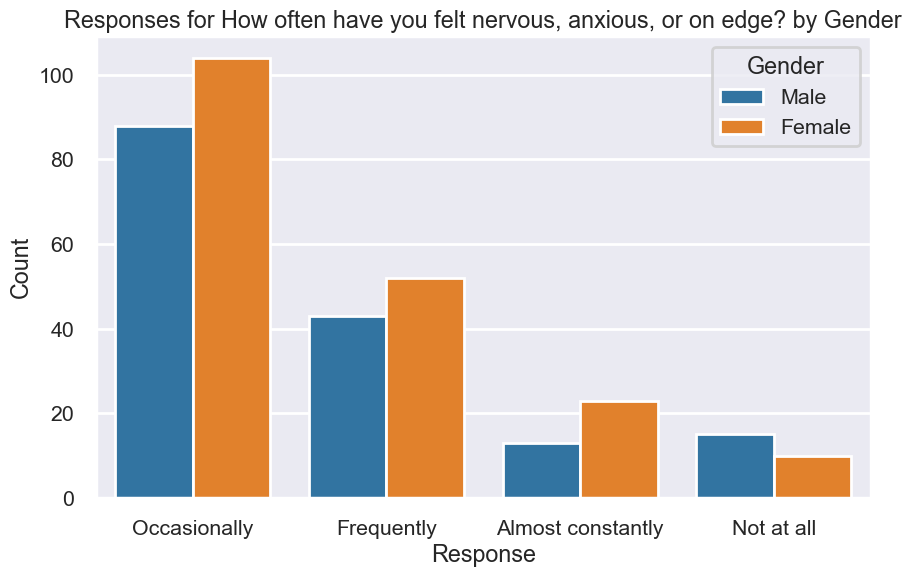

<Figure size 640x480 with 0 Axes>

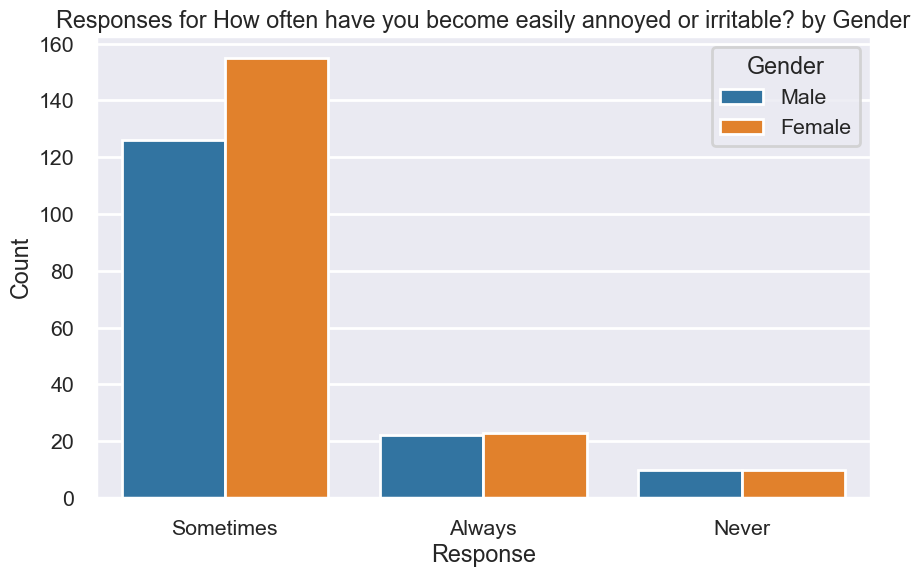

<Figure size 640x480 with 0 Axes>

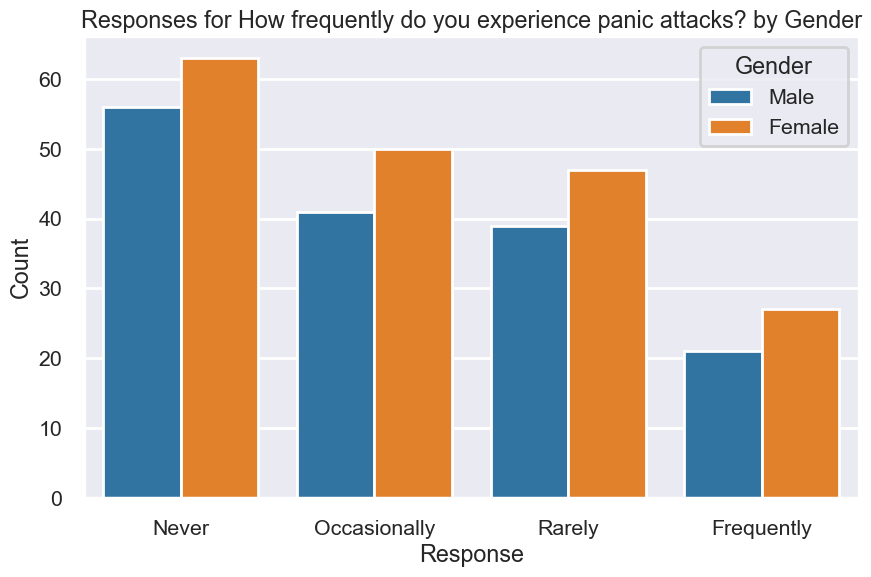

<Figure size 640x480 with 0 Axes>

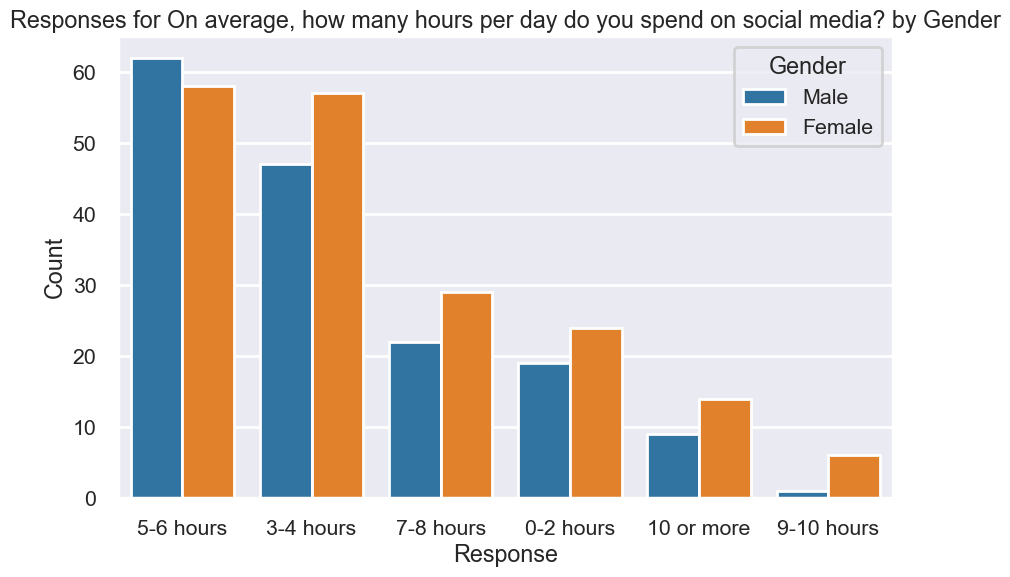

<Figure size 640x480 with 0 Axes>

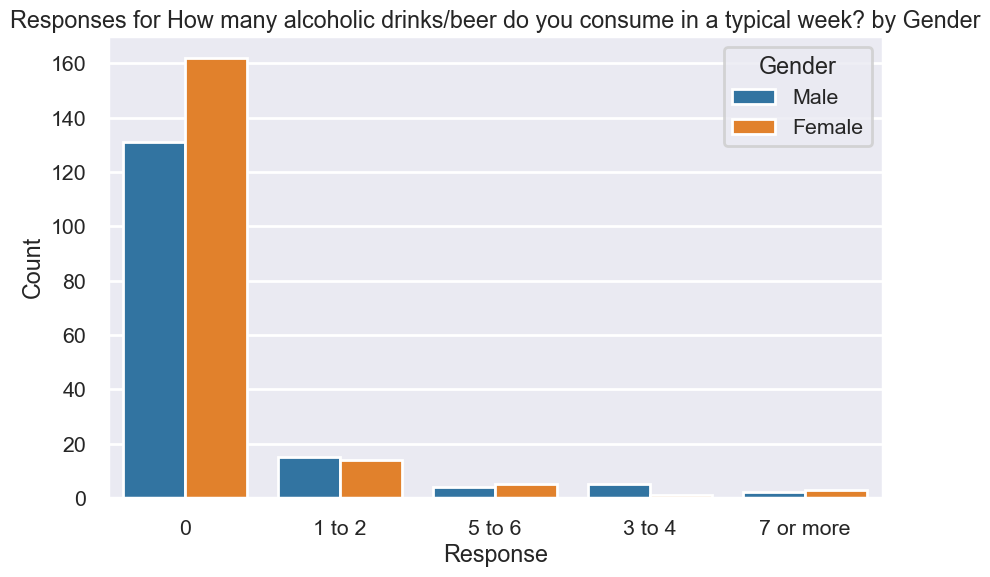

<Figure size 640x480 with 0 Axes>

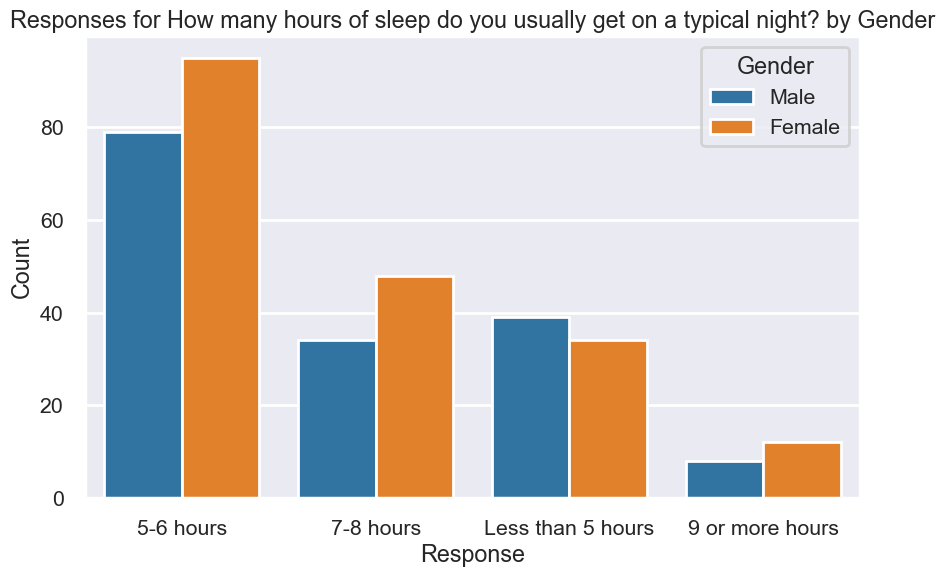

<Figure size 640x480 with 0 Axes>

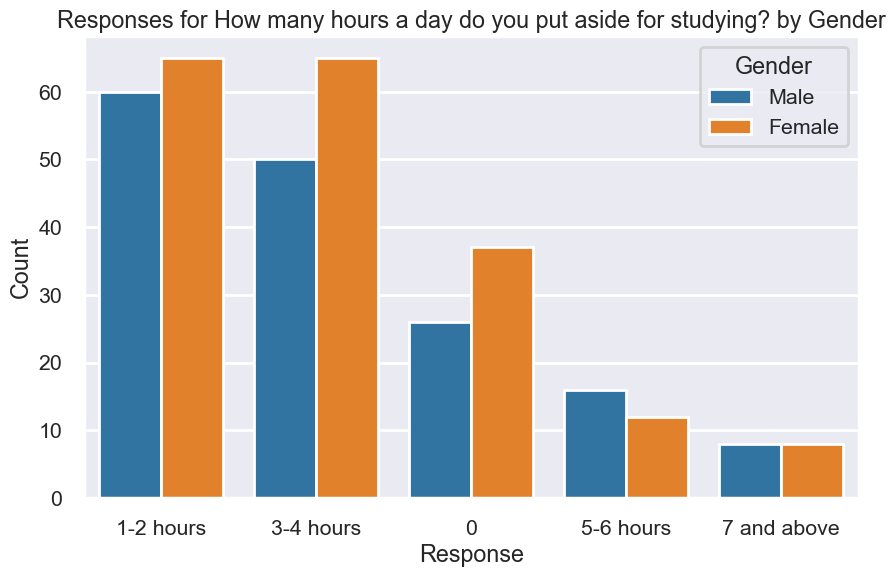

<Figure size 640x480 with 0 Axes>

In [25]:
# Exploring questions in relation to gender
for question in questions:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=question, hue='Gender', data=student_data, order=student_data[question].value_counts().index)
    plt.title(f'Responses for {question} by Gender')
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.legend(title='Gender')
    plt.show()
    # Sanitize the filename by removing invalid characters
    sanitized_question = re.sub(r'[^\w\s]', '', question)
    # Save the figure to a file
    plt.savefig(f"responses_for_{sanitized_question}_by_gender.png")
    # Clear the current figure to avoid saving an empty figure
    plt.clf()


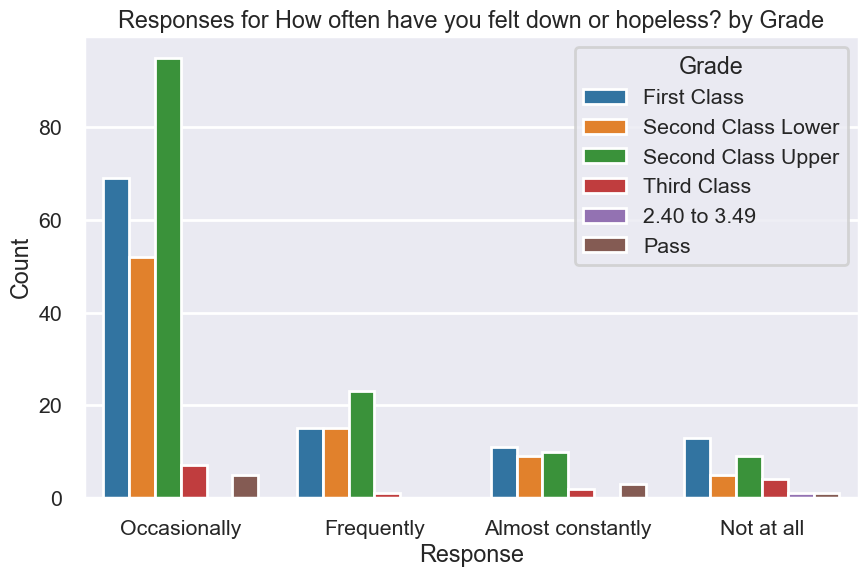

<Figure size 640x480 with 0 Axes>

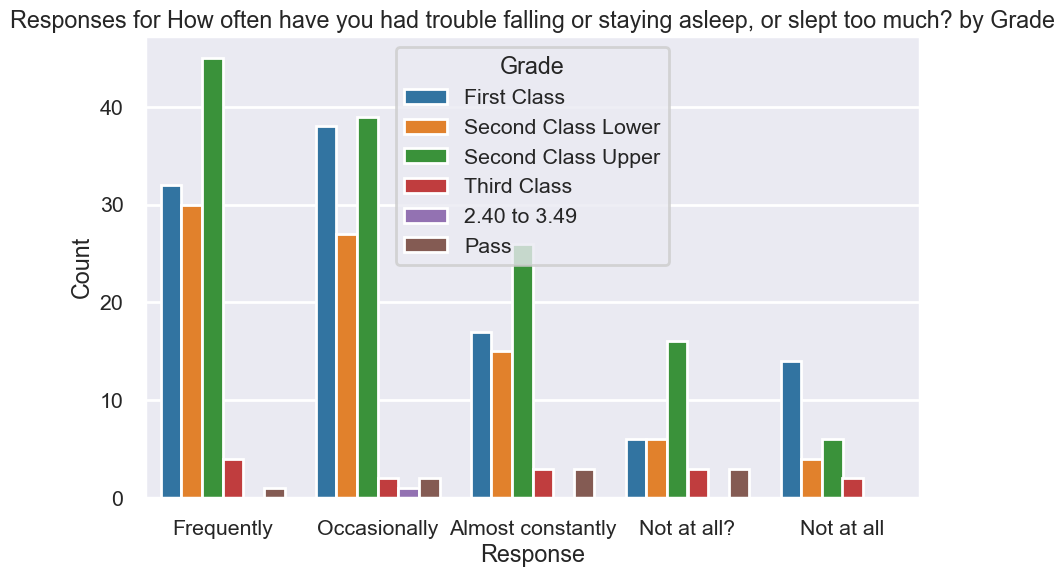

<Figure size 640x480 with 0 Axes>

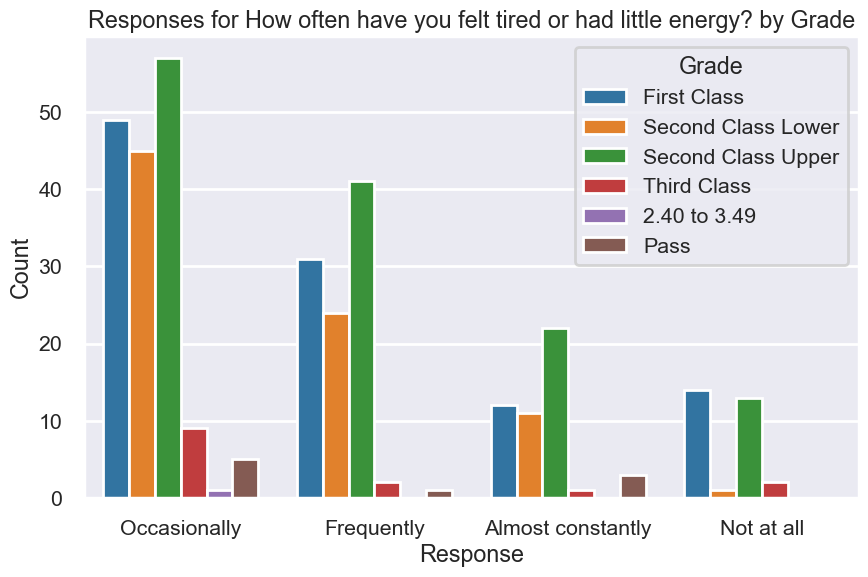

<Figure size 640x480 with 0 Axes>

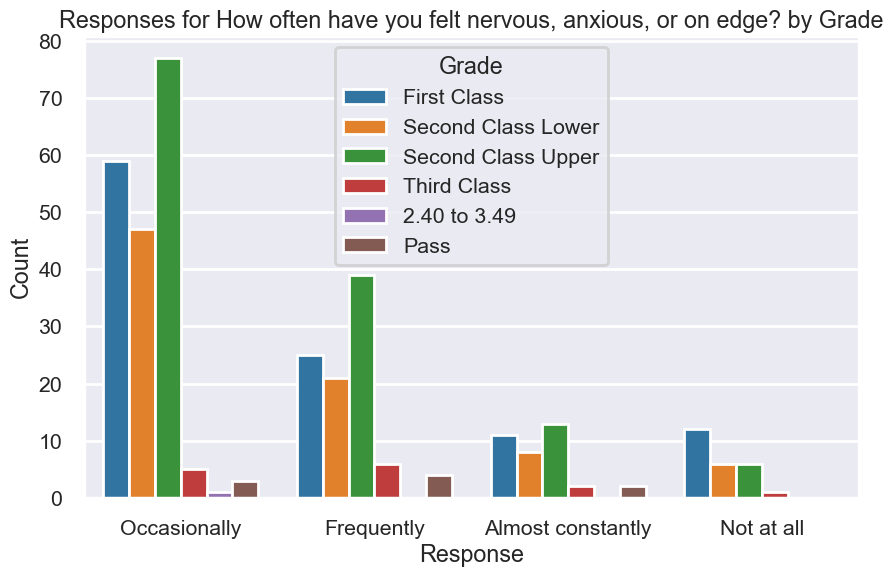

<Figure size 640x480 with 0 Axes>

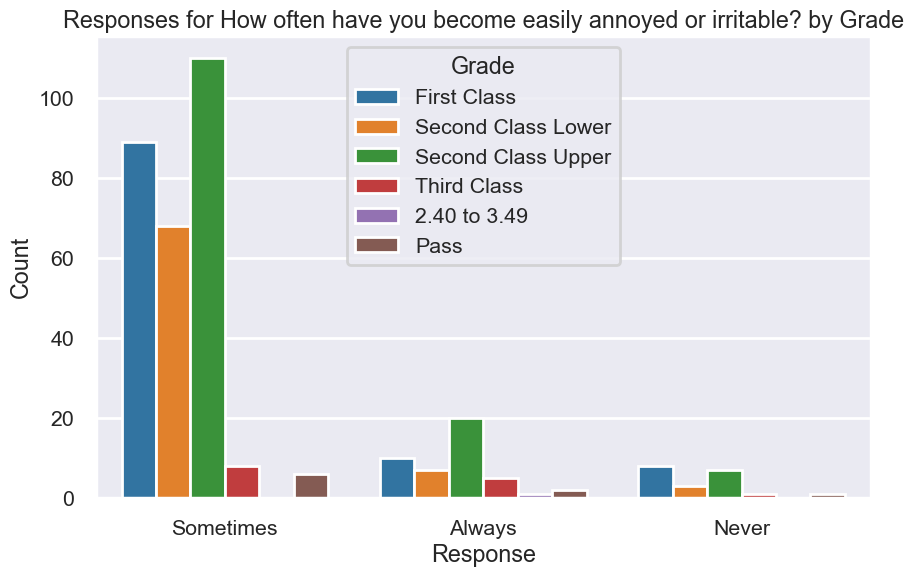

<Figure size 640x480 with 0 Axes>

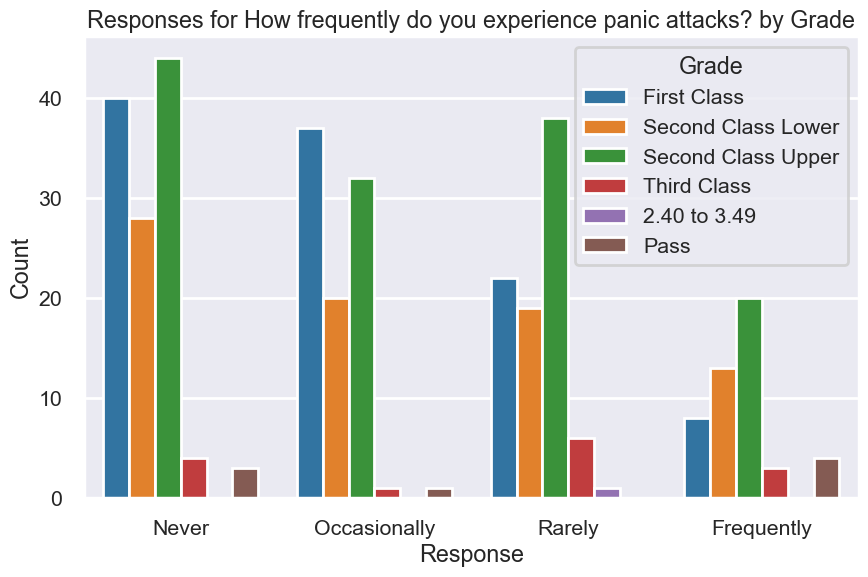

<Figure size 640x480 with 0 Axes>

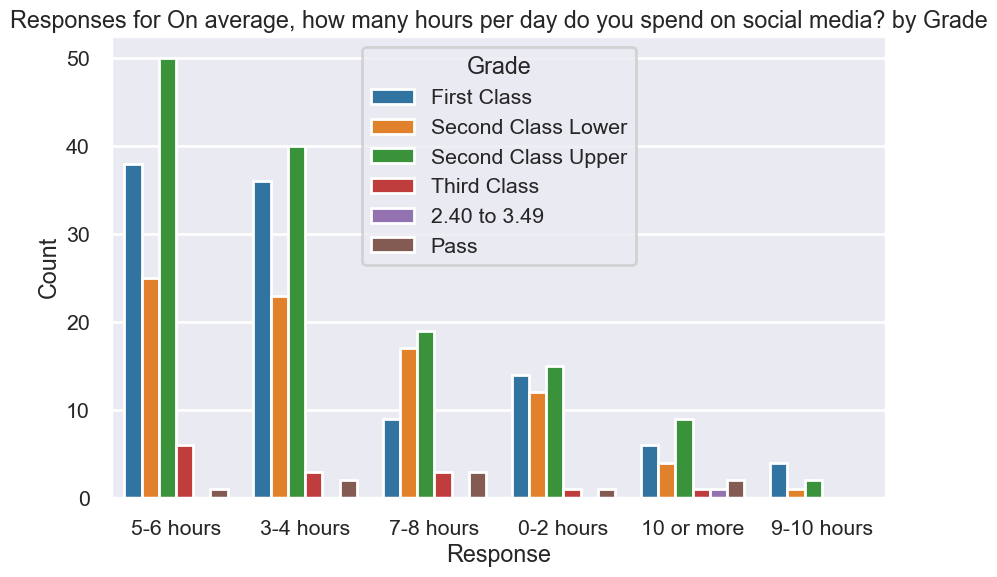

<Figure size 640x480 with 0 Axes>

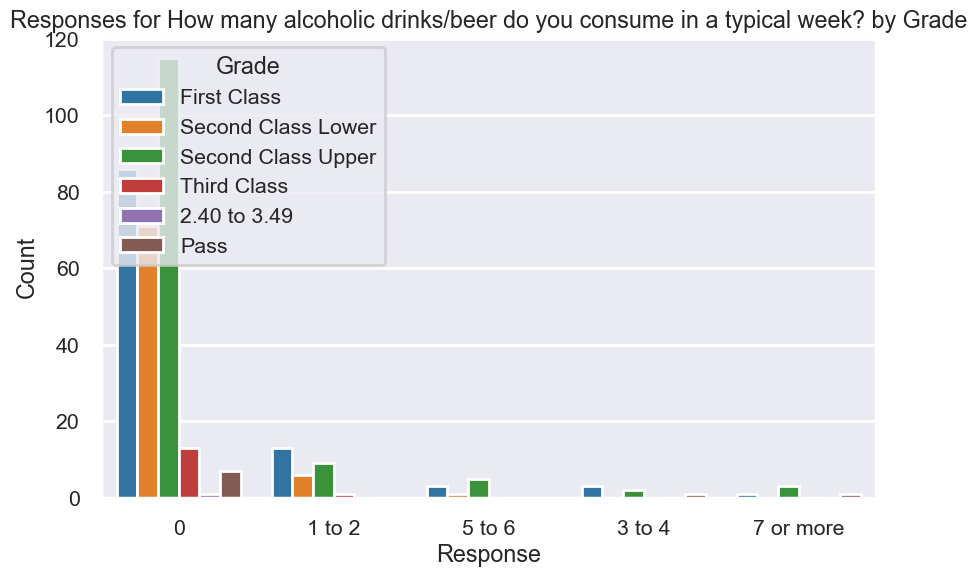

<Figure size 640x480 with 0 Axes>

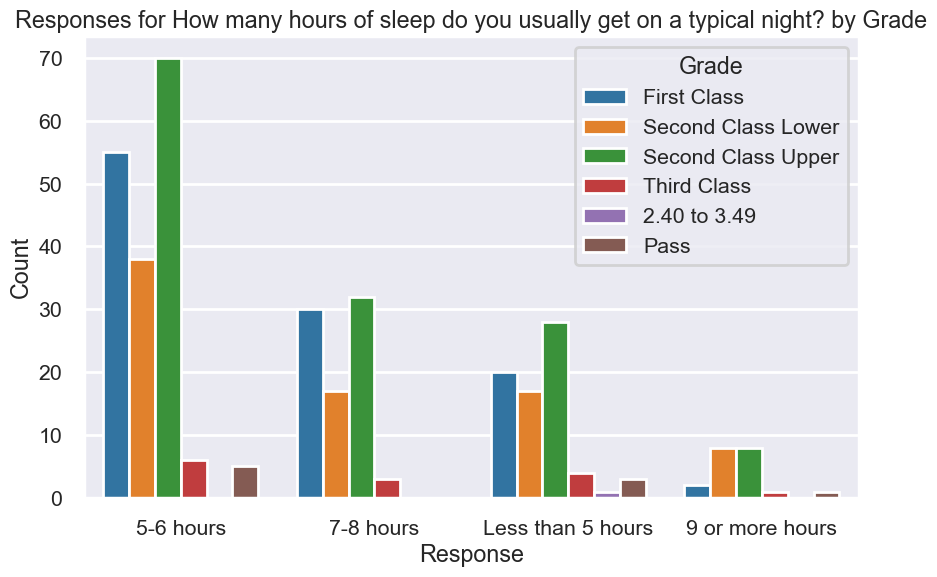

<Figure size 640x480 with 0 Axes>

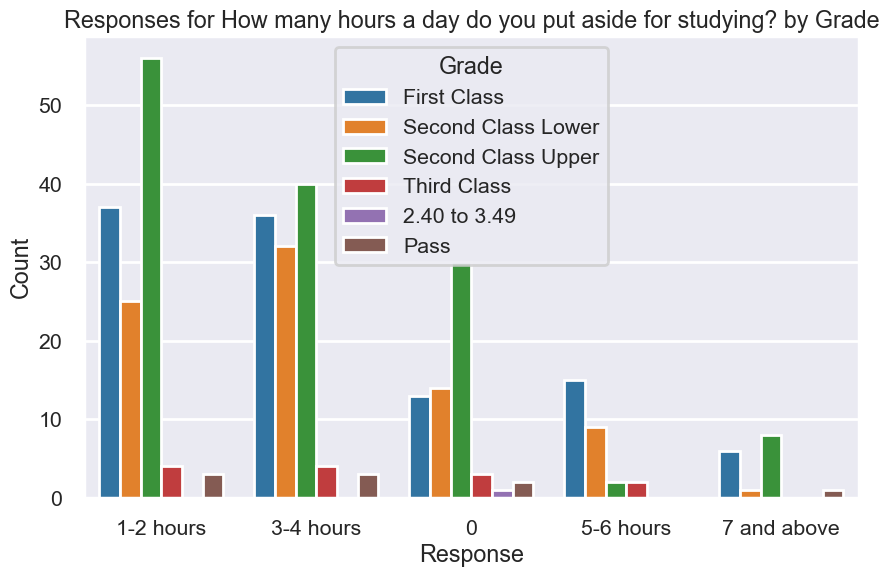

<Figure size 640x480 with 0 Axes>

In [26]:
for question in questions:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=question, hue='Grade', data=student_data, order=student_data[question].value_counts().index)
    plt.title(f'Responses for {question} by Grade')
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.legend(title='Grade')
    plt.show()
    # Sanitize the filename by removing invalid characters
    sanitized_question = re.sub(r'[^\w\s]', '', question)
    # Save the figure to a file
    plt.savefig(f"responses_for_{sanitized_question}_by_grade.png")
    # Clear the current figure to avoid saving an empty figure
    plt.clf()


# Trying To Detect Depression and/or Anxiety

In [27]:
def depression_anxiety_indicator(responses):
    """
    Function to determine if a person is likely suffering from depression and/or anxiety based on their responses.

    Args:
    responses (list): List of responses to the relevant questions.

    Returns:
    str: Binary indicator ('Yes' or 'No') indicating whether the person is likely suffering from depression and/or anxiety.
    """

    # Define the threshold responses indicating depression/anxiety
    depression_threshold = {'Frequently', 'Almost Constantly'}
    non_depression_threshold = {'Not at all', 'Occasionally'}

    # Check if any of the responses indicate depression/anxiety
    if any(response in depression_threshold for response in responses):
        return 'Yes'  # Likely suffering from depression and/or anxiety
    elif all(response in non_depression_threshold for response in responses):
        return 'No'  # Probably not suffering from depression and/or anxiety
    else:
        return 'No'  # Mixed responses, uncertain about depression/anxiety status



relevant_questions = [
    'How often have you felt down or hopeless?',
    'How often have you had trouble falling or staying asleep, or slept too much?',
    'How often have you felt tired or had little energy?',
    'How often have you felt nervous, anxious, or on edge?',
    'How often have you become easily annoyed or irritable?',
    'How frequently do you experience panic attacks?'
]

# Apply the function to each row of the DataFrame and create a new column for the indicator
student_data['Depression_Anxiety_Indicator'] = student_data[relevant_questions].apply(depression_anxiety_indicator, axis=1)

# Now you have a new column 'Depression_Anxiety_Indicator' in your DataFrame indicating whether each person is likely suffering from depression and/or anxiety

# You can then analyze this column as needed
print(student_data['Depression_Anxiety_Indicator'].value_counts())

Yes    247
No     105
Name: Depression_Anxiety_Indicator, dtype: int64


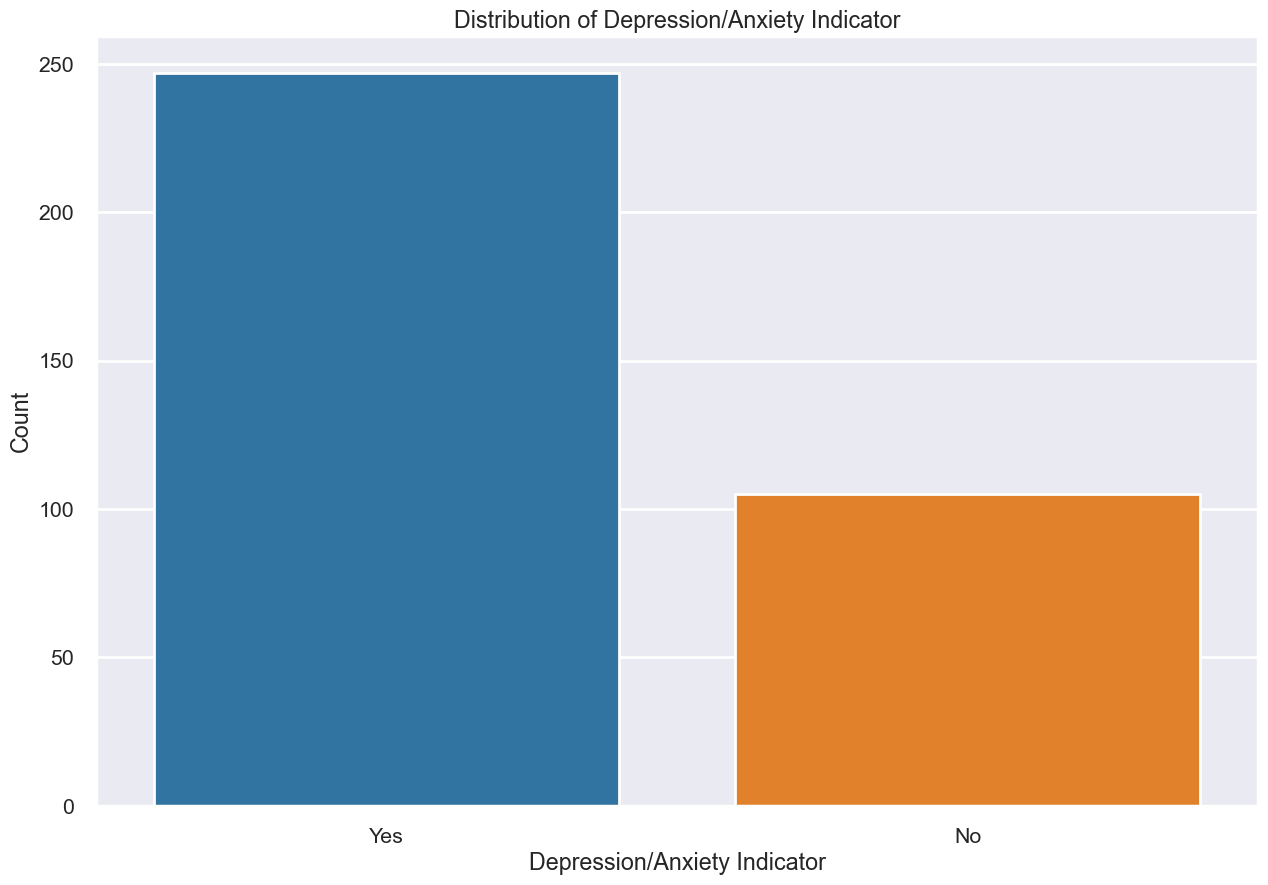

<Figure size 640x480 with 0 Axes>

In [28]:
# Count the number of people classified as potentially depressed and not depressed
depression_counts = student_data['Depression_Anxiety_Indicator'].value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x=depression_counts.index, y=depression_counts.values)
plt.title('Distribution of Depression/Anxiety Indicator')
plt.xlabel('Depression/Anxiety Indicator')
plt.ylabel('Count')
plt.show()
# Save the figure to a file
plt.savefig("distribution_of_depression_anxiety_indicator.png")


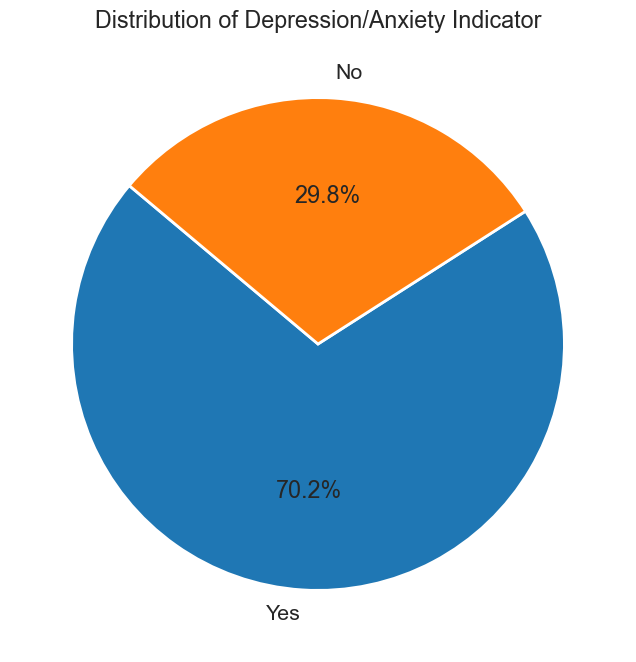

<Figure size 640x480 with 0 Axes>

In [29]:
depression_counts = student_data['Depression_Anxiety_Indicator'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(depression_counts, labels=depression_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Depression/Anxiety Indicator')
plt.show()
# Save the figure to a file
plt.savefig("distribution_of_depression_anxiety_indicator_pie.png")


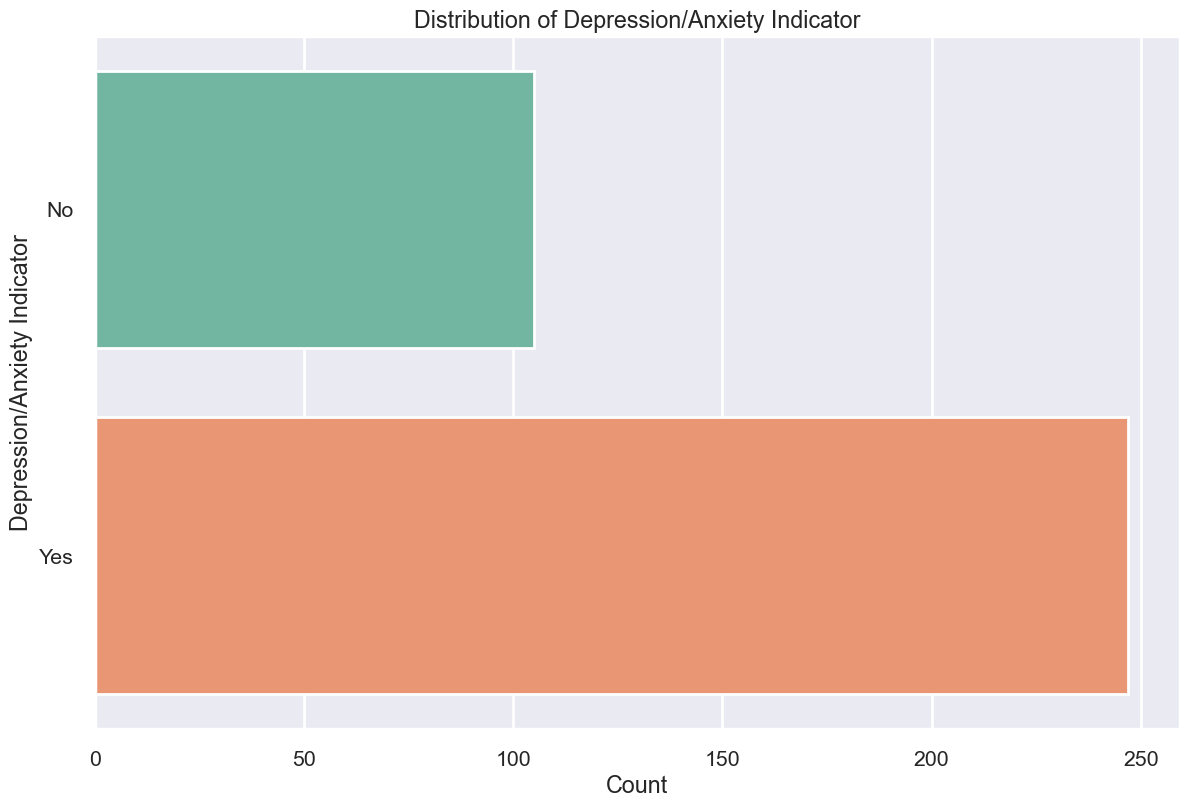

<Figure size 640x480 with 0 Axes>

In [30]:
depression_counts = student_data['Depression_Anxiety_Indicator'].value_counts()

plt.figure(figsize=(14, 9))
sns.countplot(y='Depression_Anxiety_Indicator', data=student_data, palette='Set2')
plt.title('Distribution of Depression/Anxiety Indicator')
plt.xlabel('Count')
plt.ylabel('Depression/Anxiety Indicator')
plt.show()
# Save the figure to a file
plt.savefig("distribution_of_depression_anxiety_indicator_countplot.png")


In [31]:
# Define the relevant questions
relevant_questions = [
    'How often have you felt down or hopeless?',
    'How often have you had trouble falling or staying asleep, or slept too much?',
    'How often have you felt tired or had little energy?',
    'How often have you felt nervous, anxious, or on edge?',
    'How often have you become easily annoyed or irritable?',
    'How frequently do you experience panic attacks?'
]

# Create a new column 'Depression_Anxiety_Indicator' based on the function depression_anxiety_indicator
student_data['Depression_Anxiety_Indicator'] = student_data[relevant_questions].apply(depression_anxiety_indicator, axis=1)

In [32]:
student_data.head()

Age  Gender                       Course           Year Marital Status  \
0   54    Male      Construction Management  Post Graduate        Married   
1   18    Male             Computer Science    Second Year         Single   
2   25  Female       Agriculture Economics   Post Graduate         Single   
3   19  Female  Genetics and Biotechnology     Second Year         Single   
4   25    Male             Computer Science    Fourth Year         Single   

                Grade How often have you felt down or hopeless?  \
0         First Class                              Occasionally   
1         First Class                                Not at all   
2  Second Class Lower                              Occasionally   
3         First Class                         Almost constantly   
4  Second Class Upper                                Frequently   

  How often have you had trouble falling or staying asleep, or slept too much?  \
0                                       Occasionally                             
1                                       Occasionally                             
2                                       Occasionally                             
3                                         Frequently                             
4                                         Frequently                             

  How often have you felt tired or had little energy?  \
0                                       Occasionally    
1                                       Occasionally    
2                                       Occasionally    
3                                       Occasionally    
4                                       Occasionally    

  How often have you felt nervous, anxious, or on edge?  \
0                                       Occasionally      
1                                         Frequently      
2                                       Occasionally      
3                                       Occasionally      
4                                         Frequently      

  How often have you become easily annoyed or irritable?  \
0                                          Sometimes       
1                                          Sometimes       
2                                          Sometimes       
3                                          Sometimes       
4                                          Sometimes       

  How frequently do you experience panic attacks?  \
0                                    Occasionally   
1                                    Occasionally   
2                                           Never   
3                                    Occasionally   
4                                      Frequently   

  On average, how many hours per day do you spend on social media?  \
0                                          7-8 hours                 
1                                          3-4 hours                 
2                                          5-6 hours                 
3                                          5-6 hours                 
4                                          5-6 hours                 

  How many alcoholic drinks/beer do you consume in a typical week?  \
0                                             5 to 6                 
1                                             1 to 2                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

  How many hours of sleep do you usually get on a typical night?  \
0                                          5-6 hours               
1                                          5-6 hours               
2                                          5-6 hours               
3                                          7-8 hours               
4                                  Less than 5 hours               

  How many hour

In [33]:
# Mapping dictionary for grades
grade_mapping = {
    'First Class': 1.0,
    'Second Class Upper': 2.1,
    'Second Class Lower': 2.2,
    'Third Class': 3.0,
    'Pass': 4.0
}

# Apply the mapping to the 'Grade' column
student_data['Grade'] = student_data['Grade'].map(grade_mapping)


In [34]:
student_data.head()

Age  Gender                       Course           Year Marital Status  \
0   54    Male      Construction Management  Post Graduate        Married   
1   18    Male             Computer Science    Second Year         Single   
2   25  Female       Agriculture Economics   Post Graduate         Single   
3   19  Female  Genetics and Biotechnology     Second Year         Single   
4   25    Male             Computer Science    Fourth Year         Single   

   Grade How often have you felt down or hopeless?  \
0    1.0                              Occasionally   
1    1.0                                Not at all   
2    2.2                              Occasionally   
3    1.0                         Almost constantly   
4    2.1                                Frequently   

  How often have you had trouble falling or staying asleep, or slept too much?  \
0                                       Occasionally                             
1                                       Occasionally                             
2                                       Occasionally                             
3                                         Frequently                             
4                                         Frequently                             

  How often have you felt tired or had little energy?  \
0                                       Occasionally    
1                                       Occasionally    
2                                       Occasionally    
3                                       Occasionally    
4                                       Occasionally    

  How often have you felt nervous, anxious, or on edge?  \
0                                       Occasionally      
1                                         Frequently      
2                                       Occasionally      
3                                       Occasionally      
4                                         Frequently      

  How often have you become easily annoyed or irritable?  \
0                                          Sometimes       
1                                          Sometimes       
2                                          Sometimes       
3                                          Sometimes       
4                                          Sometimes       

  How frequently do you experience panic attacks?  \
0                                    Occasionally   
1                                    Occasionally   
2                                           Never   
3                                    Occasionally   
4                                      Frequently   

  On average, how many hours per day do you spend on social media?  \
0                                          7-8 hours                 
1                                          3-4 hours                 
2                                          5-6 hours                 
3                                          5-6 hours                 
4                                          5-6 hours                 

  How many alcoholic drinks/beer do you consume in a typical week?  \
0                                             5 to 6                 
1                                             1 to 2                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

  How many hours of sleep do you usually get on a typical night?  \
0                                          5-6 hours               
1                                          5-6 hours               
2                                          5-6 hours               
3                                          7-8 hours               
4                                  Less than 5 hours               

  How many hours a day do you put aside for studying?  \
0                                   

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop rows with missing target values
student_data.dropna(subset=['Grade'], inplace=True)

# Separate features and target variable
X = student_data.drop(['Grade'], axis=1)
y = student_data['Grade']


# Define categorical and numerical features
categorical_features = ['Gender', 'Course', 'Year', 'Marital Status',
                        'How often have you felt down or hopeless?',
                        'How often have you had trouble falling or staying asleep, or slept too much?',
                        'How often have you felt tired or had little energy?',
                        'How often have you felt nervous, anxious, or on edge?',
                        'How often have you become easily annoyed or irritable?',
                        'How frequently do you experience panic attacks?',
                        'On average, how many hours per day do you spend on social media?',
                        'How many alcoholic drinks/beer do you consume in a typical week?',
                        'How many hours of sleep do you usually get on a typical night?',
                        'How many hours a day do you put aside for studying?']

numerical_features = ['Age']

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('num', 'passthrough')  # Passthrough numerical features without transformation
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append the model to the preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.39322809859154945


In [36]:
# Calculate the range of grades
grade_range = y.max() - y.min()

# Calculate the relative MSE (MSE normalized by the range of grades)
relative_mse = mse / grade_range

print("Relative Mean Squared Error:", relative_mse)

Relative Mean Squared Error: 0.1310760328638498


Mean Squared Error (MSE): MSE is a measure of how close the predicted values are to the actual values. It calculates the average squared difference between the predicted and actual values. Mathematically, it's the average of the squares of the differences between predicted and actual values.

Relative Mean Squared Error (Relative MSE): Relative MSE is the MSE normalized by the range of the target variable (grades, in this case). This normalization helps in understanding the MSE in the context of the variability of the target variable. It's calculated by dividing the MSE by the range of the grades.



Relative MSE of 0.1310760328638498: This means that, on average, the squared difference between the predicted grades and the actual grades is approximately 0.13 times the range of the grades.

Interpretation:

A relative MSE close to 0 indicates that the model's predictions are very close to the actual grades, relative to the variability in the grades.
Conversely, a relative MSE close to 1 would indicate that the model's predictions are as different from the actual grades as the range of the grades themselves.
Is it a good thing?:

Yes, a relative MSE of 0.13 is generally considered good. It means that, on average, the model's predictions are close to the actual grades, relative to the range of grades.
However, whether it's "good enough" depends on the specific requirements of your problem and the context in which the model will be used. It's always a good idea to compare the relative MSE with other evaluation metrics and consider the practical implications of model performance.

In [37]:
# Define input features for a new student
new_student_data = {
    'Age': 21,
    'Gender': 'Male',
    'Course': 'Computer Science',
    'Year': 'Fourth Year',
    'Marital Status': 'Single',
    'How often have you felt down or hopeless?': 'Frequently',
    'How often have you had trouble falling or staying asleep, or slept too much?': 'Not at all',
    'How often have you felt tired or had little energy?': 'Occasionally',
    'How often have you felt nervous, anxious, or on edge?': 'Frequently',
    'How often have you become easily annoyed or irritable?': 'Frequently',
    'How frequently do you experience panic attacks?': 'Occasionally',
    'On average, how many hours per day do you spend on social media?': '5-6 hours',
    'How many alcoholic drinks/beer do you consume in a typical week?': '0',
    'How many hours of sleep do you usually get on a typical night?': '5-6 hours',
    'How many hours a day do you put aside for studying?': '1-2 hours'
}

# Convert the input data into a DataFrame
new_student_df = pd.DataFrame([new_student_data])

# Predict the grade for the new student
predicted_grade = model.predict(new_student_df)

print("Predicted Grade:", predicted_grade)
# keep in mind
#Numbers closer to 1.0 = First Class
#Numbers closer to 2.1 = Second Class Upper
#Numbers closer to 2.2 = Second Class Lower
#Numbers closer to 3.0 = Third Class
#Numbers closer to 4.0 = Pass


Predicted Grade: [1.847]


In [38]:
import pickle

In [39]:
pickle.dump(student_data,open('student_data.pkl','wb'))